# <font color="#38db02">Author</font>

Affiliated: <font color="#38db02">LUX Space Science & Technology

## Account Information

- LinkedIn:

[LinkedIn - Author](https://www.linkedin.com/in/brs-dincer/)

[LinkedIn - LUX](https://www.linkedin.com/company/luxspacescience)

- Kaggle:

[Kaggle - Author](https://www.kaggle.com/brsdincer)

## What is LUX Space Science & Technology
LUX Space Science - LSS is a structure that thinks to unite scientists from all over the world, conducts studies in the field of space science and space technologies and provides education to people related to these fields.

Our goal is to enable scientists to form teams that can carry out their research, to guide those who want to be involved in this field, and to provide data for science studies.

> Channels:

- [Discord Server](https://discord.gg/8PDEv7vm92)
- Twitter: @luxspacescience
- Mastodon: https://mstdn.social/@lss
- Instagram: @luxspacescience

# Data Informations


- Year: year
- Day_of_yea: day of year number (1-366)
- Hour: hour (UT)
- Minute: minute (UT)
- Second: seconds (UT)
- Radial_Distance: radial distance (RE)
- MLAT: magnetic latitude (deg)
- MLT: magnetic local time (hours)
- L_DIP: L-shell calculated from R and MLAT assuming a dipole magnetic field
- AM: equals 1 (2) if fpe is derived from the automatic (manual) fit
- PC: equals 1 (2) if fpe is derived from an Upper Hybrid frequency peak
- FPE: electron plasma frequency (kHz) from fits, from which the electron density ne can be determined
- fCE_MOD: electron cyclotron frequency (kHz) from the T96_01 magnetic field MODEL
- N1_2: number of n+1/2 harmonics recognized by automatic routine
- FCE_N1_2: electron cyclotron frequency (kHz) from the spacing of n+1/2 harmonics, from which the magnetic field B can be determined
- Standard_Deviation: standard deviation (kHz) of fce_n+1/2 based on individual frequencies


### NOTE
You can download the data from here for scientific research:
https://www.kaggle.com/datasets/brsdincer/image-rpi-passive-plasma-data-emissions

If you want to analyze the project file yourself, you need to first upload it to Drive and then write the correct file path in the necessary location within the project.

# General Classes

In [1]:
class CLASSINIT:
  pass
class PROCESS:
  pass
class RESULT:
  pass
class URL:
  pass
class DOCUMENTATION:
  pass
class NULL:
  pass
class ERROR:
  pass
class DATA:
  pass

# General Libraries

In [2]:
import os,pandas as pd,numpy as np,matplotlib as mtb,matplotlib.pyplot as plt,seaborn as sns
import matplotlib.cm as cm
import matplotlib.animation as anim
from IPython.display import HTML

In [3]:
import plotly.express as px,plotly.graph_objs as go
from plotly.subplots import make_subplots

In [4]:
from scipy.stats import binned_statistic_2d

In [5]:
from warnings import filterwarnings
filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore",category=FutureWarning)
filterwarnings("ignore",category=DeprecationWarning)

# Configurations

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.style.use("dark_background")
mtb.rcParams["figure.figsize"] = (10,8)
mtb.rcParams["figure.labelsize"] = "medium"
mtb.rcParams["font.size"] = 8.0
mtb.rcParams["lines.linewidth"] = 2

# General Constants

In [7]:
typemessage = "[PICKLED DENIED] - PROJECT BASED"

# General Operations

In [8]:
createDirectory = lambda x: os.mkdir(x) if not os.path.exists(x) else None

In [9]:
sortedList = lambda x: int(x.rsplit("_",1)[-1].split(".")[0])

In [10]:
class ErrorModule(object):
  def __init__(self,errortype:ERROR,errormessage:str)->CLASSINIT:
    self.error = errortype
    self.message = errormessage
  def __str__(self)->str:
    return "Error Module Class - Script Initial Process"
  def __call__(self)->CLASSINIT:
    return self.error(self.message)
  def __getstate__(self)->NULL:
    raise TypeError(typemessage)
  def __repr__(self)->DOCUMENTATION:
    return ErrorModule.__doc__
  def Raise(self)->PROCESS:
    raise self.error(self.message)
  def Return(self)->PROCESS:
    return self.error(self.message)
  def Null(self)->PROCESS:
    return None

# Mounting

In [11]:
createDirectory("drivefiles")

In [12]:
%%capture
from google.colab import drive
drive.mount("/content/drivefiles")

# Data Reading

In [13]:
datapath = "/content/drivefiles/MyDrive/IMAGE Satellite/IMAGE RPI electron density from passive plasma emissions - Sheet1.csv"

In [14]:
class DataReading(object):
  def __init__(self)->CLASSINIT:
    self.dir = datapath
  def __str__(self)->str:
    return "Data Reading From Source - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return DataReading.__doc__
  def ReadInitial(self)->DATA:
    return pd.read_csv(self.dir)
  def GetColumns(self)->PROCESS:
    return list(self.ReadInitial().columns)
  def GetConditionCheck(self,outdata:DATA,prm:str,isMax:bool=True)->PROCESS:
    dt_ = outdata
    if isMax:
      return dt_[dt_[prm] == dt_[prm].max()]
    else:
      return dt_[dt_[prm] == dt_[prm].min()]
  def GetValueCounting(self,prm:str)->PROCESS:
    return self.ReadInitial()[prm].value_counts()
  def GetGeneralInfo(self,outdata:DATA)->PROCESS:
    return outdata.info()
  def GetDescribe(self,outdata:DATA)->PROCESS:
    return outdata.describe().T
  def GetValueLimits(self,outdata:DATA,prm:str,process:str)->PROCESS:
    dt_ = outdata
    if process.upper() == "MEAN":
      return dt_[prm].mean()
    elif process.upper() == "MAX":
      return dt_[prm].max()
    elif process.upper() == "MIN":
      return dt_[prm].min()
    else:
      return None

In [15]:
dtframe = DataReading().ReadInitial()

In [16]:
dtframe.head(5)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT    MLT  \
0  2001            1    10      31      34            6.236  35.12  18.30   
1  2001            1    10      34      36            6.190  34.62  18.31   
2  2001            1    10      38      34            6.120  33.95  18.32   
3  2001            1    10      41      36            6.067  33.44  18.33   
4  2001            1    10      45      34            5.989  32.75  18.34   

   LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  
0  9.32   1   2  10.20     5.49     0      0.00                0.00  
1  9.14   1   2  13.75     5.58     1      5.58                0.16  
2  8.89   1   1  20.46     5.71     2      5.63                0.17  
3  8.71   1   1  21.25     5.82     2      5.65                0.20  
4  8.47   1   1  35.09     5.95     3      6.09                0.23

# Correlations Types & Results

## Pearson

In [17]:
class PearsonScore(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe.drop(["Year","Day_of_year","Hour","Minute","Second"],axis=1)
    self.dt = self.dt.reset_index(drop=True)
  def __str__(self)->PROCESS:
    return "Pearson Score Calculation - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return PearsonScore.__doc__
  def Calculate(self,input_prm_one:str,input_prm_two:str)->RESULT:
    _x = self.dt[str(input_prm_one)].values
    _y = self.dt[str(input_prm_two)].values
    _n = len(_x)
    _xsum = np.sum(_x)
    _ysum = np.sum(_y)
    _xsquare = np.sum(np.square([i_ for i_ in _x]))
    _ysquare = np.sum(np.square([i_ for i_ in _y]))
    _crosssum = np.sum([i_*j_ for i_,j_ in zip(_x,_y)])
    _numerator = _crosssum - (_xsum*_ysum/_n)
    _denominator = np.sqrt([((_xsquare-(_xsum**2)/_n)*(_ysquare-(_ysum**2)/_n))])
    if _denominator == 0:
      return 0
    else:
      return _numerator/_denominator
  def ShowScore(self)->PROCESS:
    assert len(self.dt.columns) > 0
    lencolumns = len(self.dt.columns)
    results = {}
    t_ = 0
    while t_ < lencolumns:
      try:
        for i_ in range(lencolumns):
          try:
            x1 = self.dt.columns[t_]
            y1 = self.dt.columns[i_]
            if x1 != y1:
              pearson = self.Calculate(x1,y1)
              if (str(x1),str(y1)) not in results:
                results[(str(x1),str(y1))] = pearson
          except Exception as err:
            print(str(err))
            pass
        t_ += 1
      except:
        pass
    return results

In [18]:
pearson_score = PearsonScore(dtframe).ShowScore()

In [19]:
for _name,_value in pearson_score.items():
  print(f"{_name[0]} | {_name[1]}:[ {_value[0]} ]")

Radial_Distance | MLAT:[ -0.09597880540178237 ]
Radial_Distance | MLT:[ 0.1623567231471997 ]
Radial_Distance | LDIP:[ 0.1699776724203516 ]
Radial_Distance | AM:[ -0.038893783151911325 ]
Radial_Distance | PC:[ 0.3202217621248453 ]
Radial_Distance | FPE:[ -0.75901296144839 ]
Radial_Distance | FCE_MOD:[ -0.6060827324588056 ]
Radial_Distance | N1_2:[ 0.31197895955907884 ]
Radial_Distance | FCE_N1_2:[ 0.0891175262086099 ]
Radial_Distance | Standard_Deviation:[ 0.050605185567268236 ]
MLAT | Radial_Distance:[ -0.09597880540178237 ]
MLAT | MLT:[ -0.019338252840481893 ]
MLAT | LDIP:[ -0.02712792791152286 ]
MLAT | AM:[ 0.01914830984651776 ]
MLAT | PC:[ -0.06255269157673542 ]
MLAT | FPE:[ 0.008404072216537039 ]
MLAT | FCE_MOD:[ -8.776222348810409e-05 ]
MLAT | N1_2:[ -0.01771354567073366 ]
MLAT | FCE_N1_2:[ 0.05624112250161109 ]
MLAT | Standard_Deviation:[ 0.03692145078702889 ]
MLT | Radial_Distance:[ 0.1623567231471997 ]
MLT | MLAT:[ -0.019338252840481893 ]
MLT | LDIP:[ 0.03161216937221418 ]
MLT 

## Spearman

In [20]:
class SpearmanScore(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe.drop(["Year","Day_of_year","Hour","Minute","Second"],axis=1)
    self.dt = self.dt.reset_index(drop=True)
  def __str__(self)->str:
    return "Spearman Score Calculation - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return SpearmanScore.__doc__
  def Calculate(self,input_prm_one:str,input_prm_two:str)->RESULT:
    _x = self.dt[str(input_prm_one)].values
    _y = self.dt[str(input_prm_two)].values
    _n = len(_x)
    _xrank = np.argsort(_x)
    _yrank = np.argsort(_y)
    _diff = _xrank-_yrank
    _diffsquare = _diff**2
    _sumdiffsquare = np.sum(_diffsquare)
    spearman = 1 - (6*_sumdiffsquare)/(_n*((_n**2)-1))
    return spearman
  def ShowScore(self)->PROCESS:
    assert len(self.dt.columns) > 0
    lencolumns = len(self.dt.columns)
    results = {}
    t_ = 0
    while t_ < lencolumns:
      try:
        for i_ in range(lencolumns):
          try:
            x1 = self.dt.columns[t_]
            y1 = self.dt.columns[i_]
            if x1 != y1:
              spearman = self.Calculate(x1,y1)
              if (str(x1),str(y1)) not in results:
                results[(str(x1),str(y1))] = spearman
          except Exception as err:
            print(str(err))
            pass
        t_ += 1
      except:
        pass
    return results

In [21]:
spearman_score = SpearmanScore(dtframe).ShowScore()

In [22]:
spearman_score

{('Radial_Distance', 'MLAT'): -0.031674248544014016,
 ('Radial_Distance', 'MLT'): -0.008085644612160214,
 ('Radial_Distance', 'LDIP'): 0.0076237635203627585,
 ('Radial_Distance', 'AM'): -0.00346018102827772,
 ('Radial_Distance', 'PC'): -0.01010133465268881,
 ('Radial_Distance', 'FPE'): -0.0037725249697826424,
 ('Radial_Distance', 'FCE_MOD'): -0.011083018267910028,
 ('Radial_Distance', 'N1_2'): -0.006325844649697654,
 ('Radial_Distance', 'FCE_N1_2'): -0.0024226169432497446,
 ('Radial_Distance', 'Standard_Deviation'): -0.004626707992343881,
 ('MLAT', 'Radial_Distance'): -0.031674248544014016,
 ('MLAT', 'MLT'): 0.015317379182366975,
 ('MLAT', 'LDIP'): -0.029995589679058465,
 ('MLAT', 'AM'): 0.1035342013424283,
 ('MLAT', 'PC'): 0.08061881468528309,
 ('MLAT', 'FPE'): 0.03585382899480449,
 ('MLAT', 'FCE_MOD'): 0.03560458363032326,
 ('MLAT', 'N1_2'): 0.033023433941216096,
 ('MLAT', 'FCE_N1_2'): 0.019765959395562582,
 ('MLAT', 'Standard_Deviation'): 0.03090960063617687,
 ('MLT', 'Radial_Distan

In [23]:
for _name,_value in spearman_score.items():
  print(f"{_name[0]} | {_name[1]}:[ {_value} ]")

Radial_Distance | MLAT:[ -0.031674248544014016 ]
Radial_Distance | MLT:[ -0.008085644612160214 ]
Radial_Distance | LDIP:[ 0.0076237635203627585 ]
Radial_Distance | AM:[ -0.00346018102827772 ]
Radial_Distance | PC:[ -0.01010133465268881 ]
Radial_Distance | FPE:[ -0.0037725249697826424 ]
Radial_Distance | FCE_MOD:[ -0.011083018267910028 ]
Radial_Distance | N1_2:[ -0.006325844649697654 ]
Radial_Distance | FCE_N1_2:[ -0.0024226169432497446 ]
Radial_Distance | Standard_Deviation:[ -0.004626707992343881 ]
MLAT | Radial_Distance:[ -0.031674248544014016 ]
MLAT | MLT:[ 0.015317379182366975 ]
MLAT | LDIP:[ -0.029995589679058465 ]
MLAT | AM:[ 0.1035342013424283 ]
MLAT | PC:[ 0.08061881468528309 ]
MLAT | FPE:[ 0.03585382899480449 ]
MLAT | FCE_MOD:[ 0.03560458363032326 ]
MLAT | N1_2:[ 0.033023433941216096 ]
MLAT | FCE_N1_2:[ 0.019765959395562582 ]
MLAT | Standard_Deviation:[ 0.03090960063617687 ]
MLT | Radial_Distance:[ -0.008085644612160214 ]
MLT | MLAT:[ 0.015317379182366975 ]
MLT | LDIP:[ -0.004

# Relations Visualization

In [24]:
class RelationVisualization(object):
  def __init__(self,dataframe:DATA,reltype:str)->CLASSINIT:
    self.dt = dataframe.drop(["Year","Day_of_year","Hour","Minute","Second"],axis=1)
    self.dt = self.dt.reset_index(drop=True)
    self.rtype = reltype
    self.cmapinitial = "OrRd"
    if self.rtype.upper() == "PEARSON":
      self.title = "Pearson Correlation"
    elif self.rtype.upper() == "SPEARMAN":
      self.title = "Spearman Correlation"
    elif self.rtype.upper() == "COVARIANCE":
      self.title = "Covariance Score"
    elif self.rtype.upper() == "MULTIDISPLAY":
      self.title = "Multi-Comparing Corr (Pearson - Spearman)"
    else:
      self.title = "Not Defined"
  def __str__(self)->str:
    return "Correlation Visualization - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def ShowGraph(self)->PROCESS:
    plt.title(self.title)
    plt.xlabel("X-coor")
    plt.ylabel("Y-coor")
    if self.rtype.upper() == "PEARSON":
      sns.heatmap(self.dt.corr(method="pearson"),annot=True,cmap=self.cmapinitial)
    elif self.rtype.upper() == "SPEARMAN":
      sns.heatmap(self.dt.corr(method="spearman"),annot=True,cmap=self.cmapinitial)
    elif self.rtype.upper() == "COVARIANCE":
      sns.heatmap(self.dt.cov(),annot=True,cmap=self.cmapinitial)
    else:
      pass
    plt.tight_layout()
    plt.show()
  def MultiDisplayCorr(self)->PROCESS:
    assert self.rtype.upper() == "MULTIDISPLAY"
    f_,(ax1,ax2) = plt.subplots(ncols=2)
    f_.suptitle(self.title)
    f_.subplots_adjust(wspace=0.001)
    sns.heatmap(self.dt.corr(method="pearson"),
                ax=ax1,
                annot=True,
                vmin=-1,
                vmax=+1,
                cmap=self.cmapinitial)
    sns.heatmap(self.dt.corr(method="spearman"),
                ax=ax2,
                annot=True,
                vmin=-1,
                vmax=+1,
                cmap=self.cmapinitial)
    plt.tight_layout()
    plt.show()

## Pearson

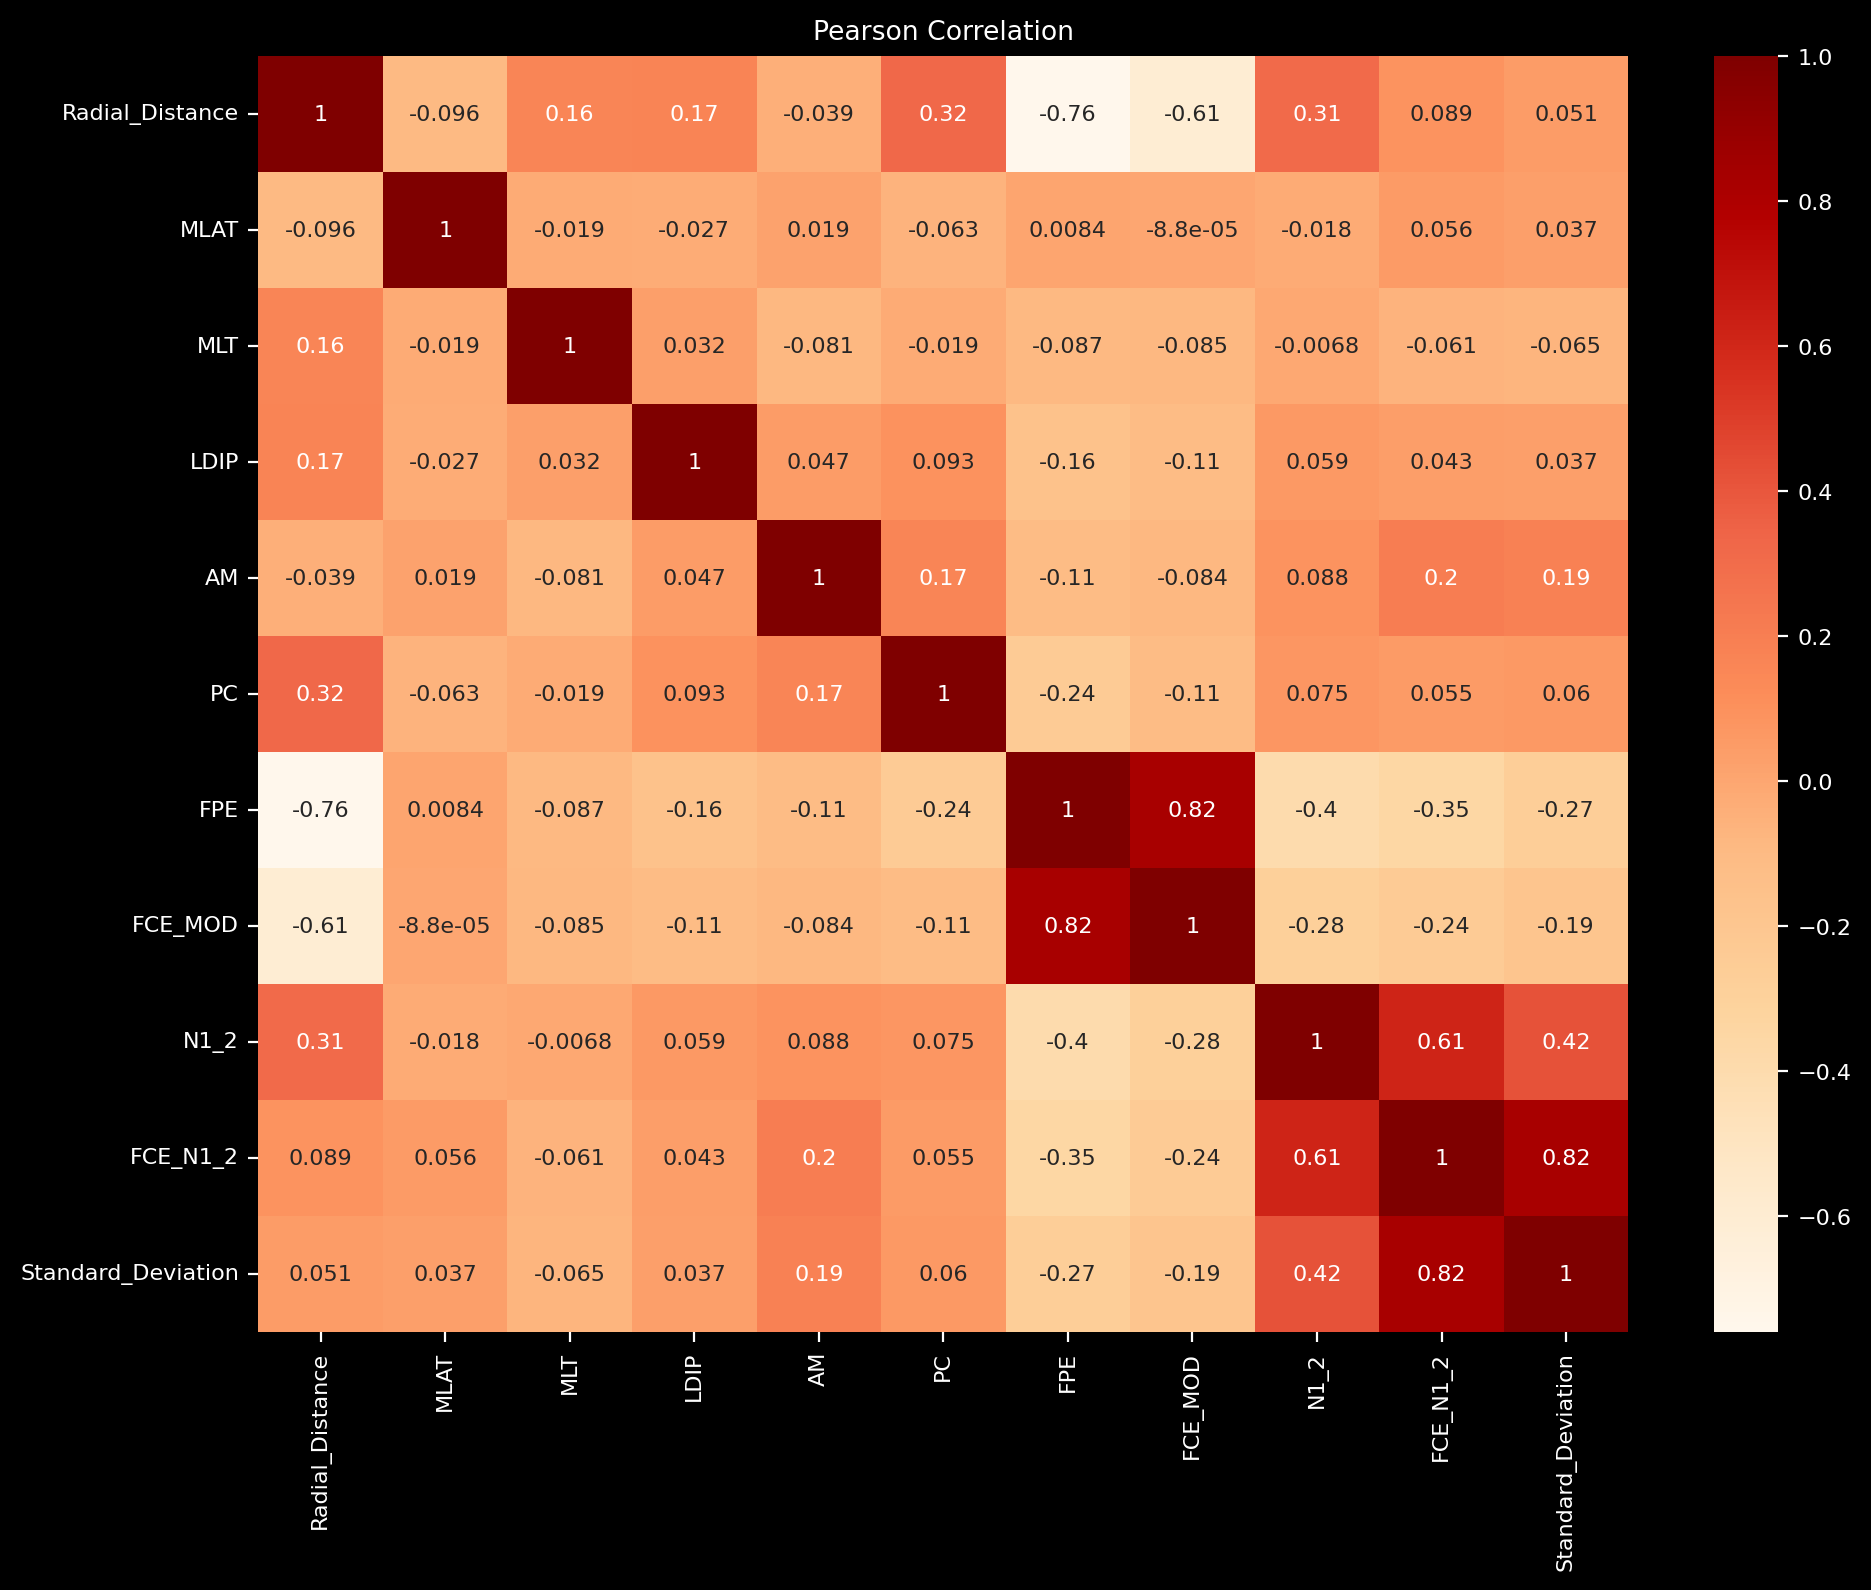

In [25]:
RelationVisualization(dataframe=dtframe,reltype="pearson").ShowGraph()

## Spearman

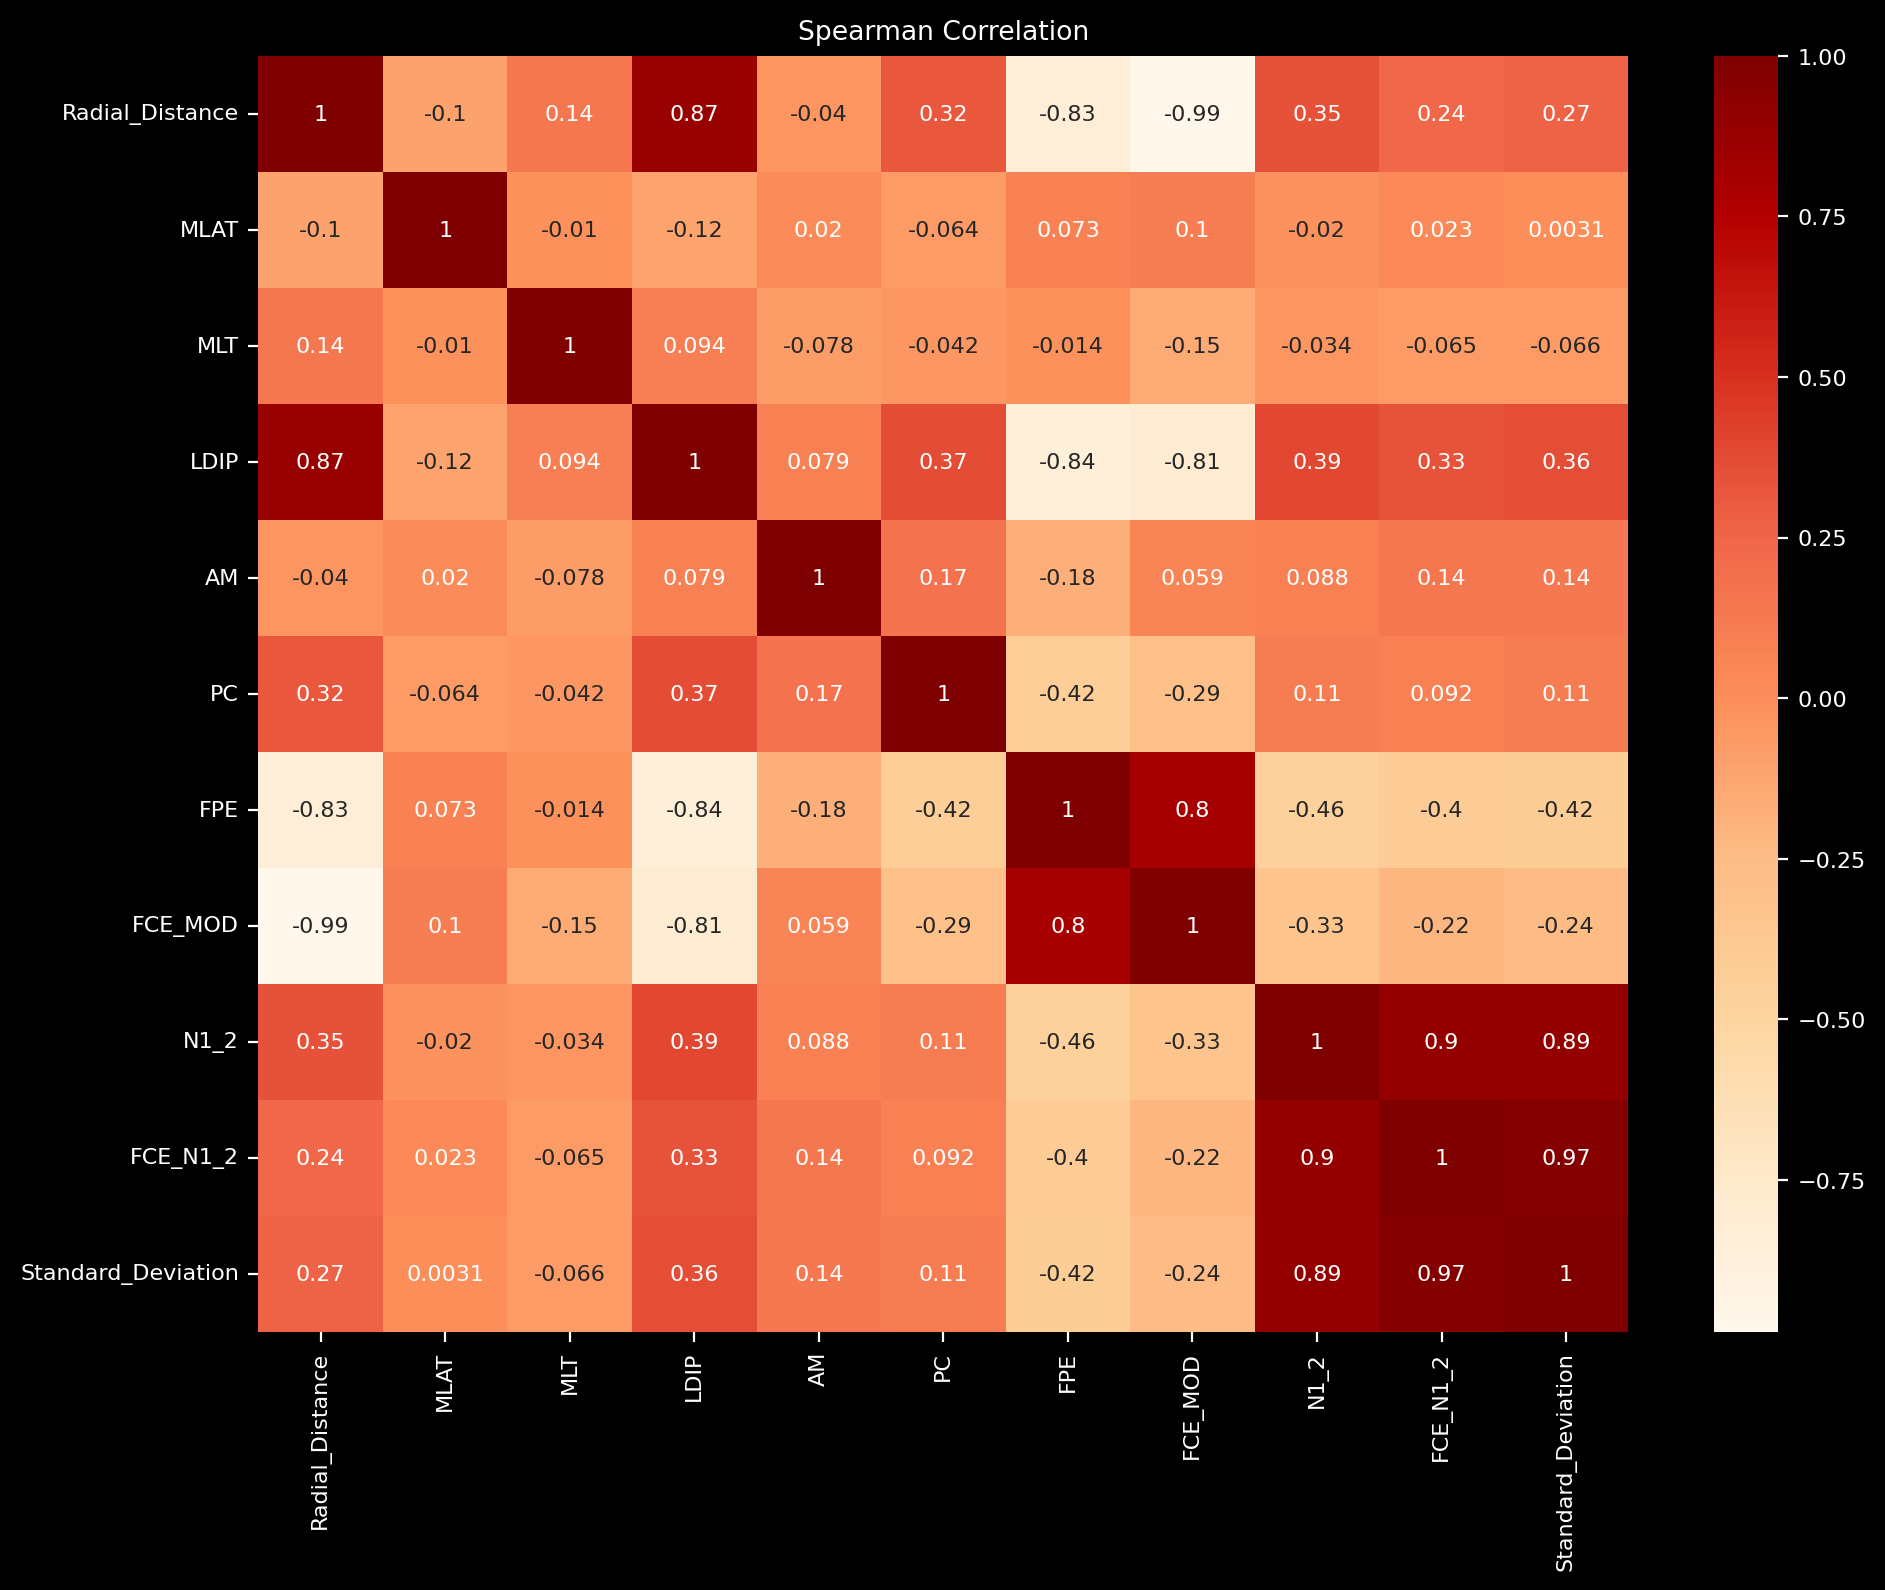

In [26]:
RelationVisualization(dataframe=dtframe,reltype="spearman").ShowGraph()

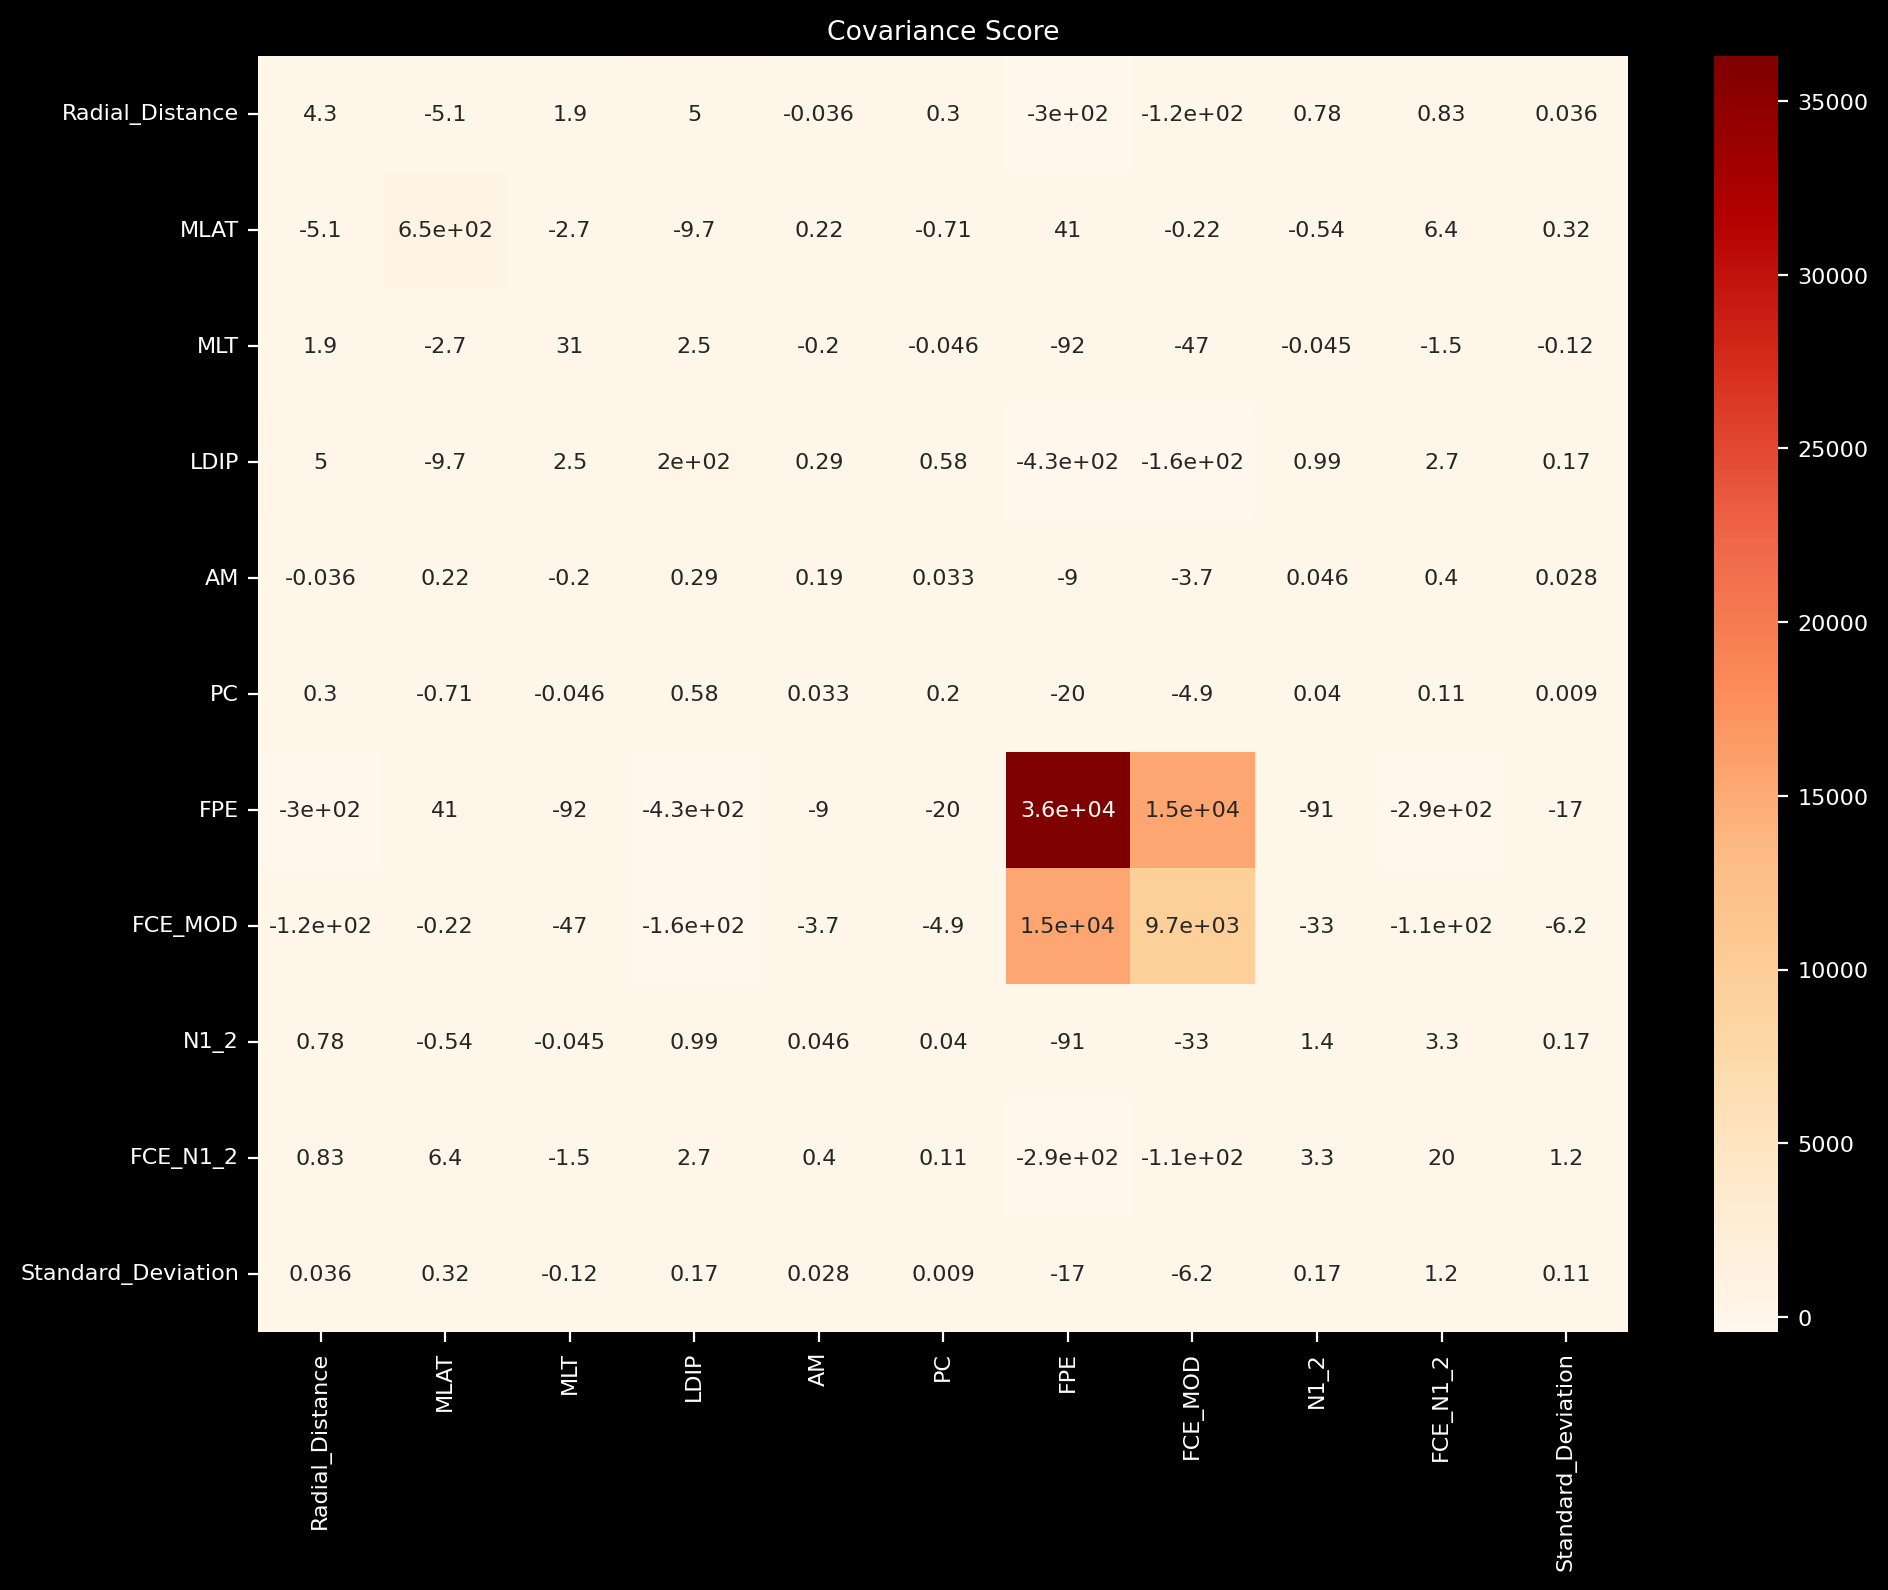

In [27]:
RelationVisualization(dataframe=dtframe,reltype="covariance").ShowGraph()

## Multi Comparing - Correlatons

In [28]:
mtb.rcParams["figure.figsize"] = (15,6)

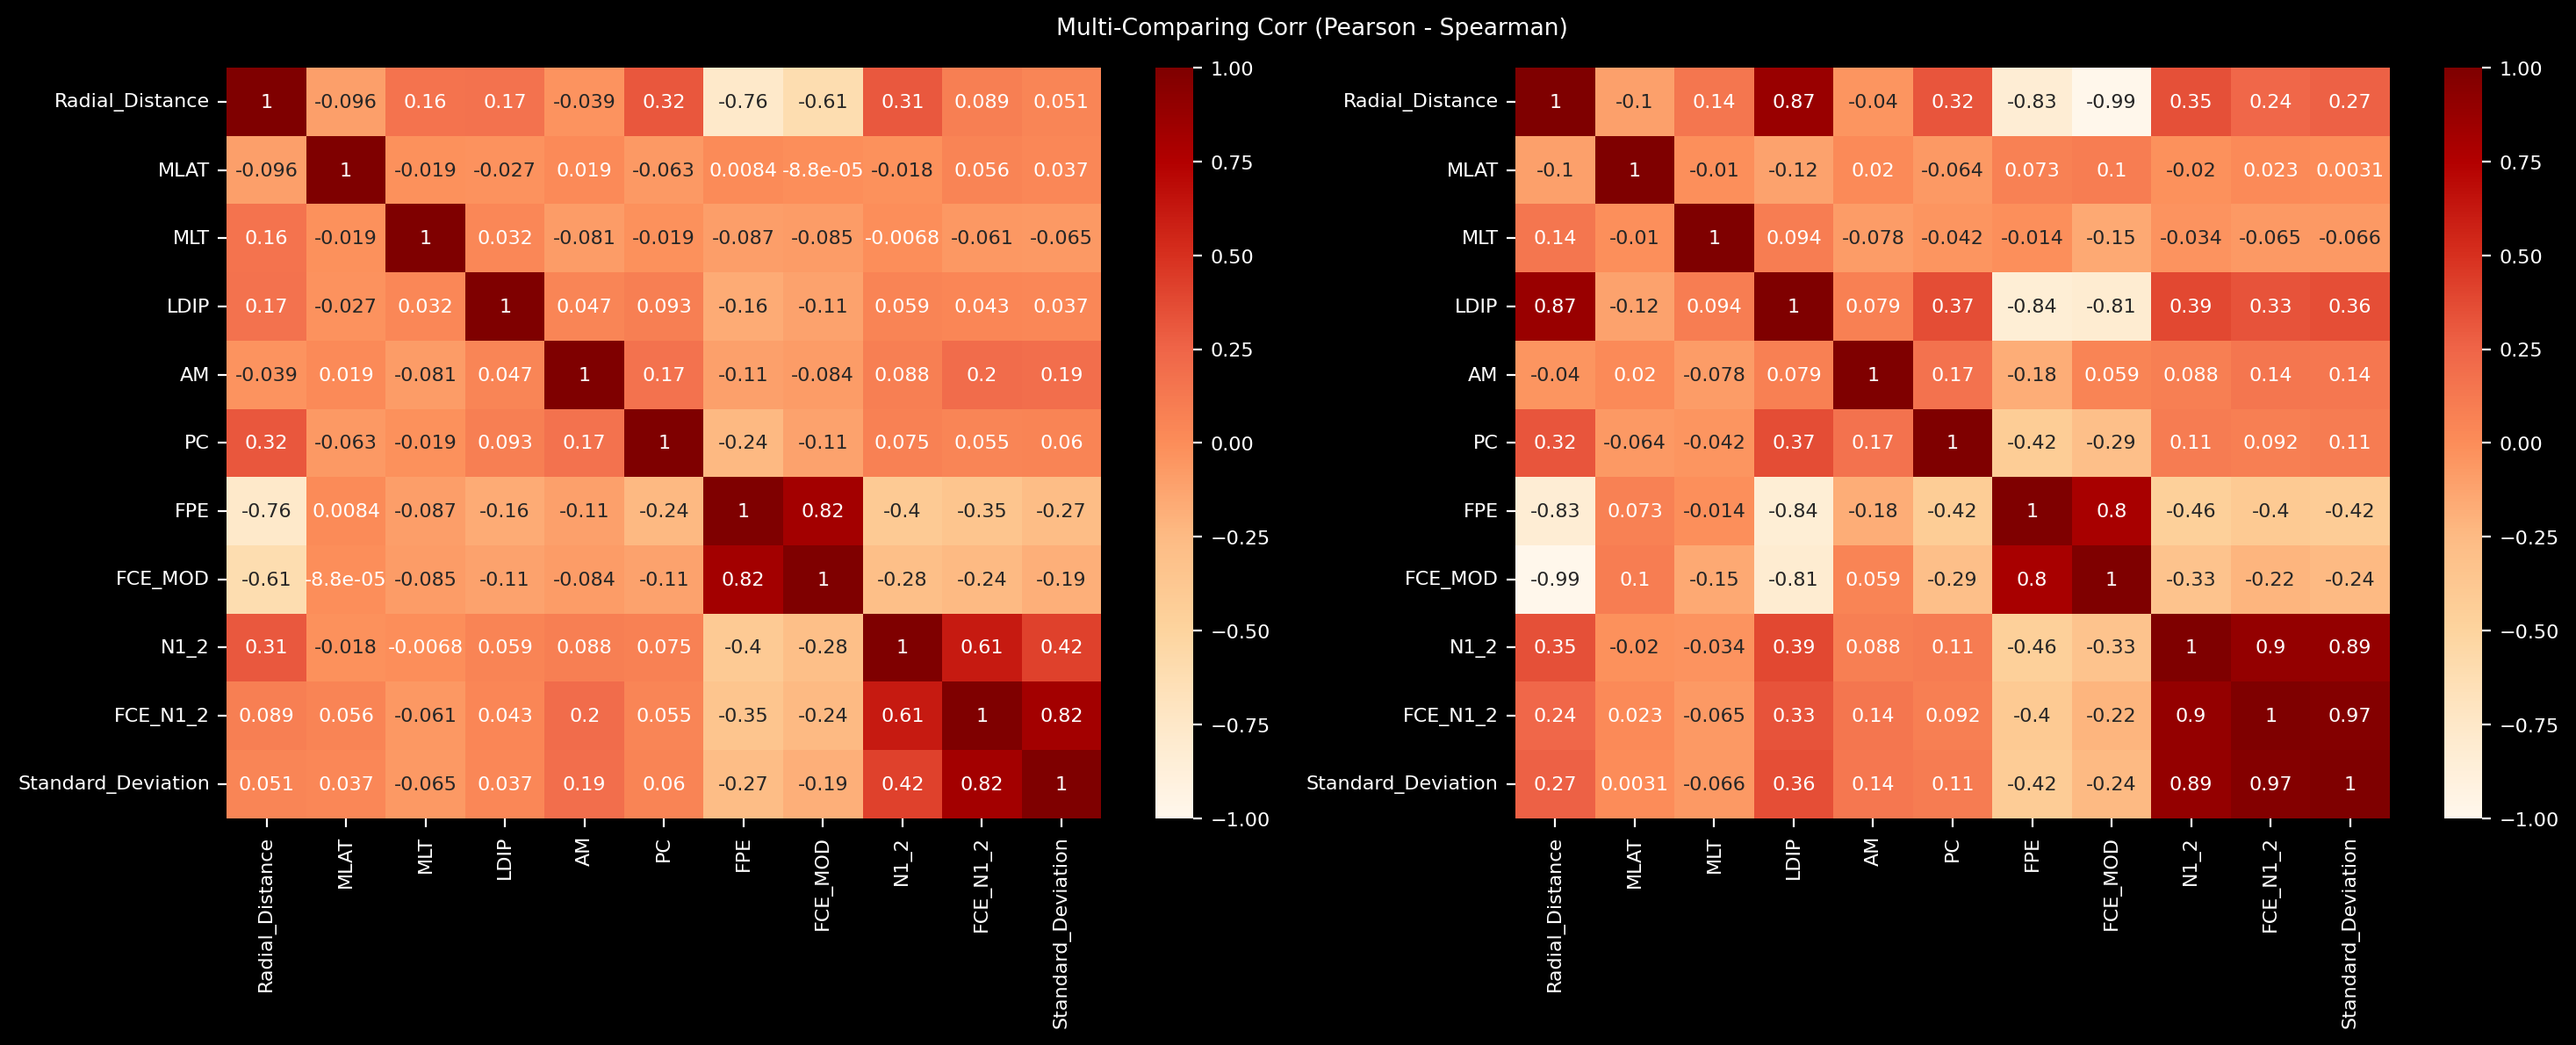

In [29]:
RelationVisualization(dataframe=dtframe,reltype="multidisplay").MultiDisplayCorr()

In [30]:
mtb.rcParams["figure.figsize"] = (10,8)

# Creating New Column For Distance

In [31]:
def CalculateReDistance(valuesinitial:list or DATA,redistance:float=6378)->PROCESS:
  _list = []
  for x_ in valuesinitial:
    _list.append(redistance*x_)
  return _list

In [32]:
_revalues = dtframe["Radial_Distance"].values
_newreforframe = CalculateReDistance(valuesinitial=_revalues)
dtframe["Radial_Distance_KM"] = _newreforframe

In [33]:
dtframe.head(5)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT    MLT  \
0  2001            1    10      31      34            6.236  35.12  18.30   
1  2001            1    10      34      36            6.190  34.62  18.31   
2  2001            1    10      38      34            6.120  33.95  18.32   
3  2001            1    10      41      36            6.067  33.44  18.33   
4  2001            1    10      45      34            5.989  32.75  18.34   

   LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
0  9.32   1   2  10.20     5.49     0      0.00                0.00   
1  9.14   1   2  13.75     5.58     1      5.58                0.16   
2  8.89   1   1  20.46     5.71     2      5.63                0.17   
3  8.71   1   1  21.25     5.82     2      5.65                0.20   
4  8.47   1   1  35.09     5.95     3      6.09                0.23   

   Radial_Distance_KM  
0           39773.208  
1           39479.820  
2           39033.360  
3           38695.326  
4           38197.842

# Creating New Column For Density

In [34]:
def CalculateCloudDensity(valuesinitial:list or DATA,khzconstant:int=1000,frmconstant:int=9000)->PROCESS:
  _list = []
  for x_ in valuesinitial:
    hz_ = x_*1000
    density = (hz_/frmconstant)**2
    _list.append(density)
  return _list

In [35]:
fpe_values = dtframe["FPE"].values
fce_values = dtframe["FCE_MOD"].values

In [36]:
density_based_fpe = CalculateCloudDensity(fpe_values)
density_based_fce = CalculateCloudDensity(fce_values)

In [37]:
dtframe["Density_Based_FPE_electron_cc"] = density_based_fpe
dtframe["Density_Based_FCE_electron_cc"] = density_based_fce

In [38]:
dtframe.head(5)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT    MLT  \
0  2001            1    10      31      34            6.236  35.12  18.30   
1  2001            1    10      34      36            6.190  34.62  18.31   
2  2001            1    10      38      34            6.120  33.95  18.32   
3  2001            1    10      41      36            6.067  33.44  18.33   
4  2001            1    10      45      34            5.989  32.75  18.34   

   LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
0  9.32   1   2  10.20     5.49     0      0.00                0.00   
1  9.14   1   2  13.75     5.58     1      5.58                0.16   
2  8.89   1   1  20.46     5.71     2      5.63                0.17   
3  8.71   1   1  21.25     5.82     2      5.65                0.20   
4  8.47   1   1  35.09     5.95     3      6.09                0.23   

   Radial_Distance_KM  Density_Based_FPE_electron_cc  \
0           39773.208                       1.284444   
1           39479.820                       2.334105   
2           39033.360                       5.168044   
3           38695.326                       5.574846   
4           38197.842                      15.201335   

   Density_Based_FCE_electron_cc  
0                       0.372100  
1                       0.384400  
2                       0.402520  
3                       0.418178  
4                       0.437068

# Creating New Column For Distance Label

In [39]:
def DefineDistanceLabel(valuesinitial:list or DATA,meanvalue:int or float,minvalue:int or float,maxvalue:int or float)->PROCESS:
  _list = []
  for x_ in valuesinitial:
    if minvalue < x_ < meanvalue:
      _list.append("Close to the planet")
    elif maxvalue > x_ > meanvalue:
      _list.append("Far from the planet")
    elif x_ == meanvalue:
      _list.append("Average distance")
    elif x_ == minvalue:
      _list.append("Closest distance")
    elif x_ == maxvalue:
      _list.append("Farthest distance")
    else:
      pass
  return _list

In [40]:
distance_values = dtframe["Radial_Distance"].values
distance_mean = dtframe["Radial_Distance"].mean()
distance_max = dtframe["Radial_Distance"].max()
distance_min = dtframe["Radial_Distance"].min()

In [41]:
distance_comparing_list = DefineDistanceLabel(distance_values,
                                              distance_mean,
                                              distance_min,
                                              distance_max)

In [42]:
dtframe["Distance_Label"] = distance_comparing_list

In [43]:
dtframe.head(5)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT    MLT  \
0  2001            1    10      31      34            6.236  35.12  18.30   
1  2001            1    10      34      36            6.190  34.62  18.31   
2  2001            1    10      38      34            6.120  33.95  18.32   
3  2001            1    10      41      36            6.067  33.44  18.33   
4  2001            1    10      45      34            5.989  32.75  18.34   

   LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
0  9.32   1   2  10.20     5.49     0      0.00                0.00   
1  9.14   1   2  13.75     5.58     1      5.58                0.16   
2  8.89   1   1  20.46     5.71     2      5.63                0.17   
3  8.71   1   1  21.25     5.82     2      5.65                0.20   
4  8.47   1   1  35.09     5.95     3      6.09                0.23   

   Radial_Distance_KM  Density_Based_FPE_electron_cc  \
0           39773.208                       1.284444   
1           39479.820                       2.334105   
2           39033.360                       5.168044   
3           38695.326                       5.574846   
4           38197.842                      15.201335   

   Density_Based_FCE_electron_cc       Distance_Label  
0                       0.372100  Far from the planet  
1                       0.384400  Far from the planet  
2                       0.402520  Far from the planet  
3                       0.418178  Far from the planet  
4                       0.437068  Far from the planet

# Correlations With New Columns

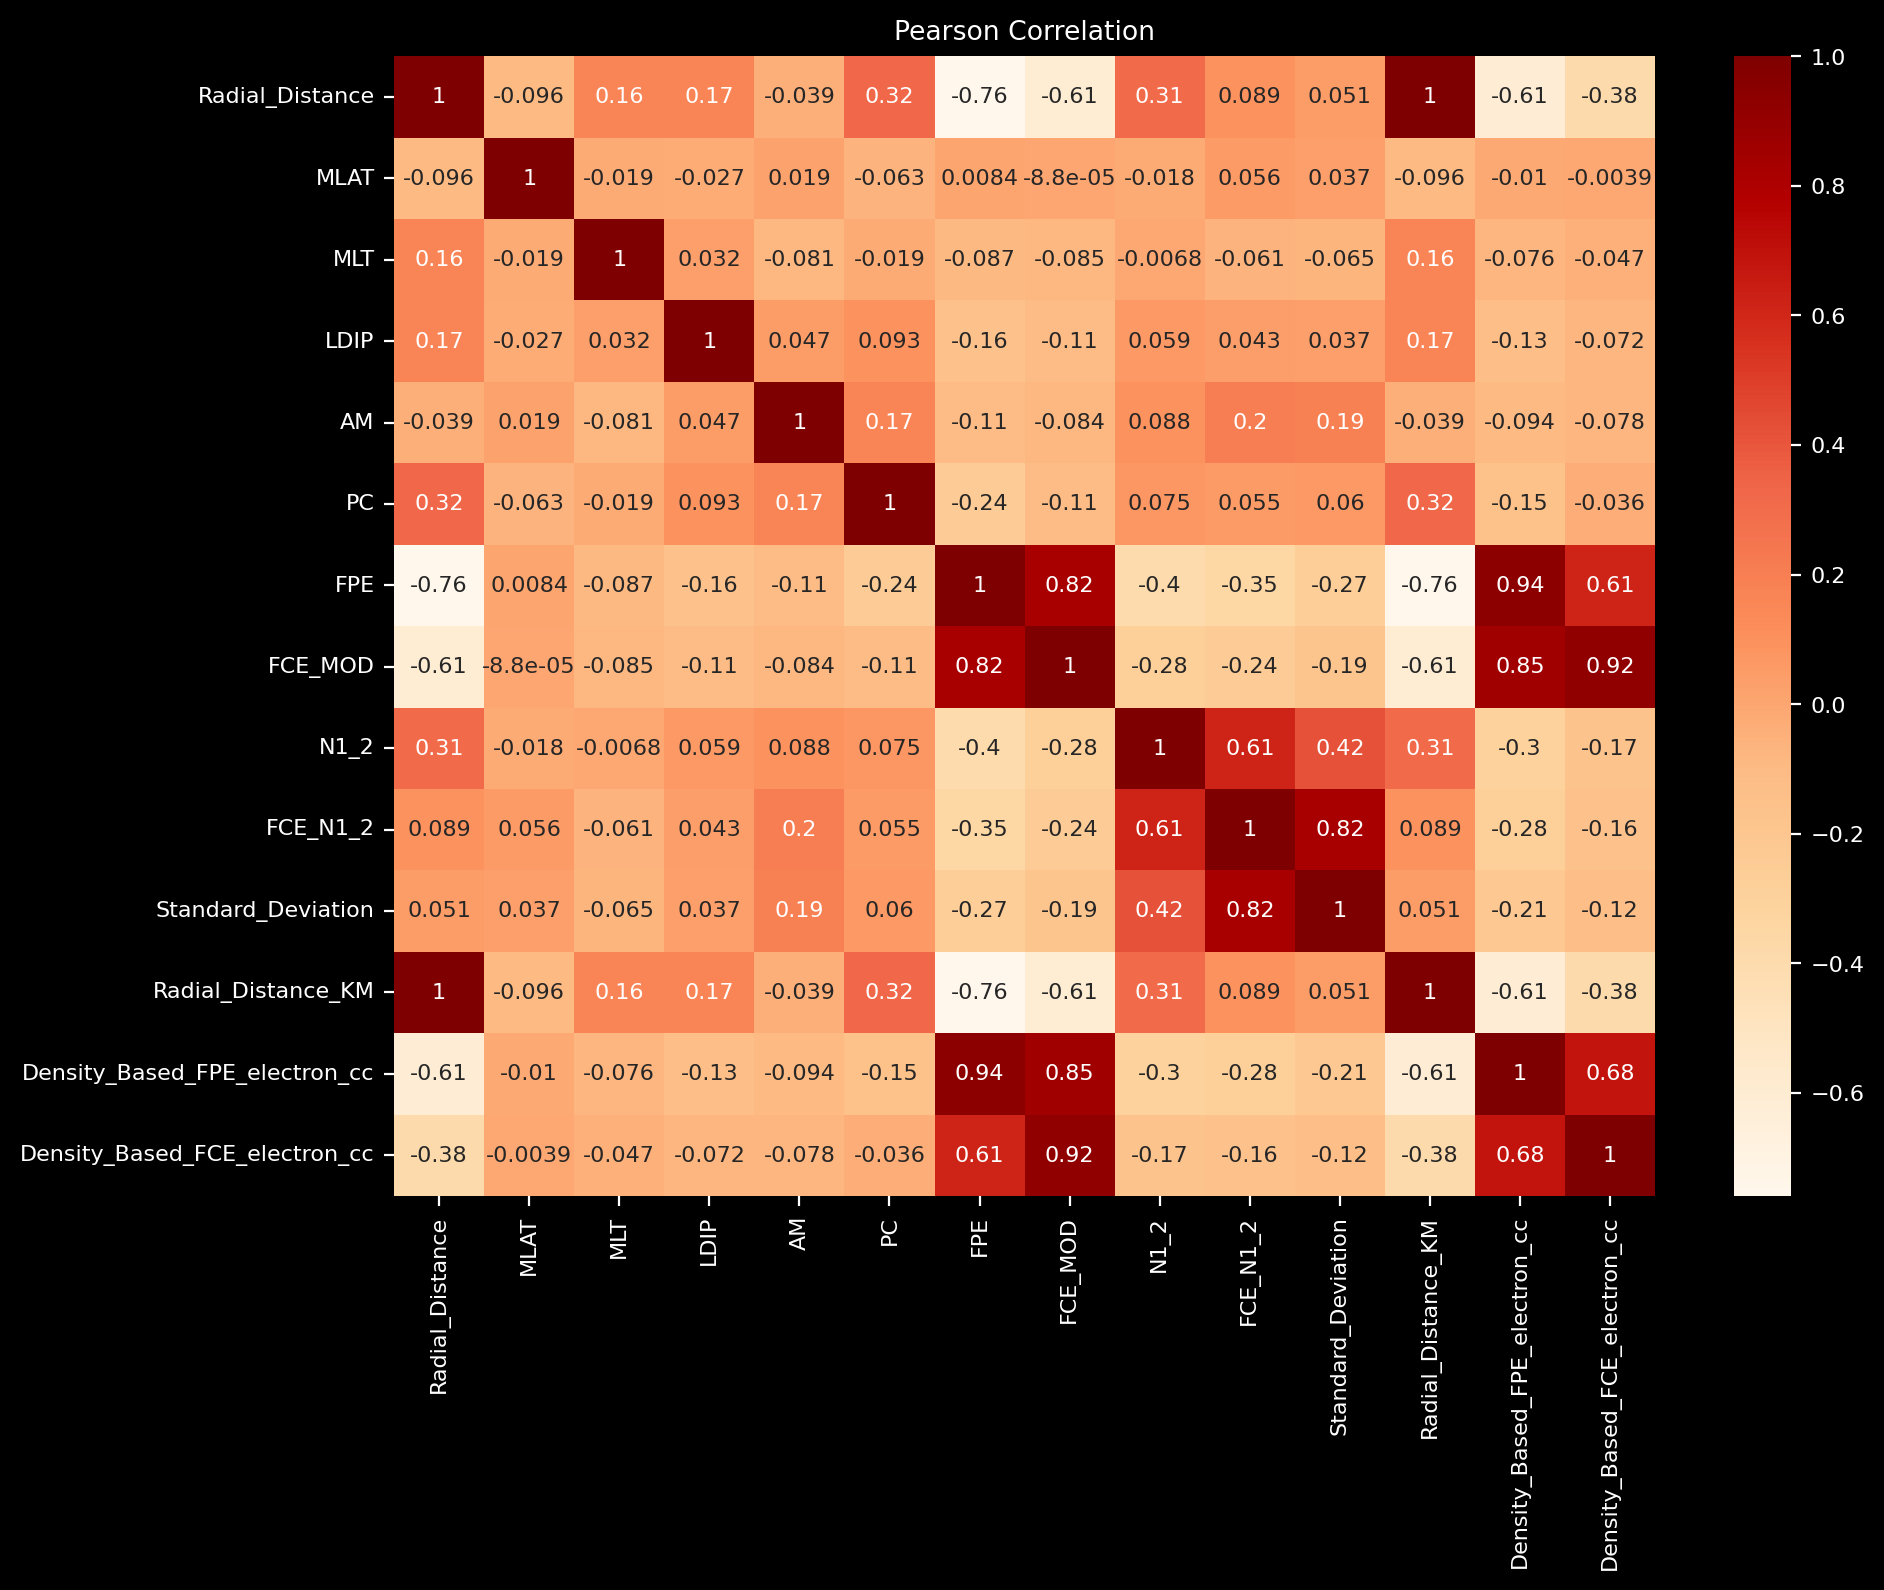

In [44]:
RelationVisualization(dataframe=dtframe,reltype="pearson").ShowGraph()

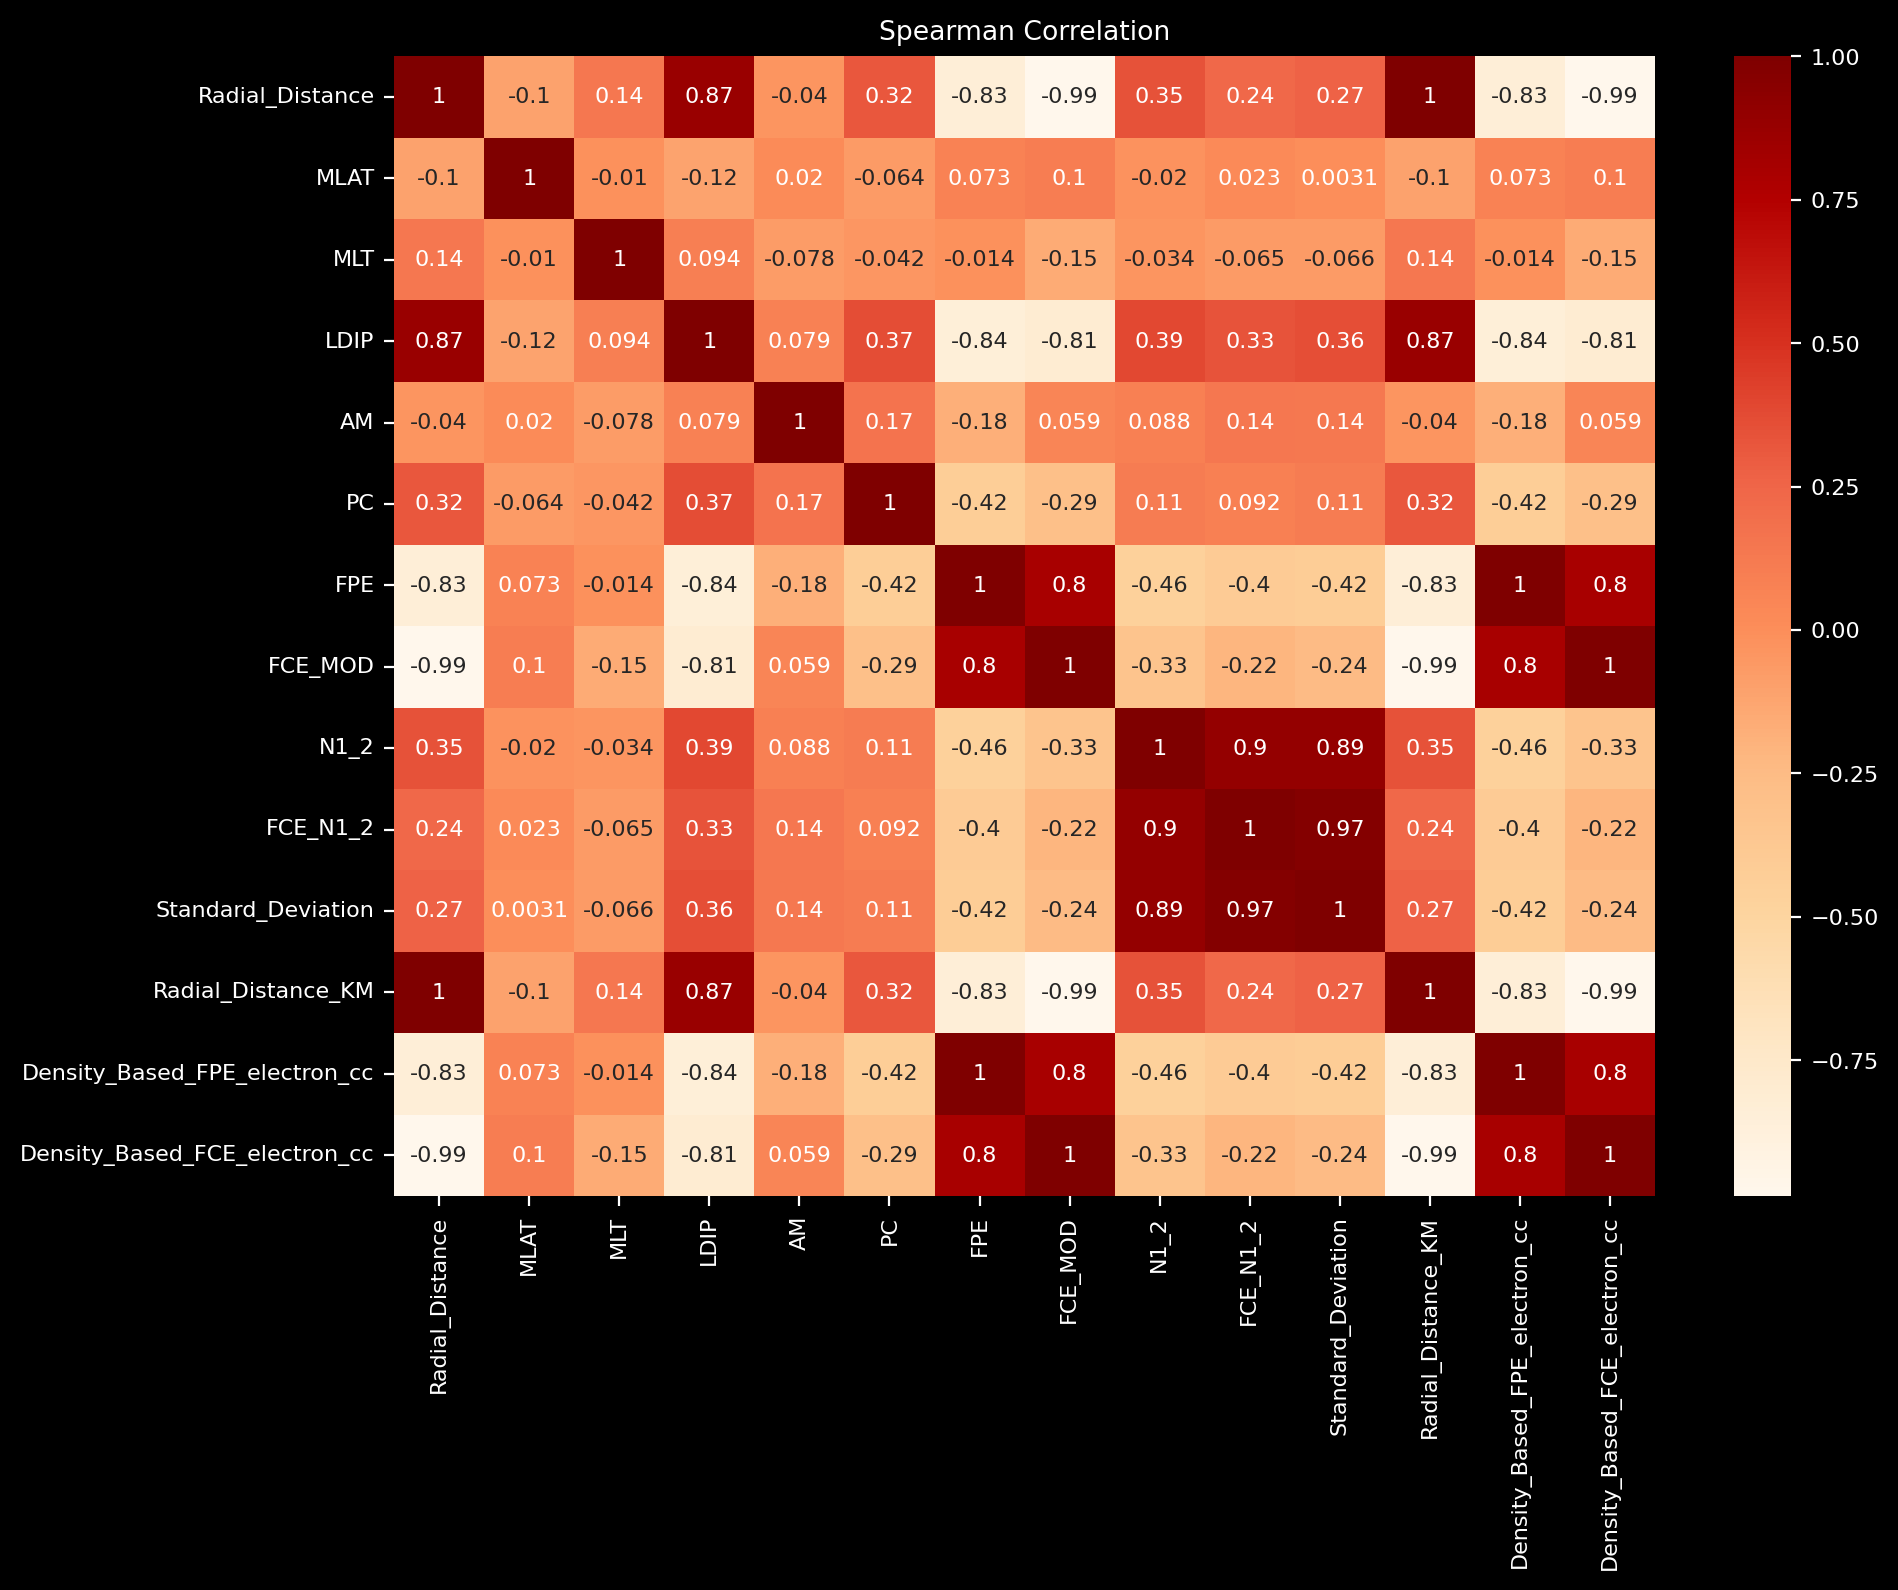

In [45]:
RelationVisualization(dataframe=dtframe,reltype="spearman").ShowGraph()

# Numeric Control

## MAX - Single Target

In [46]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Density_Based_FPE_electron_cc",isMax=True)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance  MLAT    MLT  \
67528  2002          356    11       9      27            1.192 -8.86  19.34   

       LDIP  AM  PC      FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
67528  1.22   1   2  1614.07   662.05     0       0.0                 0.0   

       Radial_Distance_KM  Density_Based_FPE_electron_cc  \
67528            7602.576                   32163.234135   

       Density_Based_FCE_electron_cc       Distance_Label  
67528                    5411.237068  Close to the planet

In [47]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Density_Based_FCE_electron_cc",isMax=True)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT   MLT  \
80736  2003          207    22      12       2            1.146 -33.16  4.92   

       LDIP  AM  PC     FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
80736  1.63   1   2  782.97   942.75     0       0.0                 0.0   

       Radial_Distance_KM  Density_Based_FPE_electron_cc  \
80736            7309.188                    7568.420011   

       Density_Based_FCE_electron_cc       Distance_Label  
80736                     10972.5625  Close to the planet

In [48]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Radial_Distance_KM",isMax=True)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT  \
69394   2003          132    35      54      34             8.25  -0.06   
70031   2003          147    17      28      30             8.25   0.72   
70391   2003          156    29       8      44             8.25   9.29   
70392   2003          157     5      19      32             8.25   9.78   
70440   2003          158     9      49      44             8.25  -1.57   
...      ...          ...   ...     ...     ...              ...    ...   
118737  2003          334    12      46      15             8.25  -6.88   
118738  2003          334    12      48      36             8.25  -6.65   
118994  2003          335    17      12      48             8.25 -11.77   
119324  2003          336    21      44      11             8.25 -23.26   
120580  2003          346     9      25      46             8.25 -11.39   

          MLT  LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  \
69394   21.51  8.25   1   2   9.63     1.17     0       0.0   
70031   20.94  8.25   1   2  10.85     1.43     0       0.0   
70391   20.10  8.47   1   1   4.28     1.89     0       0.0   
70392   20.08  8.50   1   2   0.75     1.84     0       0.0   
70440   19.84  8.26   2   1   3.79     1.39     0       0.0   
...       ...   ...  ..  ..    ...      ...   ...       ...   
118737   8.96  8.37   1   1  19.34     2.26     0       0.0   
118738   8.96  8.36   1   1  20.59     2.26     0       0.0   
118994   8.82  8.61   1   2  11.71     1.79     0       0.0   
119324   8.58  9.77   2   2  13.36     2.10     0       0.0   
120580   8.10  8.58   1   2   3.45     2.03     0       0.0   

        Standard_Deviation  Radial_Distance_KM  Density_Based_FPE_electron_cc  \
69394                  0.0             52618.5                       1.144900   
70031                  0.0             52618.5                       1.453364   
70391                  0.0             52618.5                       0.226153   
70392                  0.0             52618.5                       0.006944   
70440                  0.0             52618.5                       0.177335   
...                    ...                 ...                            ...   
118737                 0.0             52618.5                       4.617723   
118738                 0.0             52618.5                       5.233927   
118994                 0.0             52618.5                       1.692890   
119324                 0.0             52618.5                       2.203575   
120580                 0.0             52618.5                       0.146944   

        Density_Based_FCE_electron_cc     Distance_Label  
69394                        0.016900  Farthest distance  
70031                        0.025246  Farthest distance  
70391                        0.044100  Farthest distance  
70392                        0.041798  Farthest distance  
70440                        0.023853  Farthest distance  
...                               ...                ...  
118737                       0.063057  Farthest distance  
118738                       0.063057  Farthest distance  
118994                       0.039557  Farthest distance  
119324                       0.054444  Farthest distance  
120580                       0.050875  Farthest distance  

[1256 rows x 20 columns]

## MIN - Single Target

In [49]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Density_Based_FPE_electron_cc",isMax=False)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance  MLAT   MLT  \
127278  2004           63     8      53       8            6.831  0.97  2.37   

        LDIP  AM  PC   FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
127278  6.83   1   2  0.42     1.73     0       0.0                 0.0   

        Radial_Distance_KM  Density_Based_FPE_electron_cc  \
127278           43568.118                       0.002178   

        Density_Based_FCE_electron_cc       Distance_Label  
127278                       0.036949  Far from the planet

In [50]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Density_Based_FCE_electron_cc",isMax=False)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance  MLAT   MLT  \
116653  2003          325    17       2      18            7.888  0.68  9.41   
116658  2003          325    17      14      18            7.808  1.43  9.39   

        LDIP  AM  PC    FPE  FCE_MOD  N1_2  FCE_N1_2  Standard_Deviation  \
116653  7.89   1   1  12.81     0.42     0       0.0                 0.0   
116658  7.81   1   2  14.27     0.42     0       0.0                 0.0   

        Radial_Distance_KM  Density_Based_FPE_electron_cc  \
116653           50309.664                       2.025878   
116658           49799.424                       2.513986   

        Density_Based_FCE_electron_cc       Distance_Label  
116653                       0.002178  Far from the planet  
116658                       0.002178  Far from the planet

In [51]:
DataReading().GetConditionCheck(outdata=dtframe,prm="Radial_Distance_KM",isMax=False)

Year  Day_of_year  Hour  Minute  Second  Radial_Distance   MLAT  \
70048   2003          150     9      33      58              1.1   4.59   
70071   2003          153     8      45      59              1.1  -7.60   
70154   2003          154    27      25      59              1.1 -11.34   
73556   2003          180    29      38      54              1.1   3.33   
73557   2003          180    29      41      54              1.1 -11.02   
74768   2003          185     9      17      52              1.1   4.31   
77234   2003          196    29      55       0              1.1   9.42   
77235   2003          196    29      58       0              1.1  -4.98   
77496   2003          198    10      22      60              1.1  15.30   
77497   2003          198    10      26       0              1.1   0.55   
77823   2003          199    14      52       0              1.1   3.27   
78142   2003          200    19      18      60              1.1  -3.31   
79992   2003          205    13      10       2              1.1  13.73   
80735   2003          207    22       6       3              1.1  -4.58   
81580   2003          209    31       2       4              1.1  12.26   
81856   2003          211    11      30       4              1.1  12.21   
82656   2003          214    10      41       5              1.1   7.33   
82976   2003          215    15       8       5              1.1   2.75   
83923   2003          217    24       0      59              1.1   5.71   
83924   2003          217    24       3      58              1.1  -3.79   
84373   2003          218    28      31      59              1.1   7.12   
89706   2003          237    13      43      60              1.1   4.77   
90181   2003          238    18      11      60              1.1  -5.20   
120718  2003          347    20      58       6              1.1  27.20   

          MLT  LDIP  AM  PC     FPE  FCE_MOD  N1_2  FCE_N1_2  \
70048    8.44  1.11   1   2  708.97   588.67     0       0.0   
70071    8.14  1.12   1   2  715.57   596.51     0       0.0   
70154    8.36  1.14   1   1  598.49   813.14     0       0.0   
73556    6.54  1.10   1   1  678.21   659.24     0       0.0   
73557    6.35  1.14   1   2  730.30   633.19     0       0.0   
74768    6.02  1.11   1   2  720.65   546.22     0       0.0   
77234    5.49  1.13   1   1  682.11   632.84     0       0.0   
77235    5.32  1.11   1   1  639.37   598.03     0       0.0   
77496    5.13  1.18   1   1  657.41   680.51     0       0.0   
77497    5.12  1.10   1   2  702.13   553.57     0       0.0   
77823    5.11  1.10   1   1  685.96   687.19     0       0.0   
78142    5.42  1.10   1   1  624.43   776.46     0       0.0   
79992    4.57  1.17   1   1  684.11   703.64     0       0.0   
80735    5.01  1.11   1   1  552.55   848.81     0       0.0   
81580    4.57  1.15   1   1  699.18   595.20     0       0.0   
81856    4.23  1.15   1   1  646.50   692.02     0       0.0   
82656    4.10  1.12   1   1  722.61   646.17     0       0.0   
82976    4.09  1.10   1   1  637.04   702.18     0       0.0   
83923    4.37  1.11   1   1  610.63   780.11     0       0.0   
83924    4.28  1.10   1   2  698.68   770.96     0       0.0   
84373    4.10  1.12   1   2  717.36   628.96     0       0.0   
89706    2.70  1.11   1   1  641.47   700.15     0       0.0   
90181    2.89  1.11   1   1  598.14   815.01     0       0.0   
120718  19.85  1.39   1   1  642.35   718.05     0       0.0   

        Standard_Deviation  Radial_Distance_KM  Density_Based_FPE_electron_cc  \
70048                  0.0              7015.8                    6205.413098   
70071                  0.0              7015.8                    6321.486727   
70154                  0.0              7015.8                    4422.102223   
73556                  0.0              7015.8                    5678.627211   
73557                  0.0              7015.8                    6584.420864   
74768                  0.0              7015.

## Value Counts

### Distance Labels - Data Counting

In [52]:
dtframe["Distance_Label"].value_counts()

Close to the planet    93562
Far from the planet    92270
Farthest distance       1256
Closest distance          24
Name: Distance_Label, dtype: int64

In [53]:
dtframe["Year"].value_counts()

2003    54849
2004    39708
2001    37811
2002    30424
2005    24320
Name: Year, dtype: int64

# Distance Based - Visualization

In [54]:
class DataGeneralVisualization(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe
  def __str__(self)->str:
    return "Data General Visualization - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return DataGeneralVisualization.__doc__
  def RangeControl(self,var_one:DATA,var_two:DATA)->PROCESS:
    min_ = min(var_one.min(),var_two.min())
    max_ = max(var_one.max(),var_two.max())
    return min_,max_
  def ShowDistplot(self,variable_one:str,variable_two:str,target_frame:str,target_value:str,expl:str)->PROCESS:
    f_ = plt.figure(figsize=(10,8))
    val1 = self.dt[self.dt[target_frame]==variable_one][target_value]
    val2 = self.dt[self.dt[target_frame]==variable_two][target_value]
    min_,max_ = self.RangeControl(val1,val2)
    sns.distplot(val1,
                 color="red",
                 label=str(variable_one))
    sns.distplot(val2,
                 color="green",
                 label=str(variable_two))
    plt.title(f"Comparing Based {target_value} - {variable_one} | {variable_two}")
    plt.xlabel(expl)
    #plt.xlim(int(min_),int(max_))
    plt.legend(prop=dict(size=10))
    plt.tight_layout()
    plt.show()

## Far From The Planet - Close To The Planet

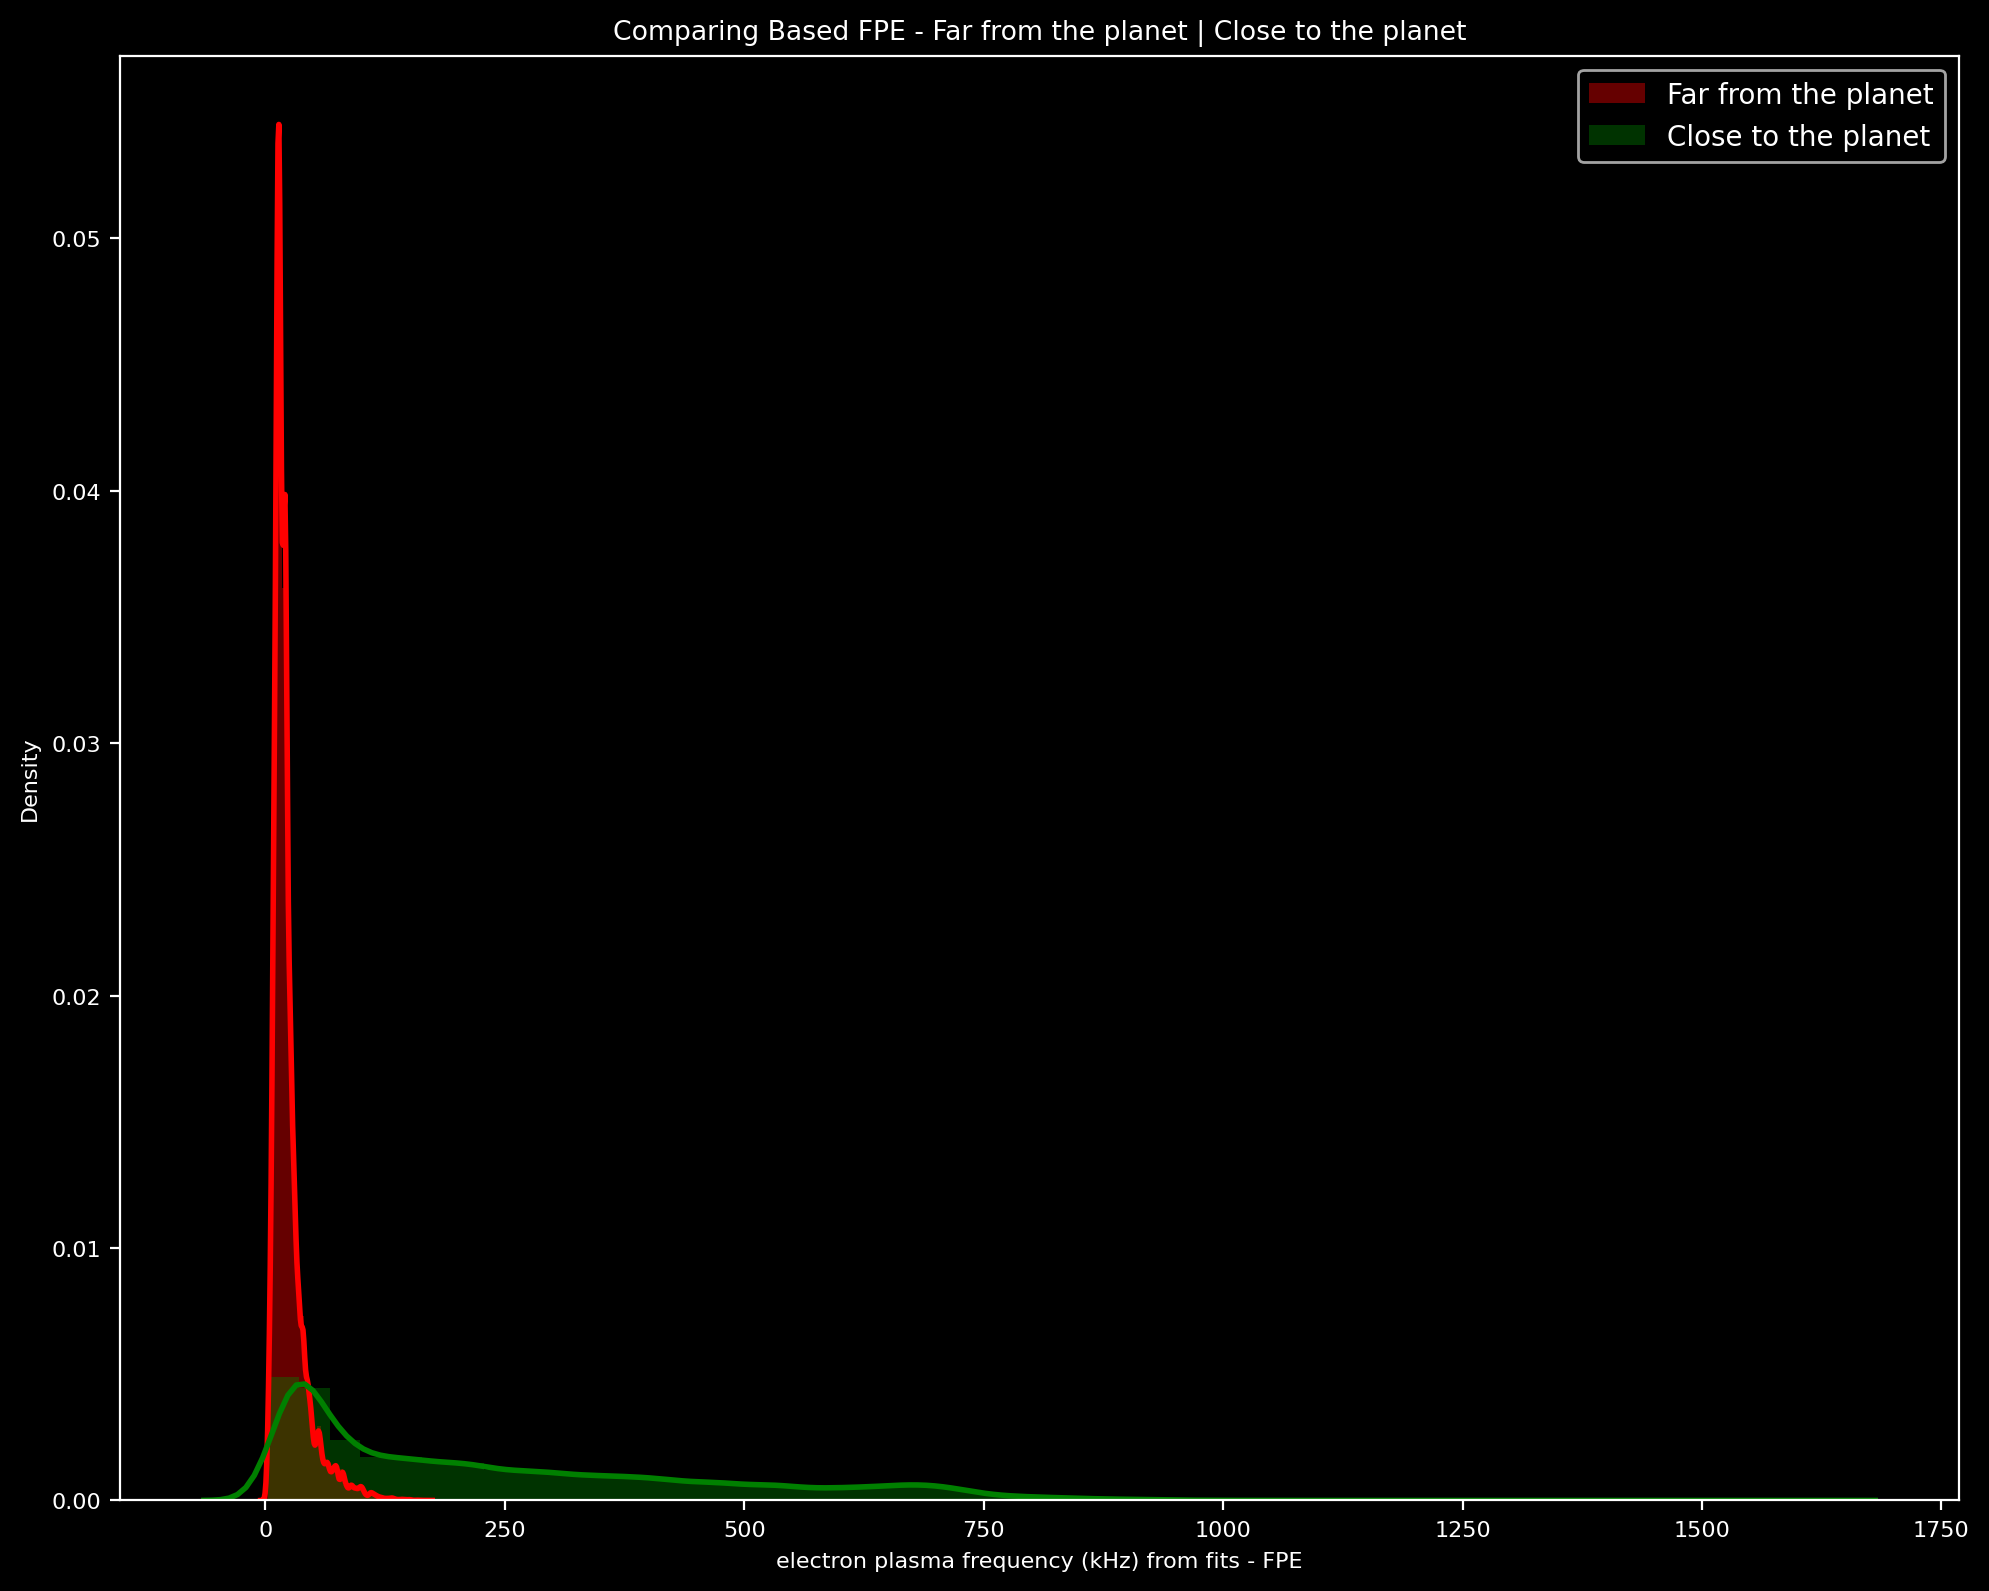

In [55]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Far from the planet",
                                               variable_two="Close to the planet",
                                               target_frame="Distance_Label",
                                               target_value="FPE",
                                               expl="electron plasma frequency (kHz) from fits - FPE")

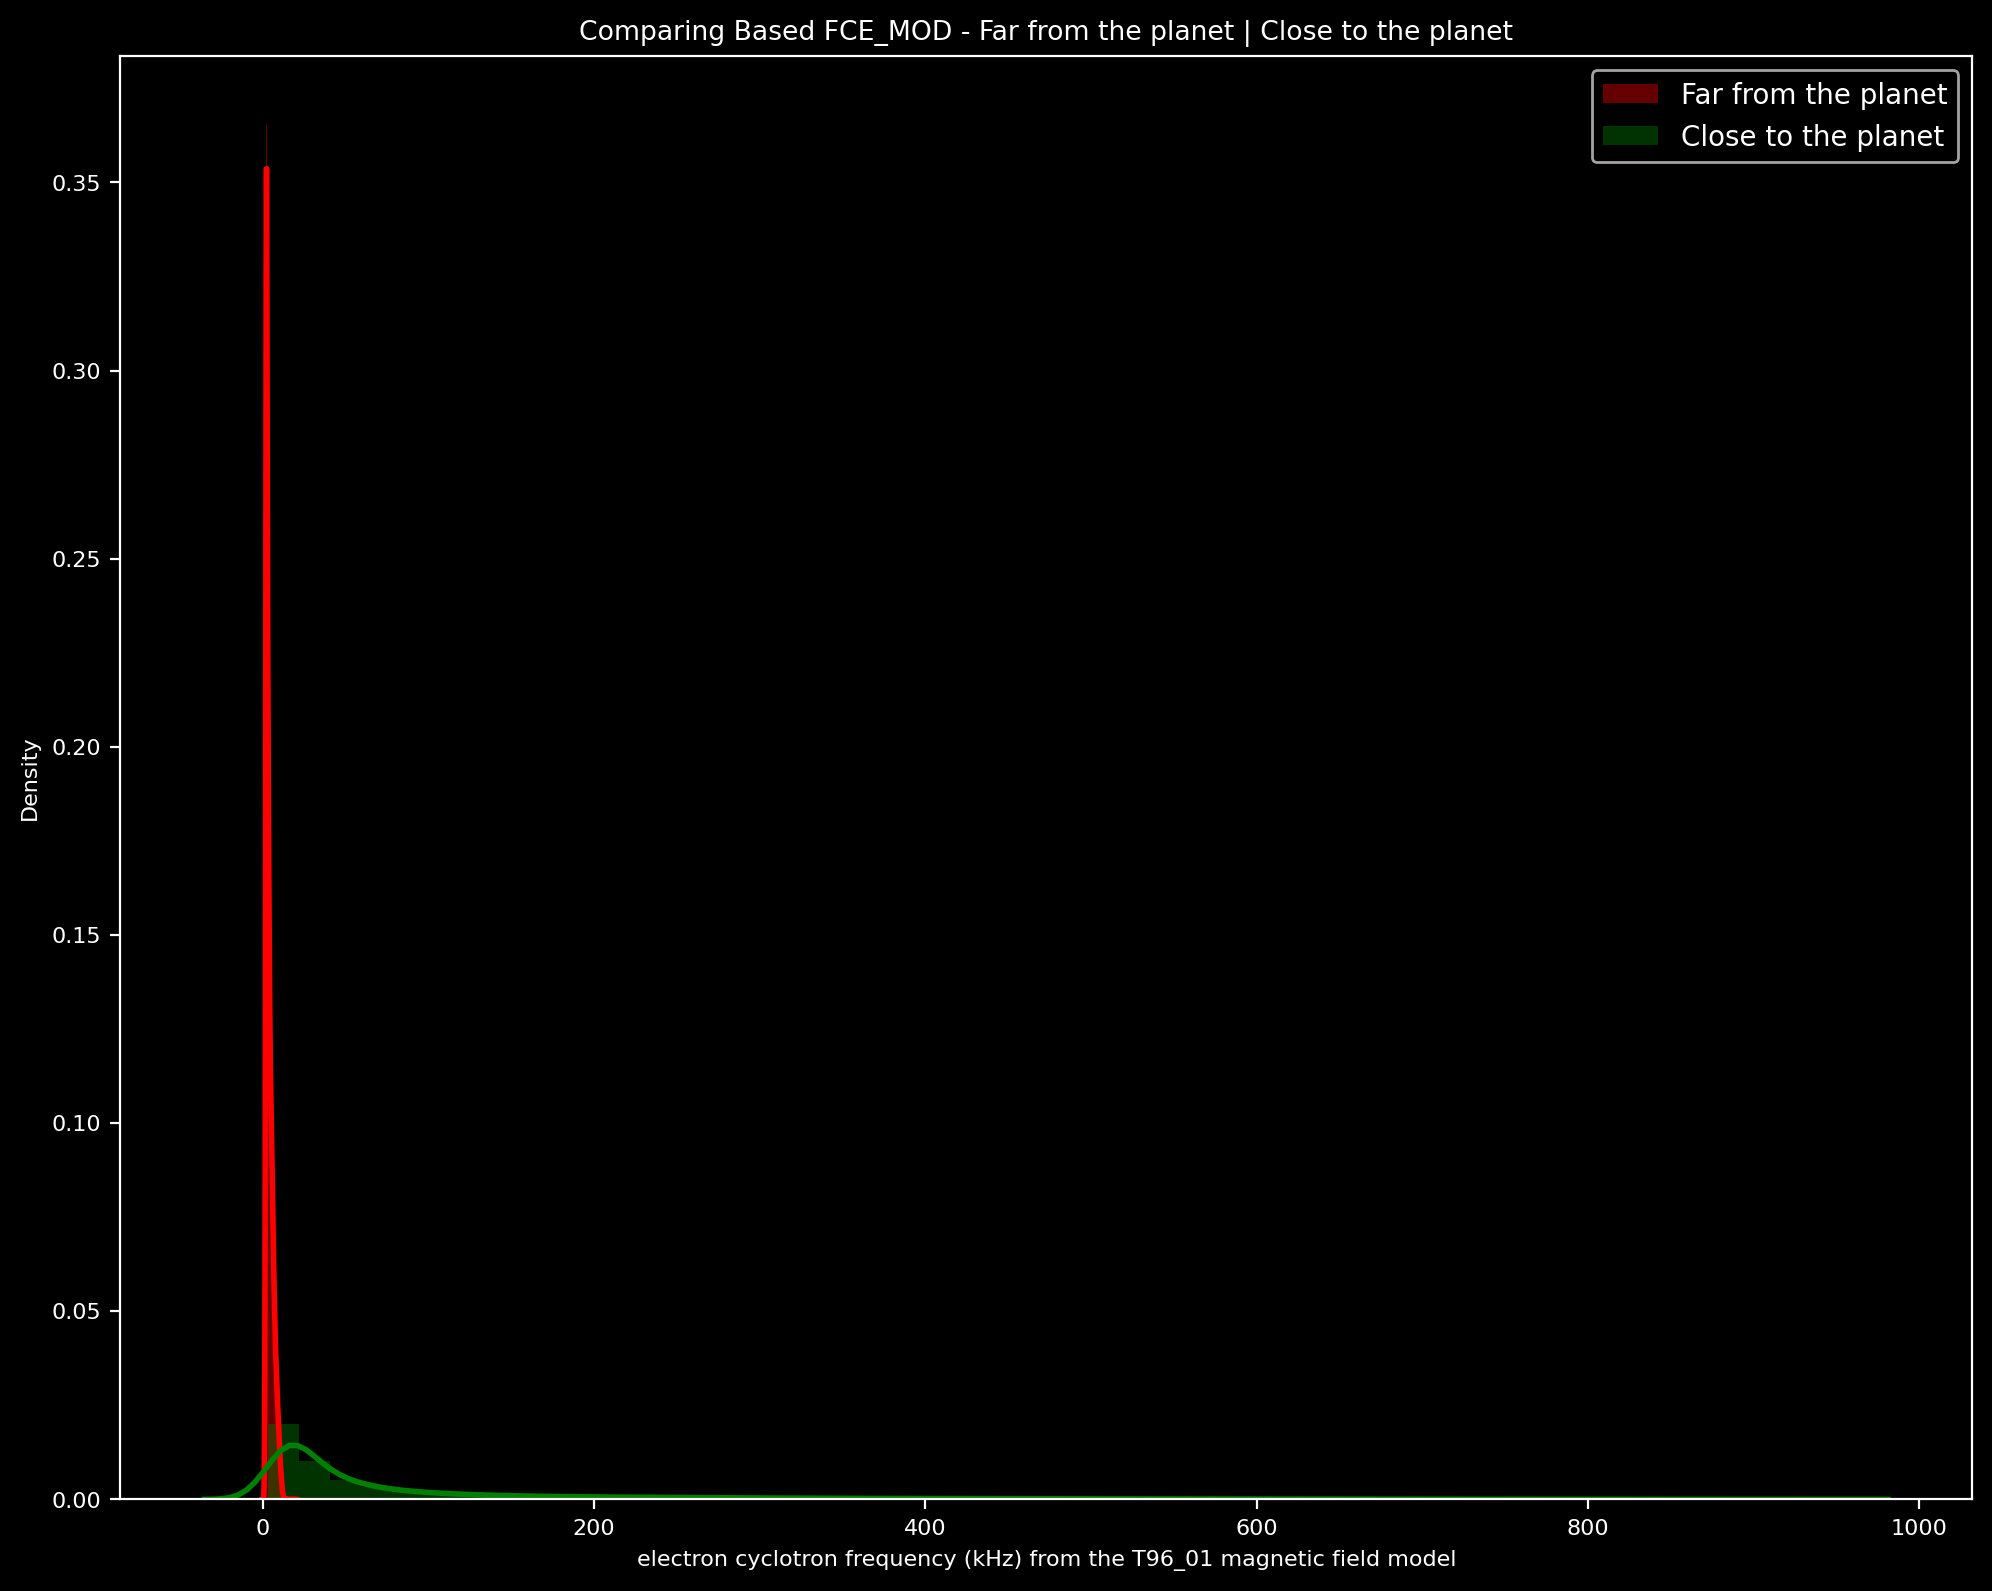

In [56]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Far from the planet",
                                               variable_two="Close to the planet",
                                               target_frame="Distance_Label",
                                               target_value="FCE_MOD",
                                               expl="electron cyclotron frequency (kHz) from the T96_01 magnetic field model")

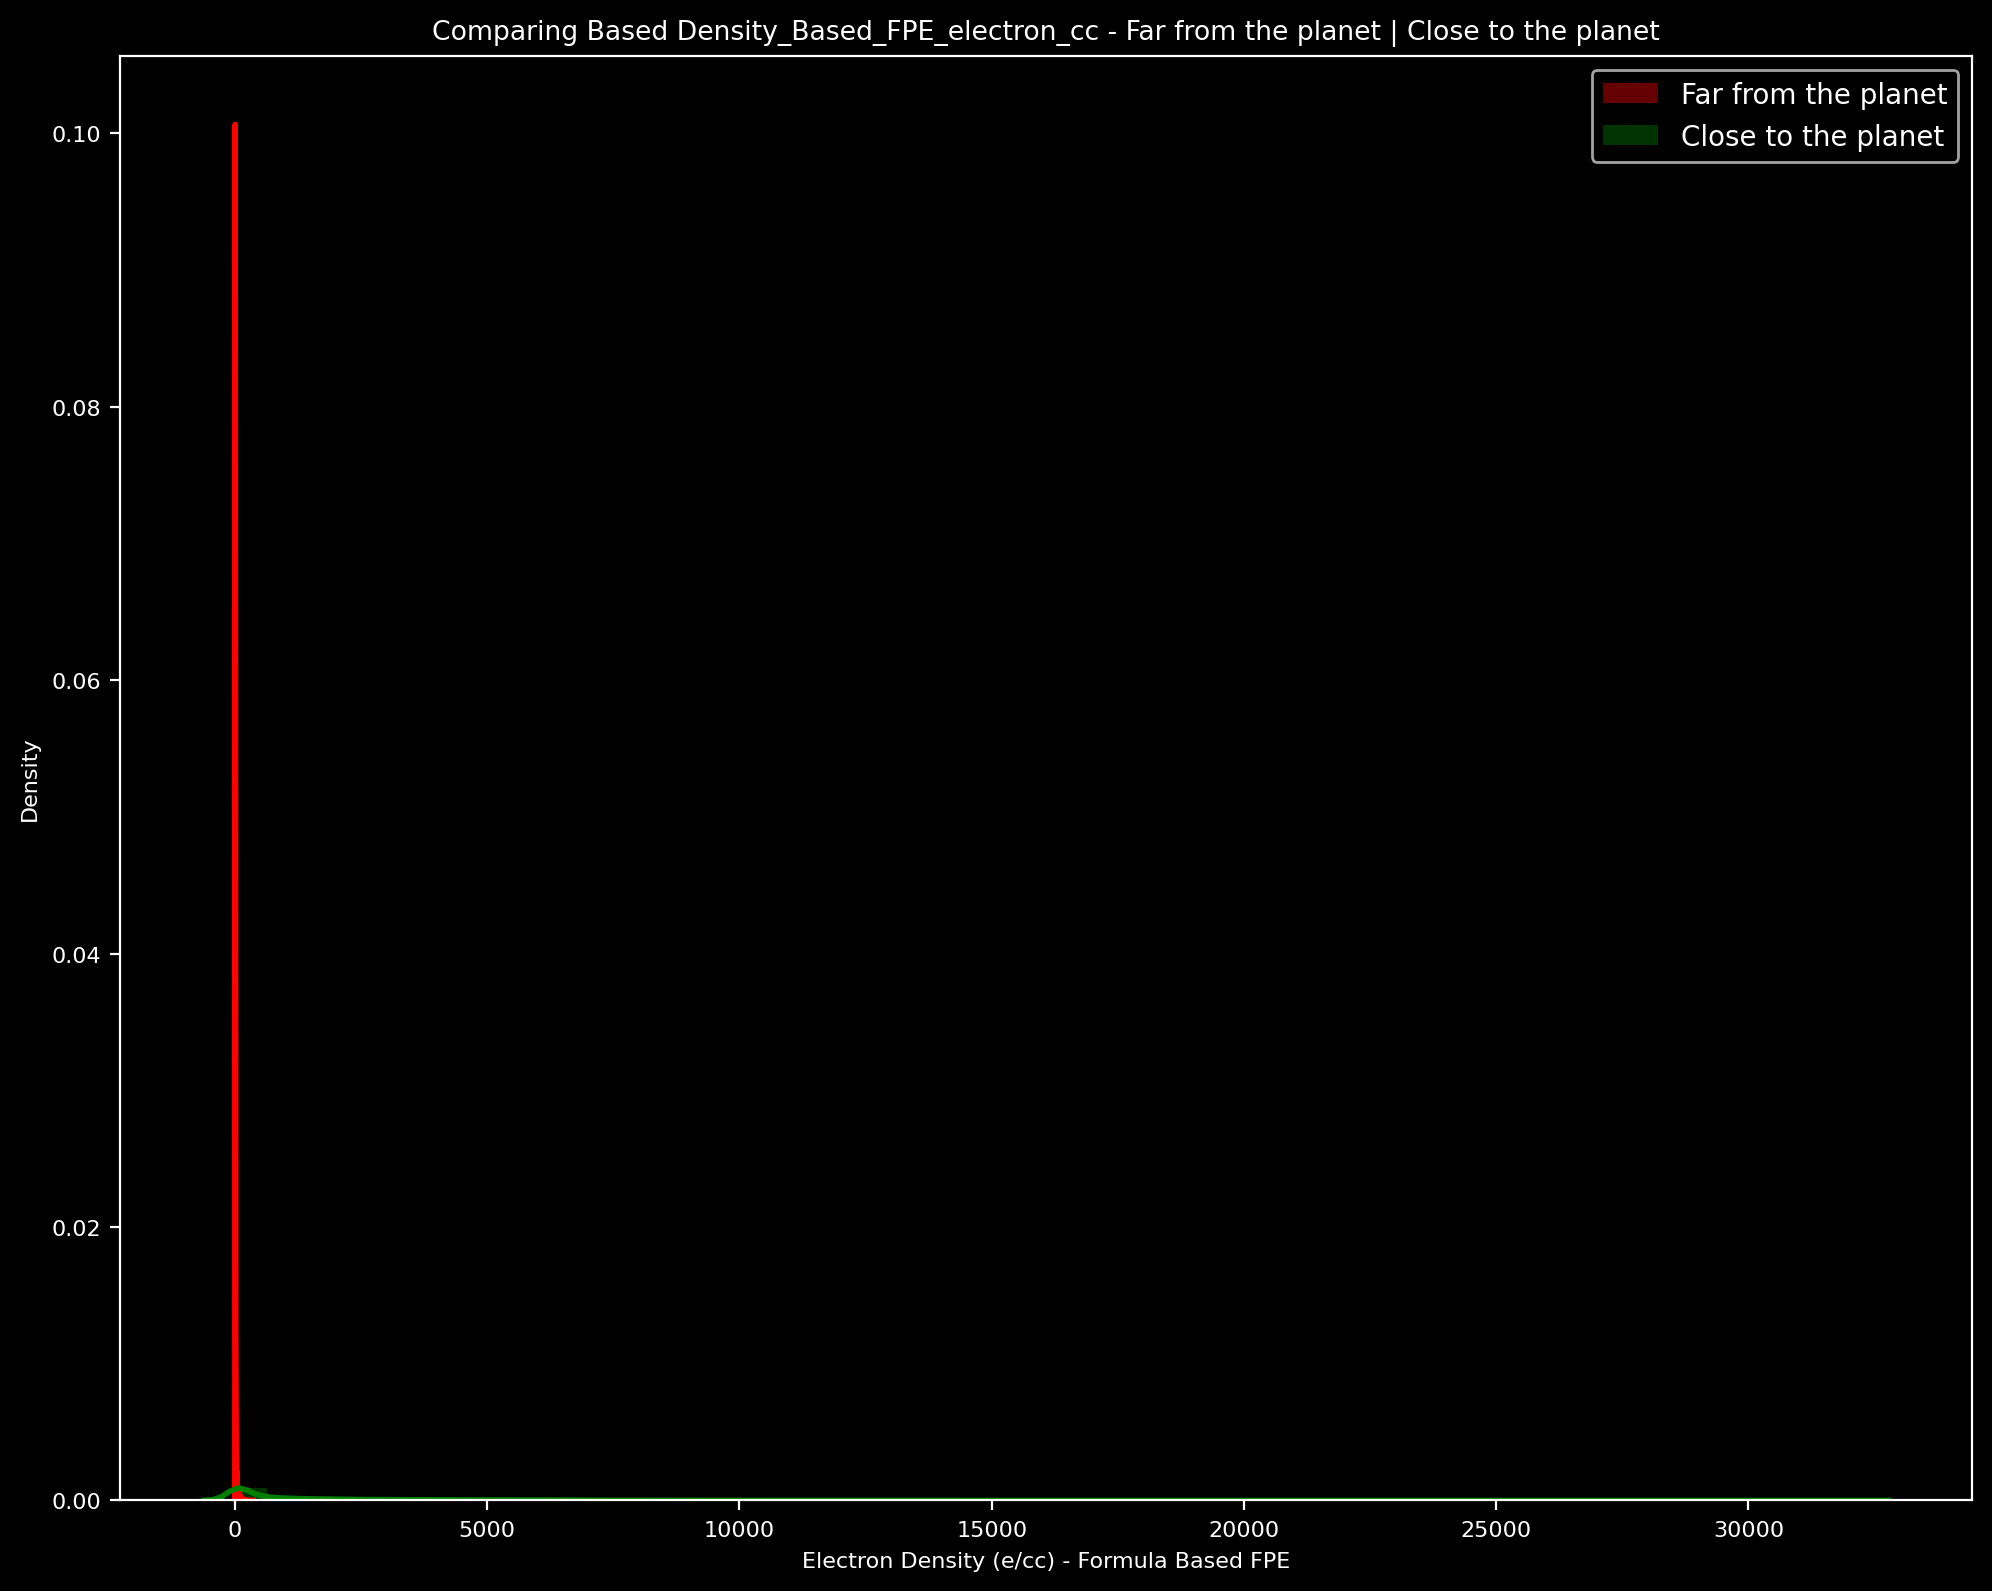

In [57]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Far from the planet",
                                               variable_two="Close to the planet",
                                               target_frame="Distance_Label",
                                               target_value="Density_Based_FPE_electron_cc",
                                               expl="Electron Density (e/cc) - Formula Based FPE")

## Farthest Distance - Closest Distance

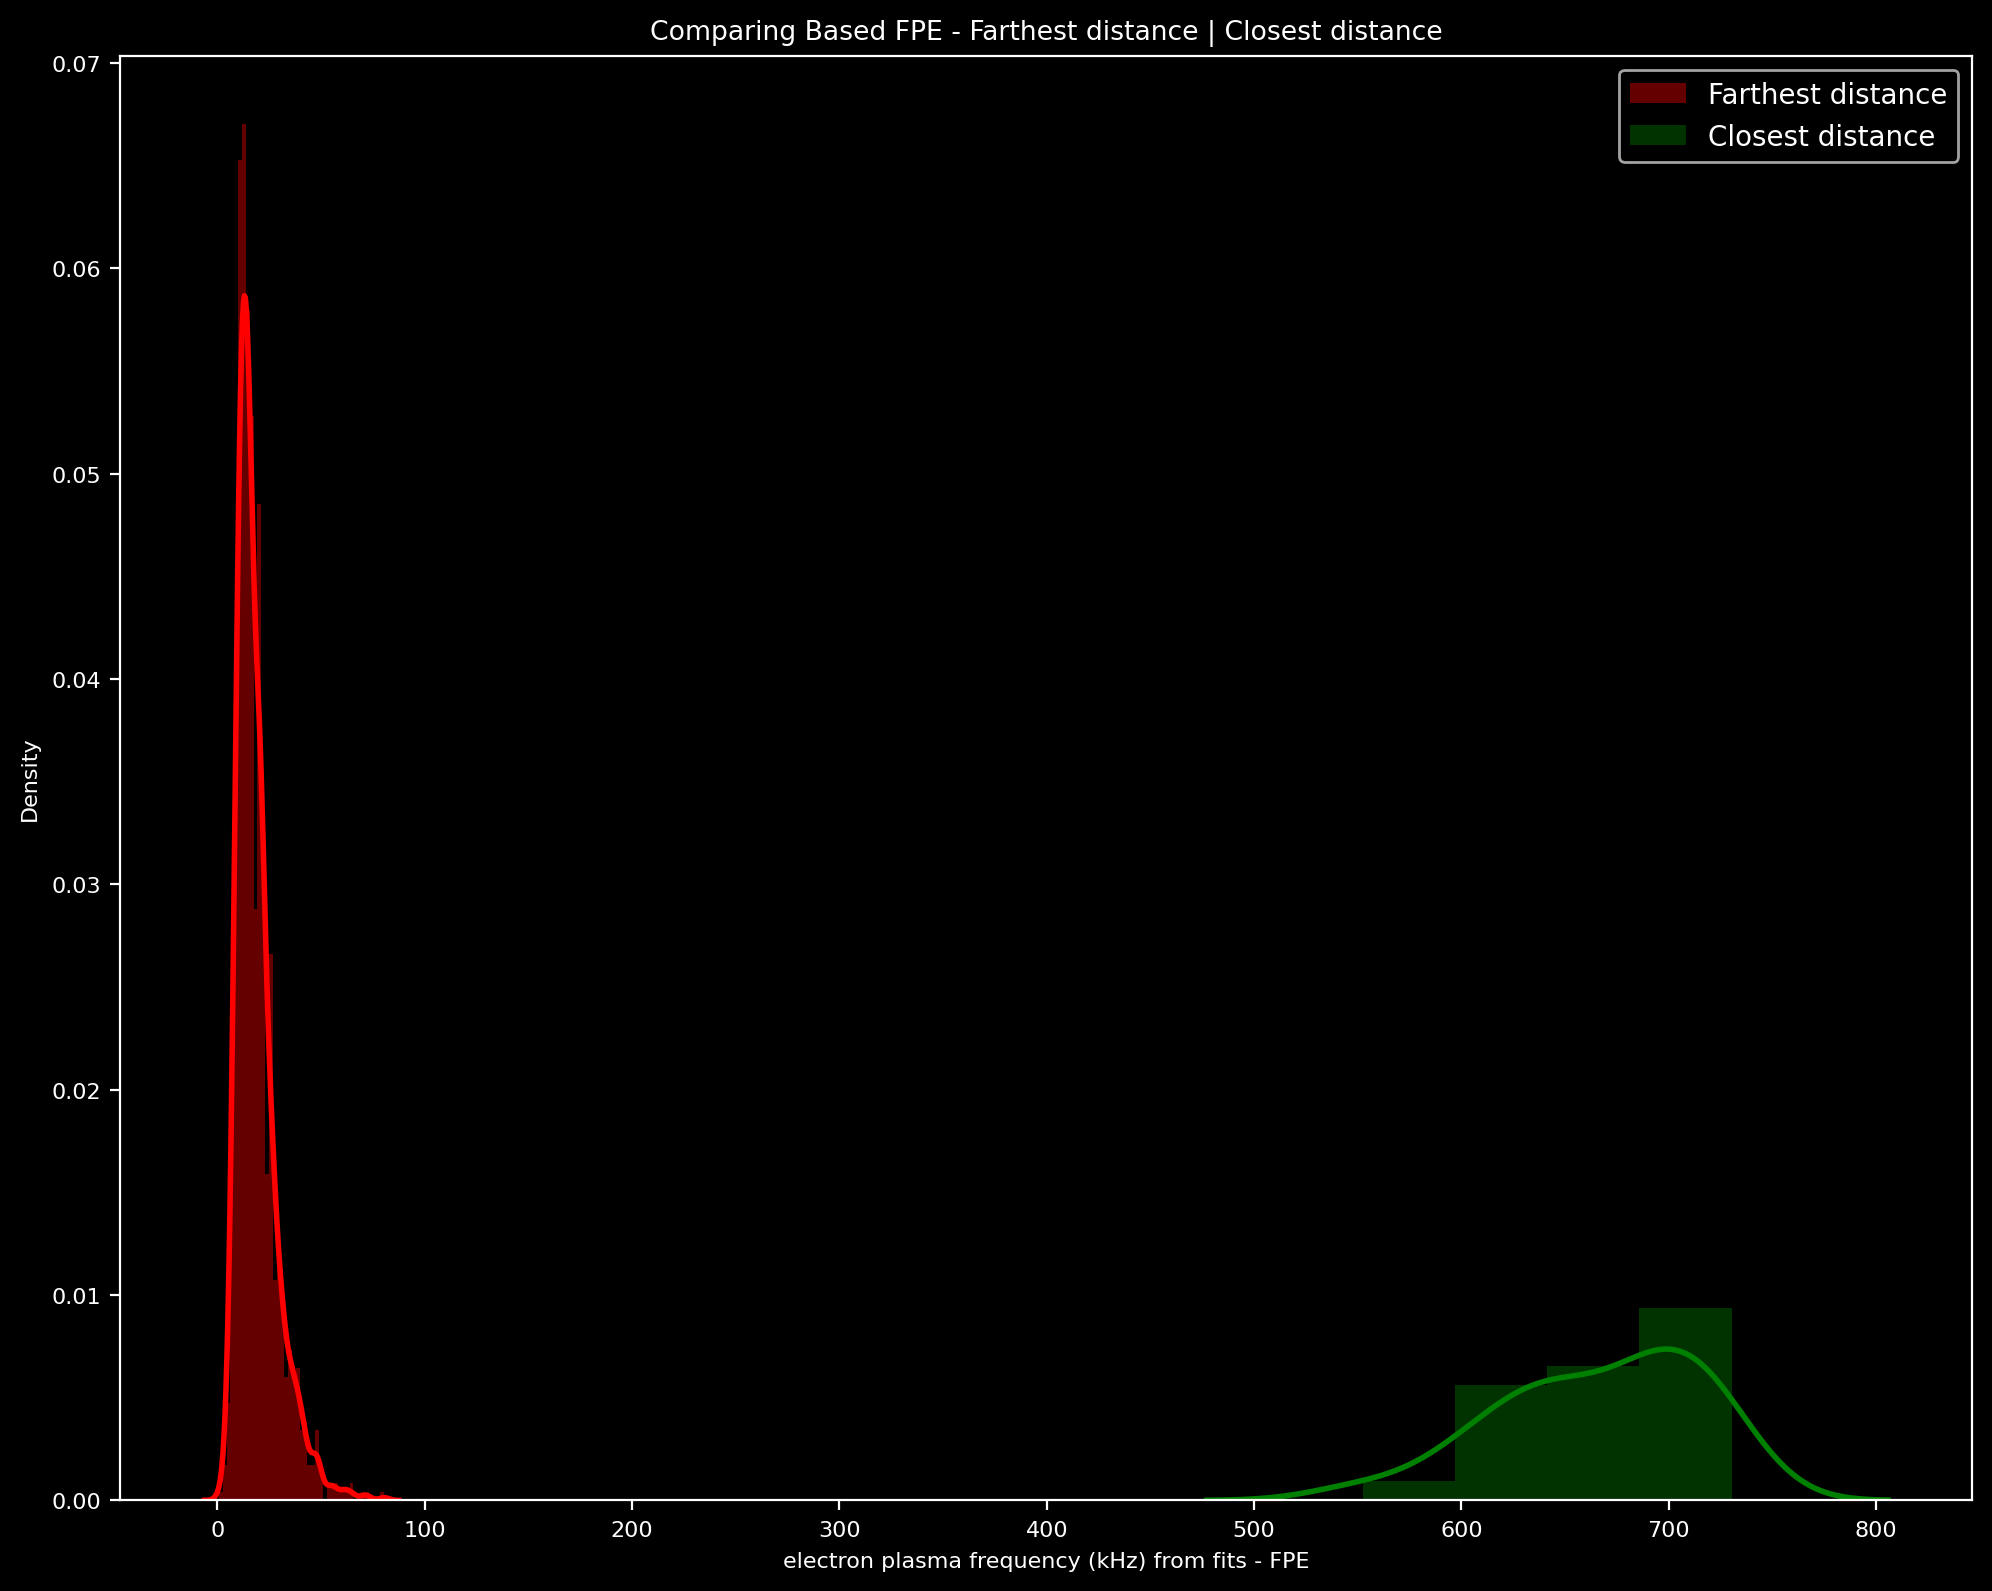

In [58]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Farthest distance",
                                               variable_two="Closest distance",
                                               target_frame="Distance_Label",
                                               target_value="FPE",
                                               expl="electron plasma frequency (kHz) from fits - FPE")

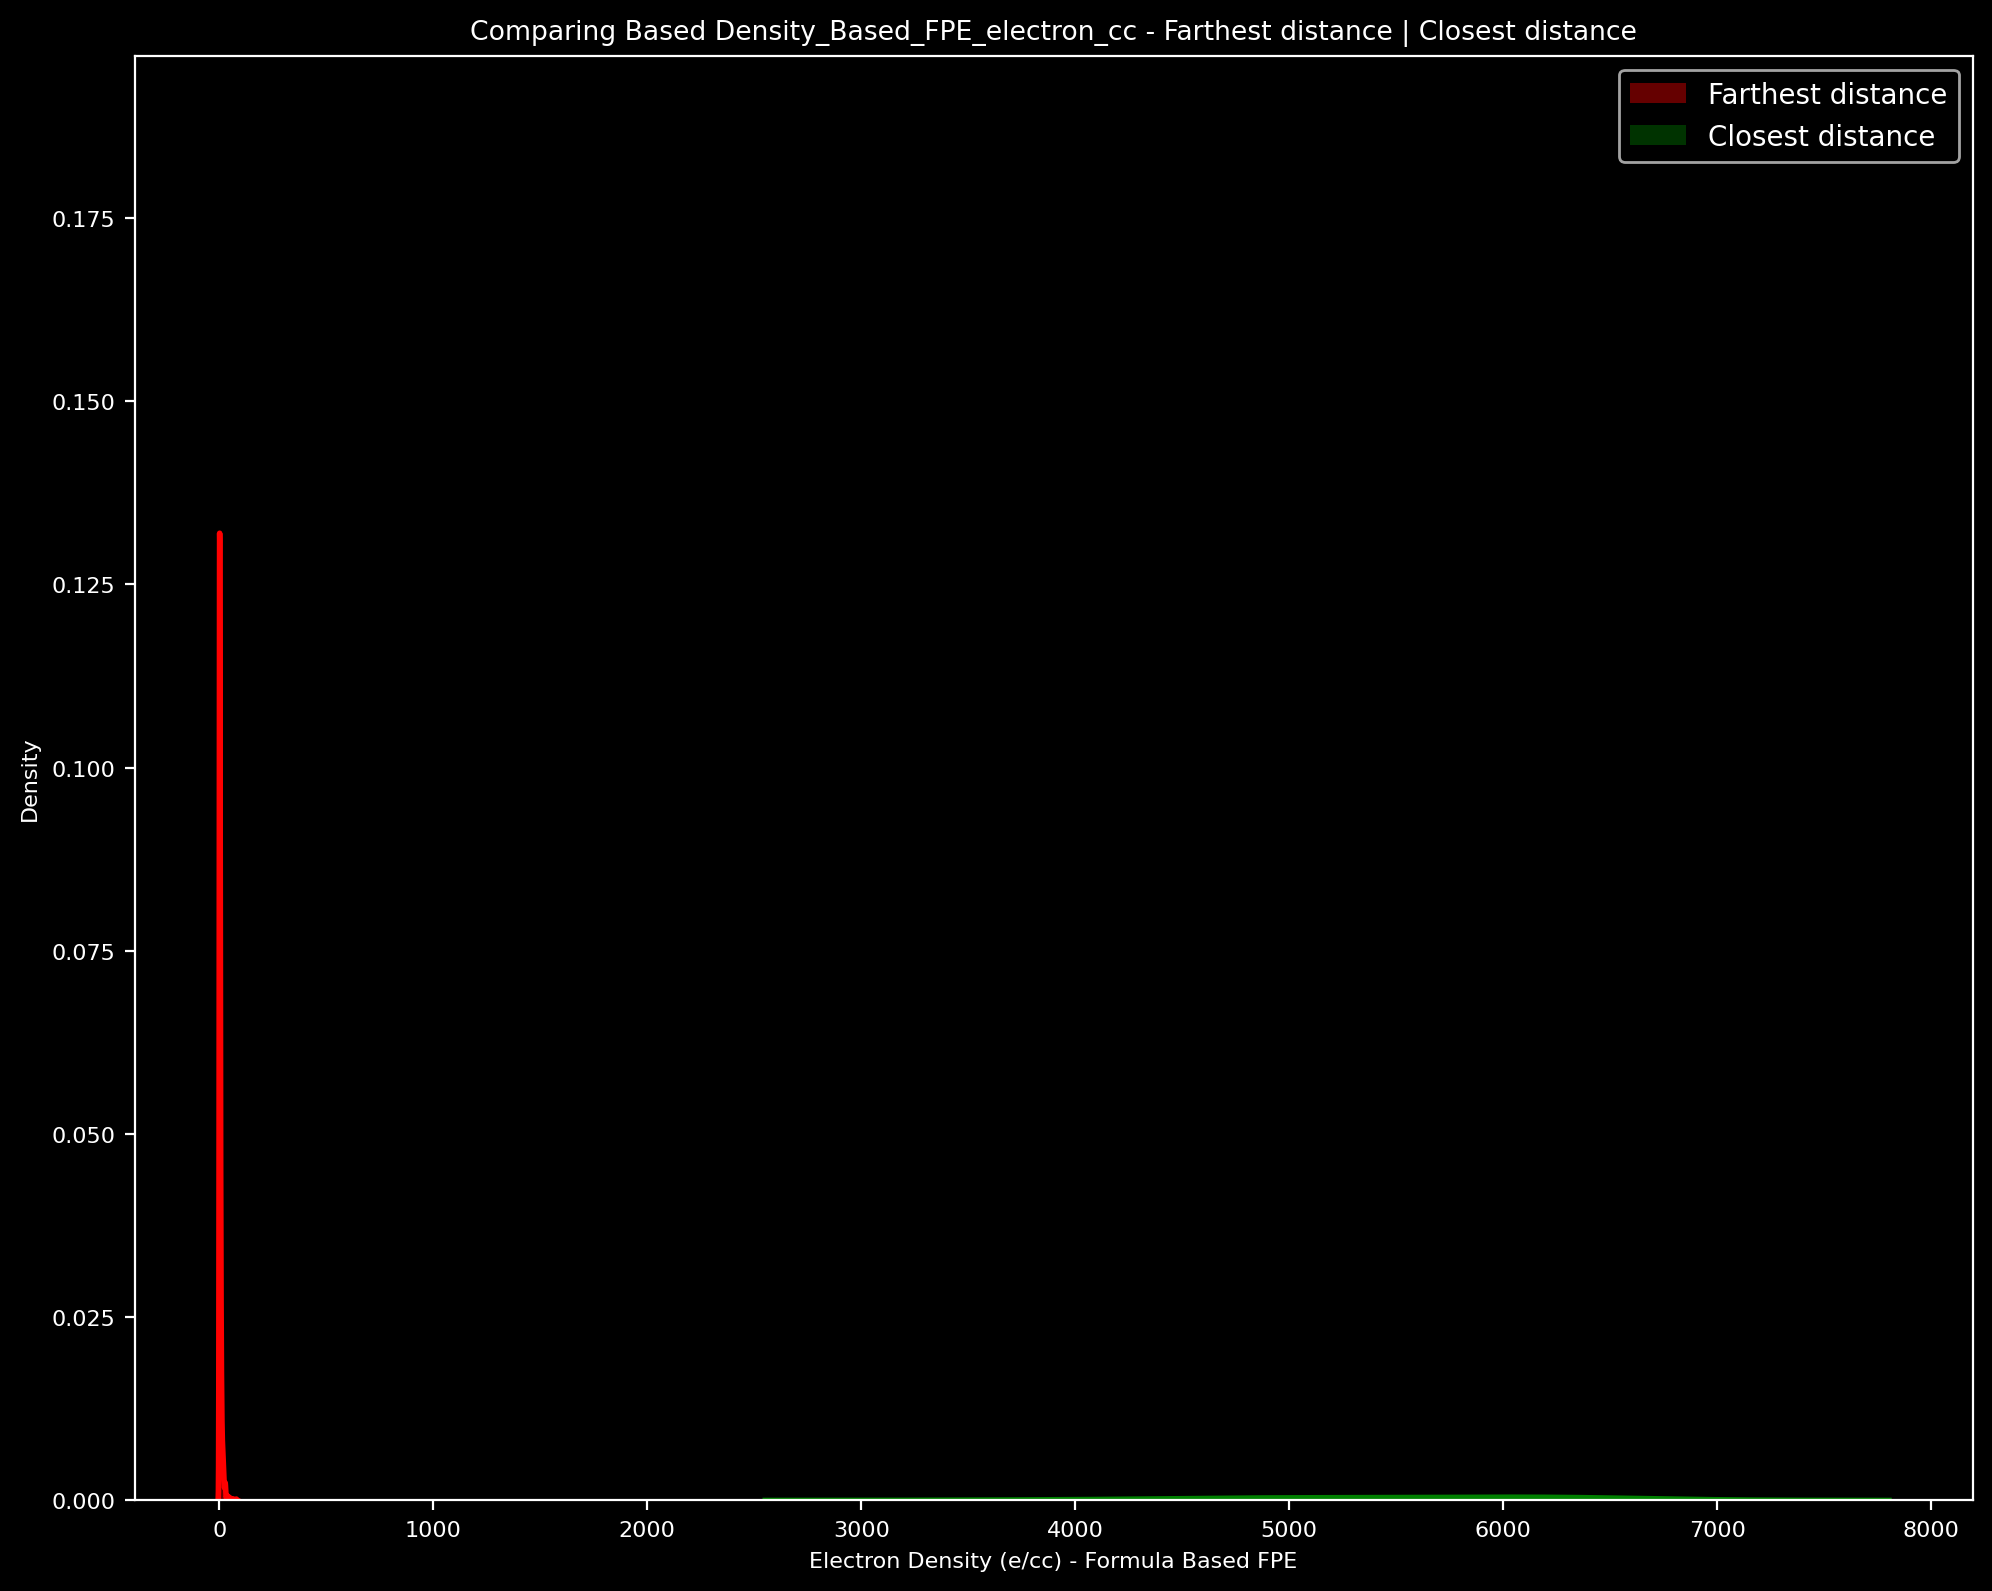

In [59]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Farthest distance",
                                               variable_two="Closest distance",
                                               target_frame="Distance_Label",
                                               target_value="Density_Based_FPE_electron_cc",
                                               expl="Electron Density (e/cc) - Formula Based FPE")

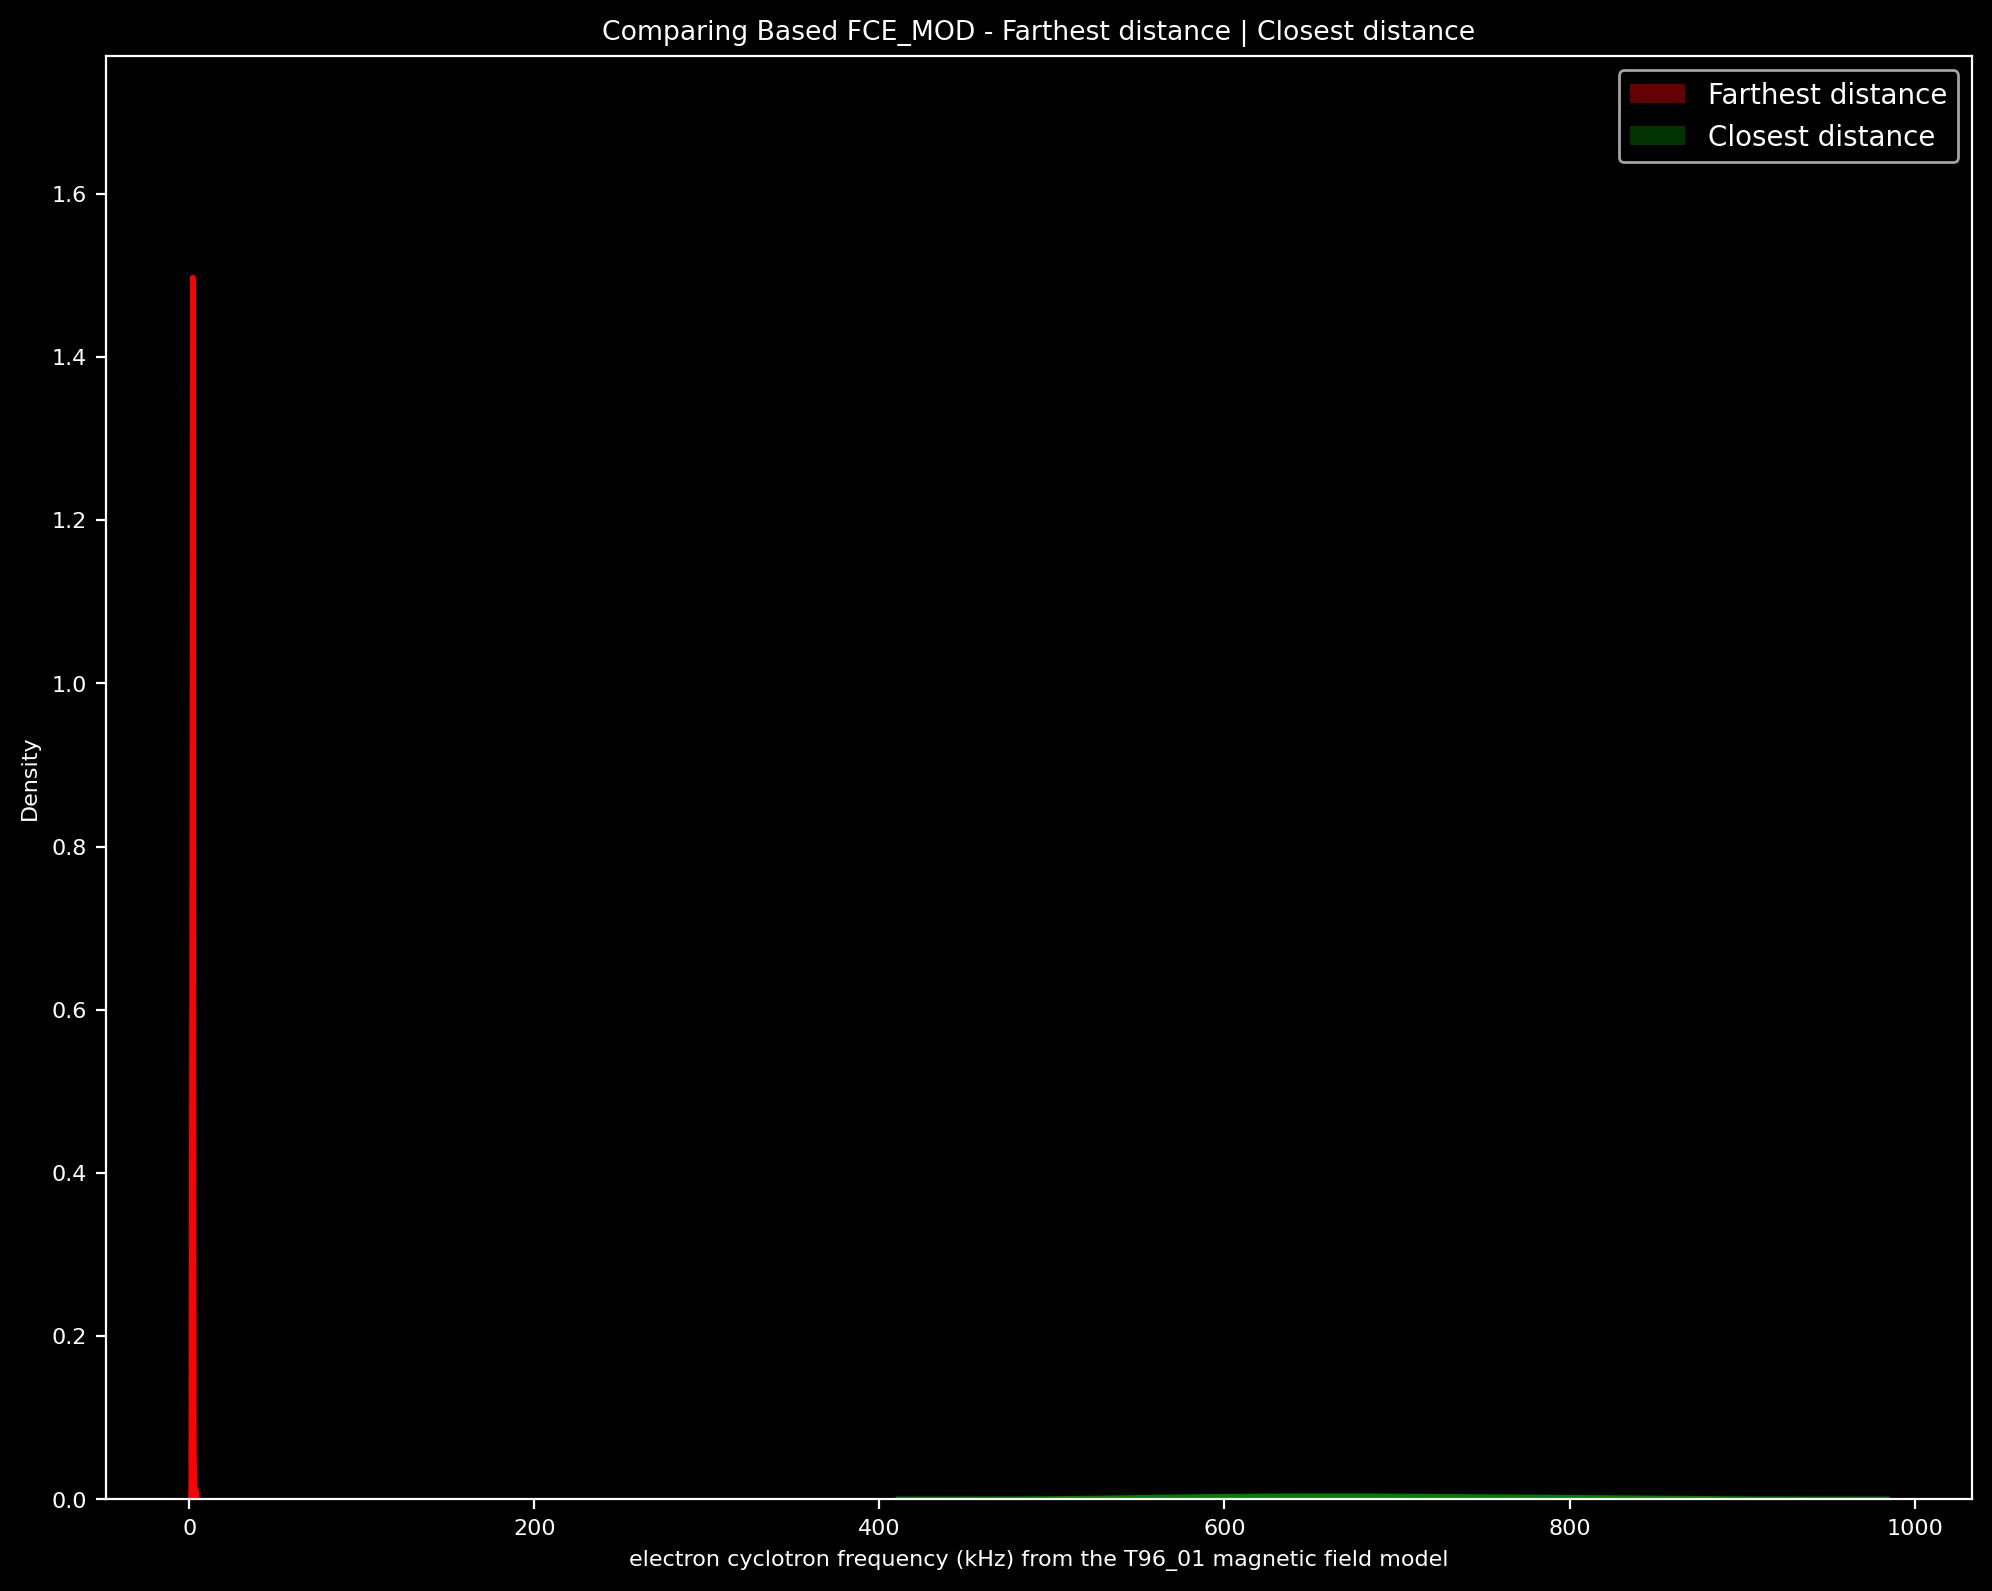

In [60]:
DataGeneralVisualization(dtframe).ShowDistplot(variable_one="Farthest distance",
                                               variable_two="Closest distance",
                                               target_frame="Distance_Label",
                                               target_value="FCE_MOD",
                                               expl="electron cyclotron frequency (kHz) from the T96_01 magnetic field model")

# Value Based - Visualization

In [61]:
class ValueBasedVisualization(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe
    self.plotpointsize = 3
    self.modeplot = "markers"
    self.template = "plotly_dark"
  def __str__(self)->str:
    return "Value Based Visualization - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return ValueBasedVisualization.__doc__
  def CreateSinglePlot(self,yline:str,unitname:str,xconstant:str)->PROCESS:
    s_ = go.Scatter(x=self.dt[str(xconstant)],
                    y=self.dt[str(yline)],
                    name=str(unitname),
                    mode=self.modeplot,
                    marker=dict(size=self.plotpointsize))
    return s_
  def ShowGraph(self,yvalues:list,xconstant:str,unitlist:list,plt_title:tuple or str,exp_title:str,hgt:int=420,wdt:int=1040)->PROCESS:
    fg_ = make_subplots(rows=1,cols=len(yvalues),subplot_titles=plt_title)
    assert len(yvalues) == len(unitlist)
    for c_,y_ in enumerate(yvalues):
      grph_ = self.CreateSinglePlot(yline=y_,
                                    xconstant=xconstant,
                                    unitname=unitlist[c_])
      fg_.add_trace(grph_,row=1,col=int(c_)+1)
    fg_.update_layout(height=hgt,
                      width=wdt,
                      title=str(exp_title).upper(),
                      template=self.template)
    fg_.show()

> We have turned these visualizations into comments to speed up the notebook's operation. If you want to see the visualized form of the data, please remove the comment tokens.

## FPE - FCE

In [62]:
yvallist = ["FPE","FCE_MOD"]
unitlist = ["kHz","kHz"]

In [63]:
#ValueBasedVisualization(dtframe).ShowGraph(yvalues=yvallist,
                                           #xconstant="Year",
                                           #unitlist=unitlist,
                                           #plt_title=("FPE","FCE"),
                                           #exp_title="FPE: electron plasma frequency | FCE: electron cyclotron frequency")

## Distance - Year - Cloud Density

In [64]:
yvallist = ["Radial_Distance","Density_Based_FPE_electron_cc"]
unitlist = ["Re","e/cc"]

In [65]:
#ValueBasedVisualization(dtframe).ShowGraph(yvalues=yvallist,
                                           #xconstant="Year",
                                           #unitlist=unitlist,
                                           #plt_title=("Radial Distance","Cloud Density"),
                                           #exp_title="Radial Distance:Re | Density: e/cc")

In [66]:
yvallist = ["Year","Density_Based_FPE_electron_cc"]
unitlist = ["Date","e/cc"]

In [67]:
#ValueBasedVisualization(dtframe).ShowGraph(yvalues=yvallist,
                                           #xconstant="Radial_Distance",
                                           #unitlist=unitlist,
                                           #plt_title=("Radial Distance","Cloud Density"),
                                           #exp_title="Radial Distance:Re | Density: e/cc")

## FPE - Distance - Cloud Density

In [68]:
yvallist = ["FPE","Density_Based_FPE_electron_cc"]
unitlist = ["kHz","e/cc"]

In [69]:
#ValueBasedVisualization(dtframe).ShowGraph(yvalues=yvallist,
                                           #xconstant="Radial_Distance_KM",
                                           #unitlist=unitlist,
                                           #plt_title=("FPE","Cloud Density"),
                                           #exp_title="Radial Distance:Re | Density: e/cc")

# Polar Based - Visualization

In [70]:
class PolarBasedVisualization(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe
    self.cmapinitial = "hot"
    self.alphavalue = 0.65
    self.isPolar = True
  def __str__(self)->str:
    return "Polar Based Visualization - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return PolarBasedVisualization.__doc__
  def ConvertAttribute(self,var_one:str,var_two:str,var_three:str)->PROCESS:
    v1 = np.array(self.dt[str(var_one)].values)
    v2 = np.array(self.dt[str(var_two)].values)
    v3 = np.array(self.dt[str(var_three)].values)
    return v1,v2,v3
  def ConvertToRadian(self,array_data:list or DATA)->PROCESS:
    rad_ = (array_data/24)*2*np.pi
    return rad_
  def DefineTheta(self,array_data:list or DATA)->PROCESS:
    th_ = (90-array_data)*(np.pi/180)
    return th_
  def ShowGraphMLATMLT(self)->PROCESS:
    distance_,mlat_,mlt_ = self.ConvertAttribute("Radial_Distance","MLAT","MLT")
    rad_ = self.ConvertToRadian(mlt_)
    the_ = self.DefineTheta(mlat_)
    fg_ = plt.figure()
    a_ = fg_.add_subplot(111,polar=self.isPolar)
    s_ = a_.scatter(rad_,distance_,c=the_,cmap=self.cmapinitial,alpha=self.alphavalue)
    plt.colorbar(s_,label="magnetic latitude")
    a_.set_ylim(0,10)
    a_.set_theta_zero_location("S")
    plt.title("Magnetic latitude & local time - Distance")
    plt.tight_layout()
    plt.show()
  def ShowGraphDensity(self,isFCE:bool=True)->PROCESS:
    mlat_grid,mlt_grid = np.mgrid[-90:90:180j,0:24:24j]
    distance_,mlat_,mlt_ = self.ConvertAttribute("Radial_Distance","MLAT","MLT")
    if isFCE:
      density_ = np.array(self.dt["Density_Based_FCE_electron_cc"])
      title_ = "Plasma Cloud Density - FCE"
    else:
      density_ = np.array(self.dt["Density_Based_FPE_electron_cc"])
      title_ = "Plasma Cloud Density - FPE"
    rad_ = self.ConvertToRadian(mlt_)
    x_ = distance_*np.cos(rad_)*np.cos(np.deg2rad(mlat_))
    y_ = distance_*np.sin(rad_)*np.cos(np.deg2rad(mlat_))
    density_hist,x_edge,y_edge = np.histogram2d(x_,
                                                y_,
                                                bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],
                                                weights=density_)
    plt.figure()
    plt.imshow(density_hist.T,
               extent=[-2,2,-2,2],
               origin="lower",
               cmap=self.cmapinitial,
               interpolation="bilinear")
    plt.colorbar(label="Plasma Cloud - Density (electron/cc)")
    plt.scatter(0,0,color="b",label="Earth")
    plt.xlabel("X-coor (Re)")
    plt.ylabel("Y-coor (Re)")
    plt.title(title_)
    plt.legend()
    plt.show()

## MLAT - MLT - Distance

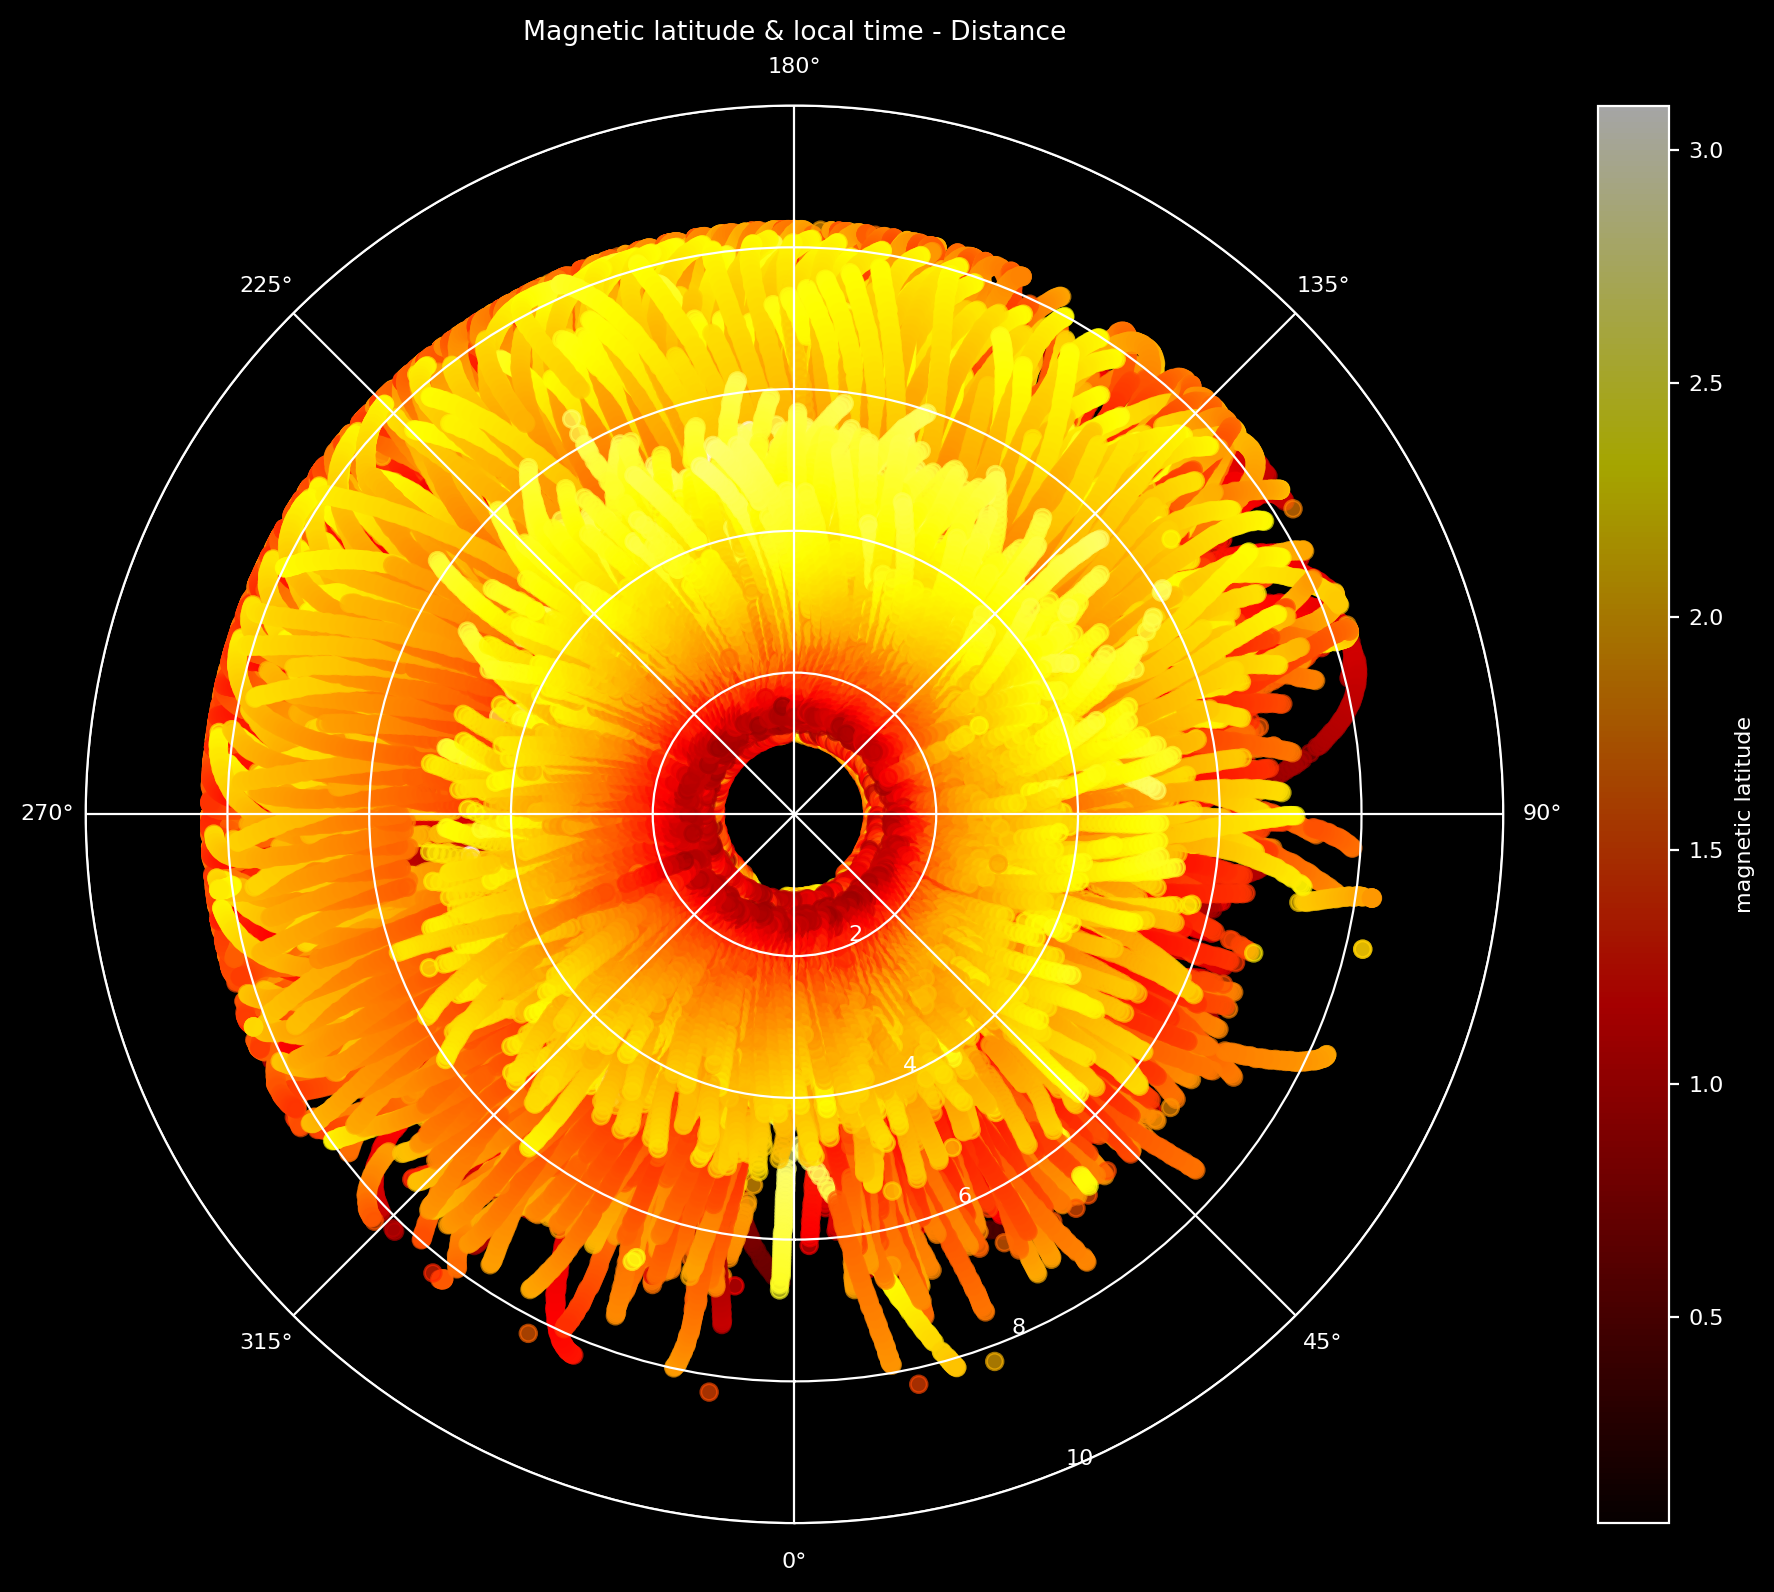

In [71]:
PolarBasedVisualization(dtframe).ShowGraphMLATMLT()

## Cloud Density

### FCE

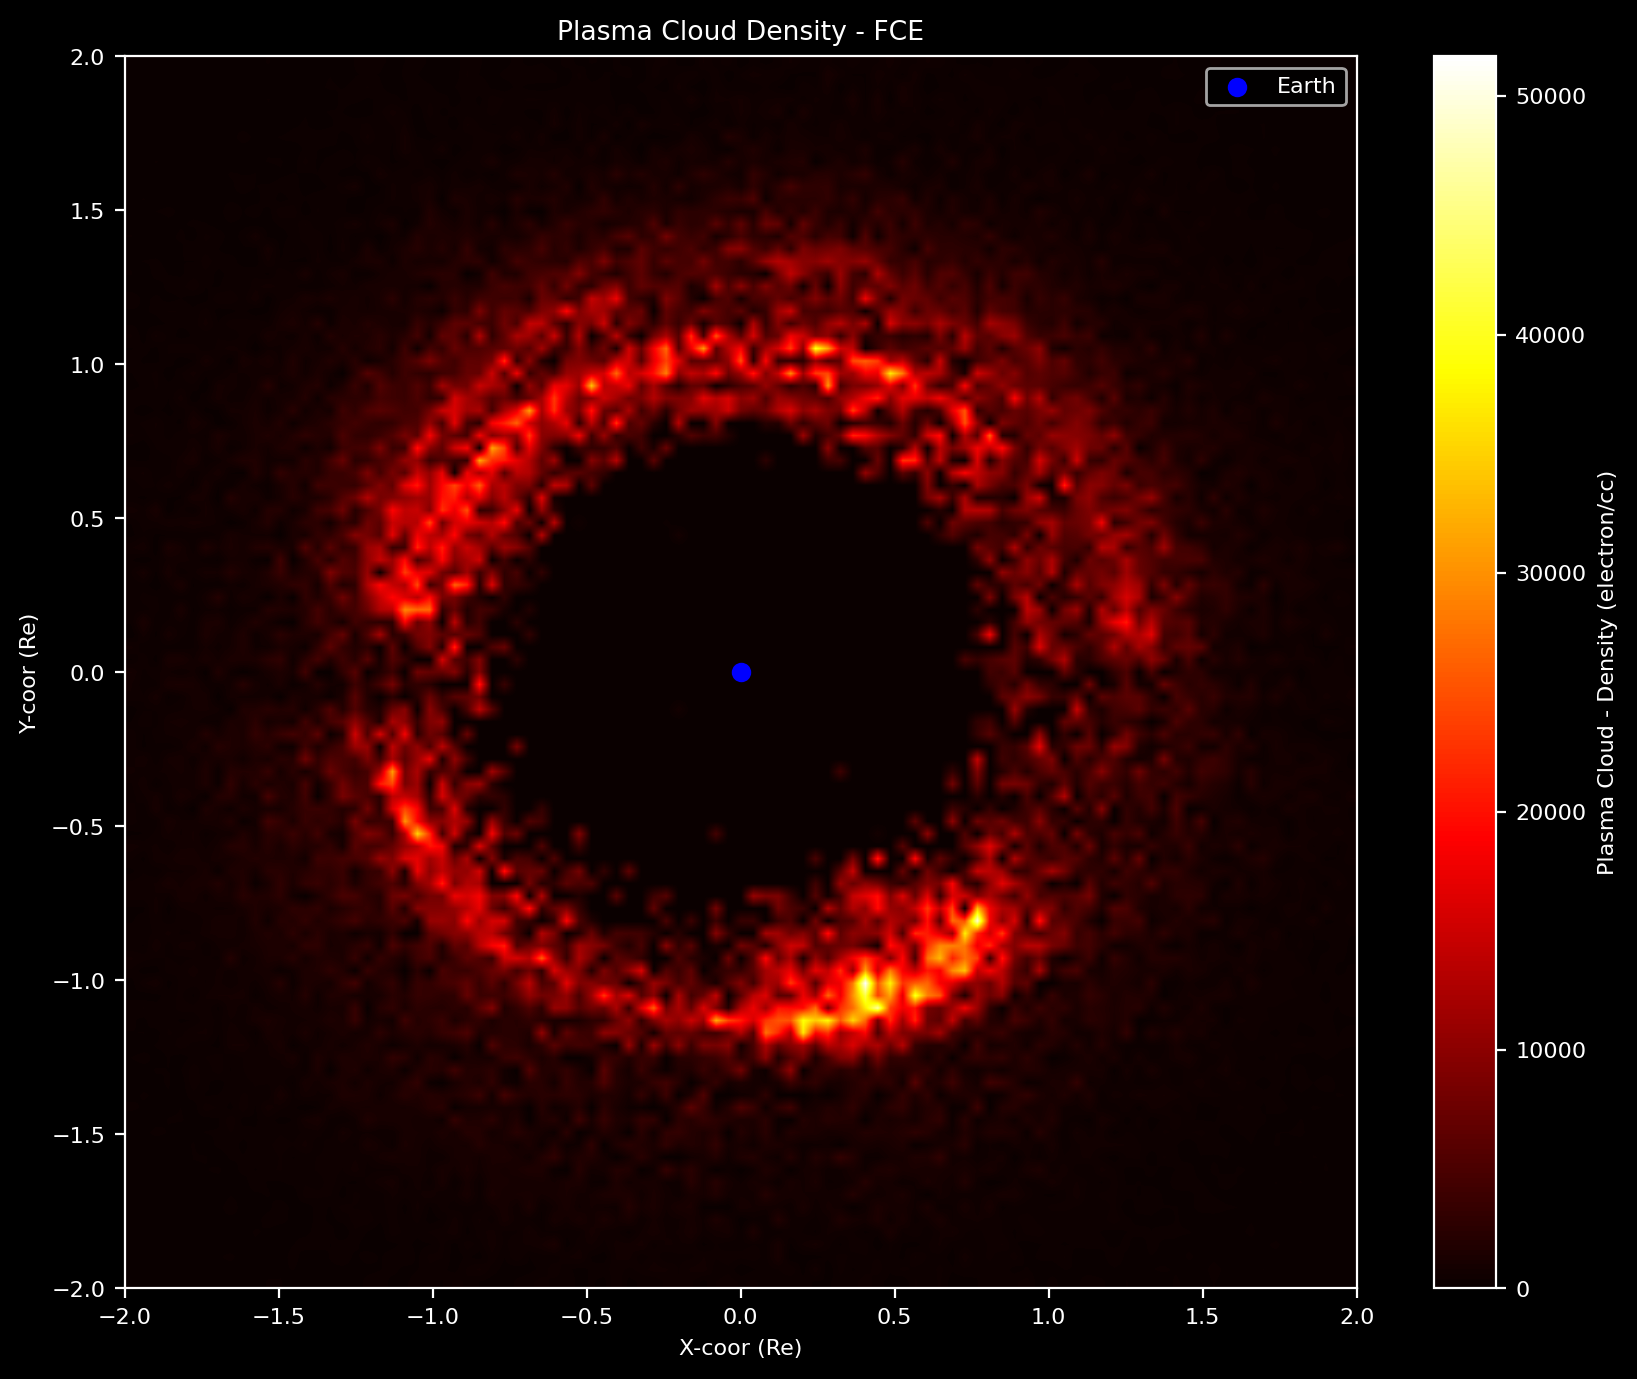

In [72]:
PolarBasedVisualization(dtframe).ShowGraphDensity(isFCE=True)

### FPE

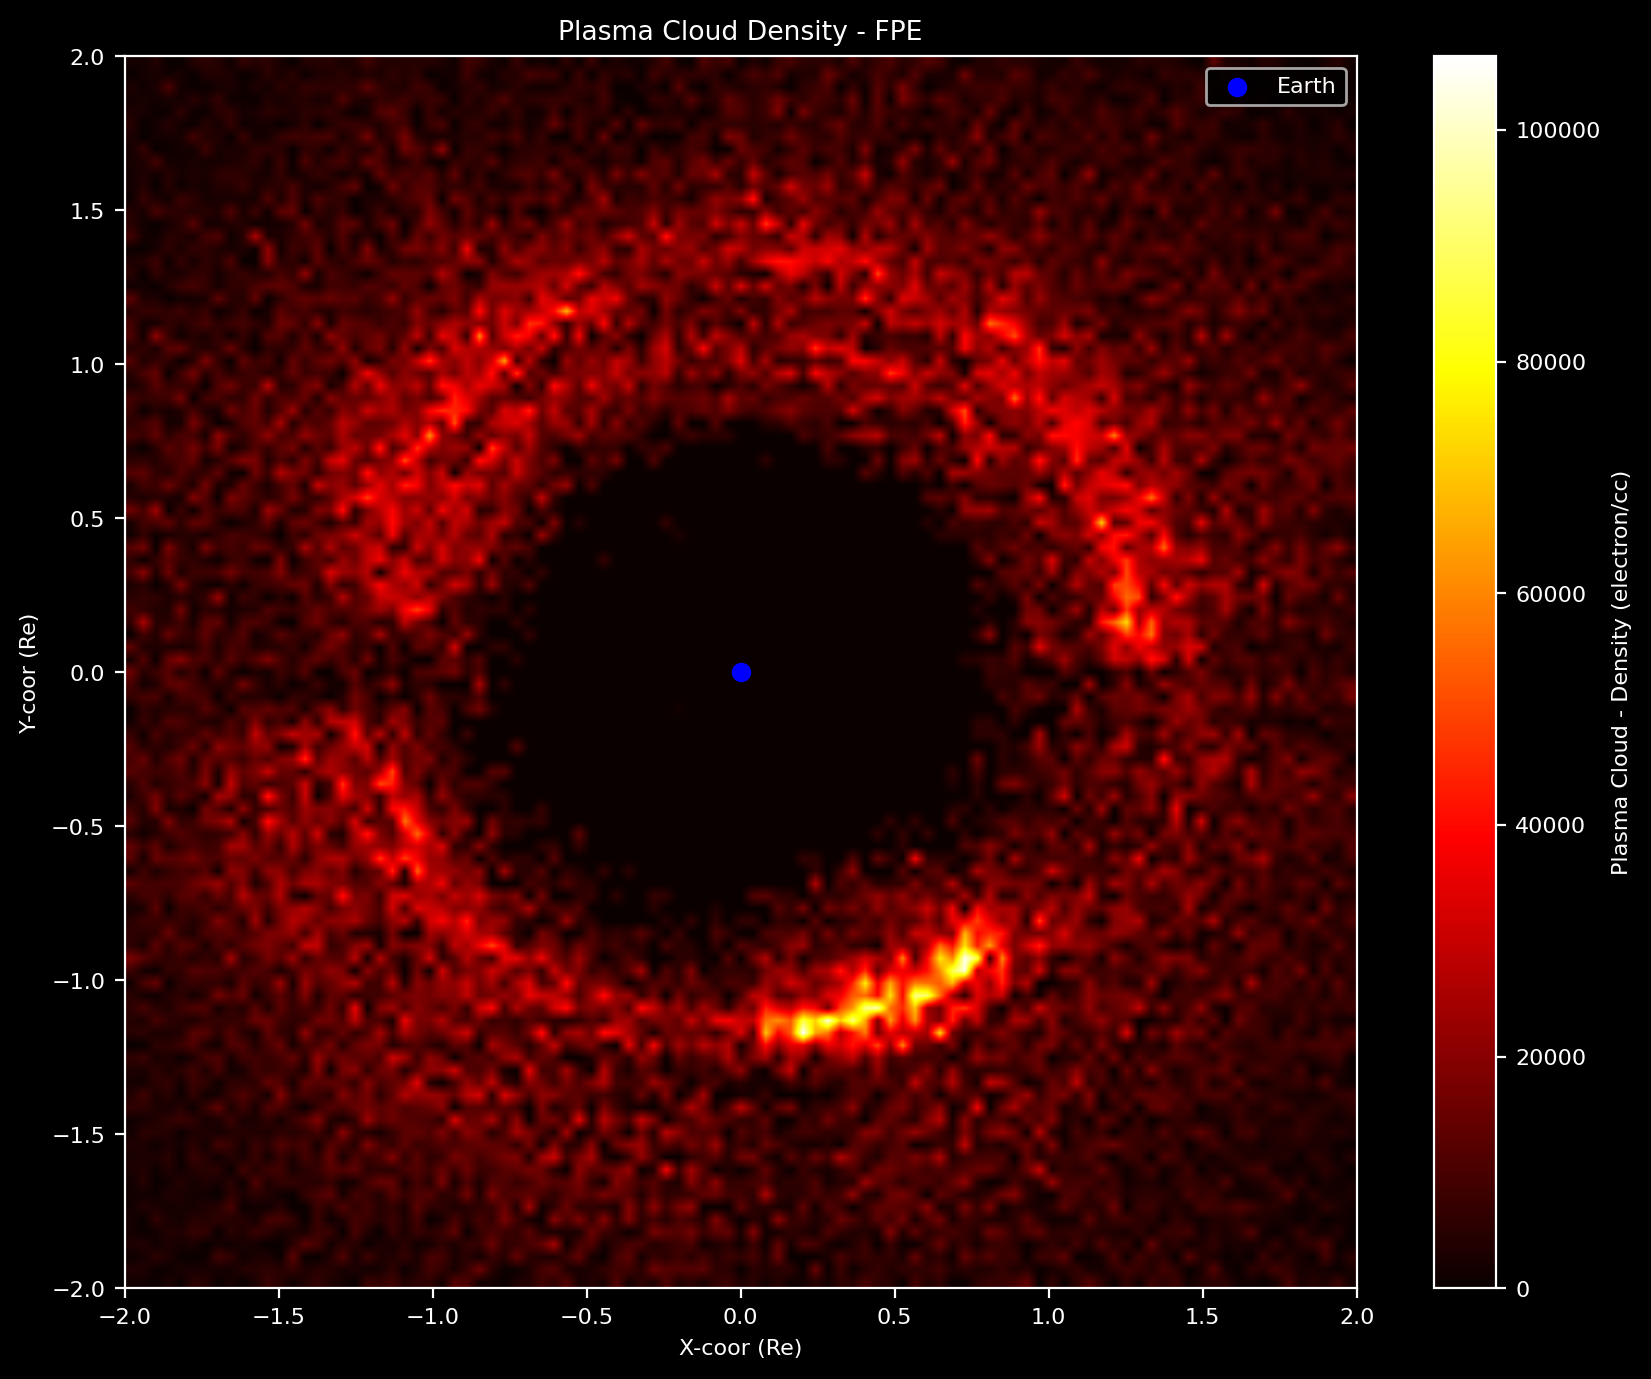

In [73]:
PolarBasedVisualization(dtframe).ShowGraphDensity(isFCE=False)

# Date-Based Visualization

## Data Preparing

In [74]:
def CreateYearData(mainframe:DATA=dtframe)->PROCESS:
  years_ = set(list(mainframe["Year"].values))
  for y_ in years_:
    globals()[f"dt_{str(y_)}"] = mainframe[mainframe["Year"]==int(y_)].reset_index(drop=True)
  print("[DONE] - Data Creating [PROCESS]")

In [75]:
CreateYearData()

[DONE] - Data Creating [PROCESS]


## Visualization

### Directory

In [76]:
createDirectory("imagefolder")

### Functions

In [77]:
def ConvertAttribute(yeardata:DATA,var_one:str,var_two:str,var_three:str)->RESULT:
  v1 = np.array(yeardata[str(var_one)].values)
  v2 = np.array(yeardata[str(var_two)].values)
  v3 = np.array(yeardata[str(var_three)].values)
  return v1,v2,v3

In [78]:
def ConvertToRadian(array_data:DATA)->RESULT:
  rad_ = (array_data/24)*2*np.pi
  return rad_

In [79]:
def SingleHeat(yeardata:DATA,yeardataname:str,isFCE:bool=True)->PROCESS:
  date_range = range(yeardata["Day_of_year"].min(),yeardata["Day_of_year"].max()+1)
  mlat_grid,mlt_grid = np.mgrid[-90:90:180j,0:24:24j]
  for day_ in date_range:
    pth_ = f"/content/imagefolder/{yeardataname}_day_{str(day_)}.jpg"
    date_based_data = yeardata[yeardata["Day_of_year"] == int(day_)].reset_index(drop=True)
    distance_,mlat_,mlt_ = ConvertAttribute(date_based_data,"Radial_Distance","MLAT","MLT")
    if isFCE:
      density_ = np.array(date_based_data["Density_Based_FCE_electron_cc"])
      title_ = f"Plasma Cloud Density - FCE - Day: {str(day_)}"
    else:
      density_ = np.array(date_based_data["Density_Based_FPE_electron_cc"])
      title_ = f"Plasma Cloud Density - FPE - Day: {str(day_)}"
    rad_ = ConvertToRadian(mlt_)
    x_ = distance_*np.cos(rad_)*np.cos(np.deg2rad(mlat_))
    y_ = distance_*np.sin(rad_)*np.cos(np.deg2rad(mlat_))
    density_hist,x_edge,y_edge = np.histogram2d(x_,
                                                y_,
                                                bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],
                                                weights=density_)
    fig_ = plt.figure()
    plt.imshow(density_hist.T,
              extent=[-2,2,-2,2],
              origin="lower",
              cmap="hot",
              interpolation="bilinear")
    plt.colorbar(label="Plasma Cloud - Density (electron/cc)")
    plt.scatter(0,0,color="b",label="Earth")
    plt.xlabel("X-coor (Re)")
    plt.ylabel("Y-coor (Re)")
    plt.title(title_)
    plt.legend()
    plt.savefig(pth_)
    plt.close(fig_)
    print(f"[SAVED] - FILE: DAY {str(day_)}")

### Graph-Video Process - Year: 2001 / Example

In [80]:
%%capture
SingleHeat(dt_2001,"2001",isFCE=True)

In [81]:
def ReadImageForAnimation(image_source:list or DATA)->PROCESS:
  fig_ = plt.figure()
  img_ = []
  for i_ in image_source:
    rdi_ = plt.imread(i_)
    rd_ = plt.imshow(rdi_,animated=True,cmap="hot")
    plt.axis("off")
    img_.append([rd_])
  anm_ = anim.ArtistAnimation(fig_,img_,interval=120,repeat_delay=9000)
  plt.close()
  return anm_

In [82]:
paths_ = os.listdir("/content/imagefolder")

In [83]:
sources_ = [os.path.join("/content/imagefolder",xpath_) for xpath_ in paths_]

In [84]:
sorted_list = sorted(sources_,key=sortedList)

In [85]:
animationres_ = ReadImageForAnimation(sorted_list)

> Please remove the comment token to view the sequential arrangement of the recorded observations.

In [ ]:
#HTML(animationres_.to_html5_video())

# Comparing - Years

In [87]:
date_list = [dt_2001,dt_2002,dt_2003,dt_2004,dt_2005]

## FCE-Hour

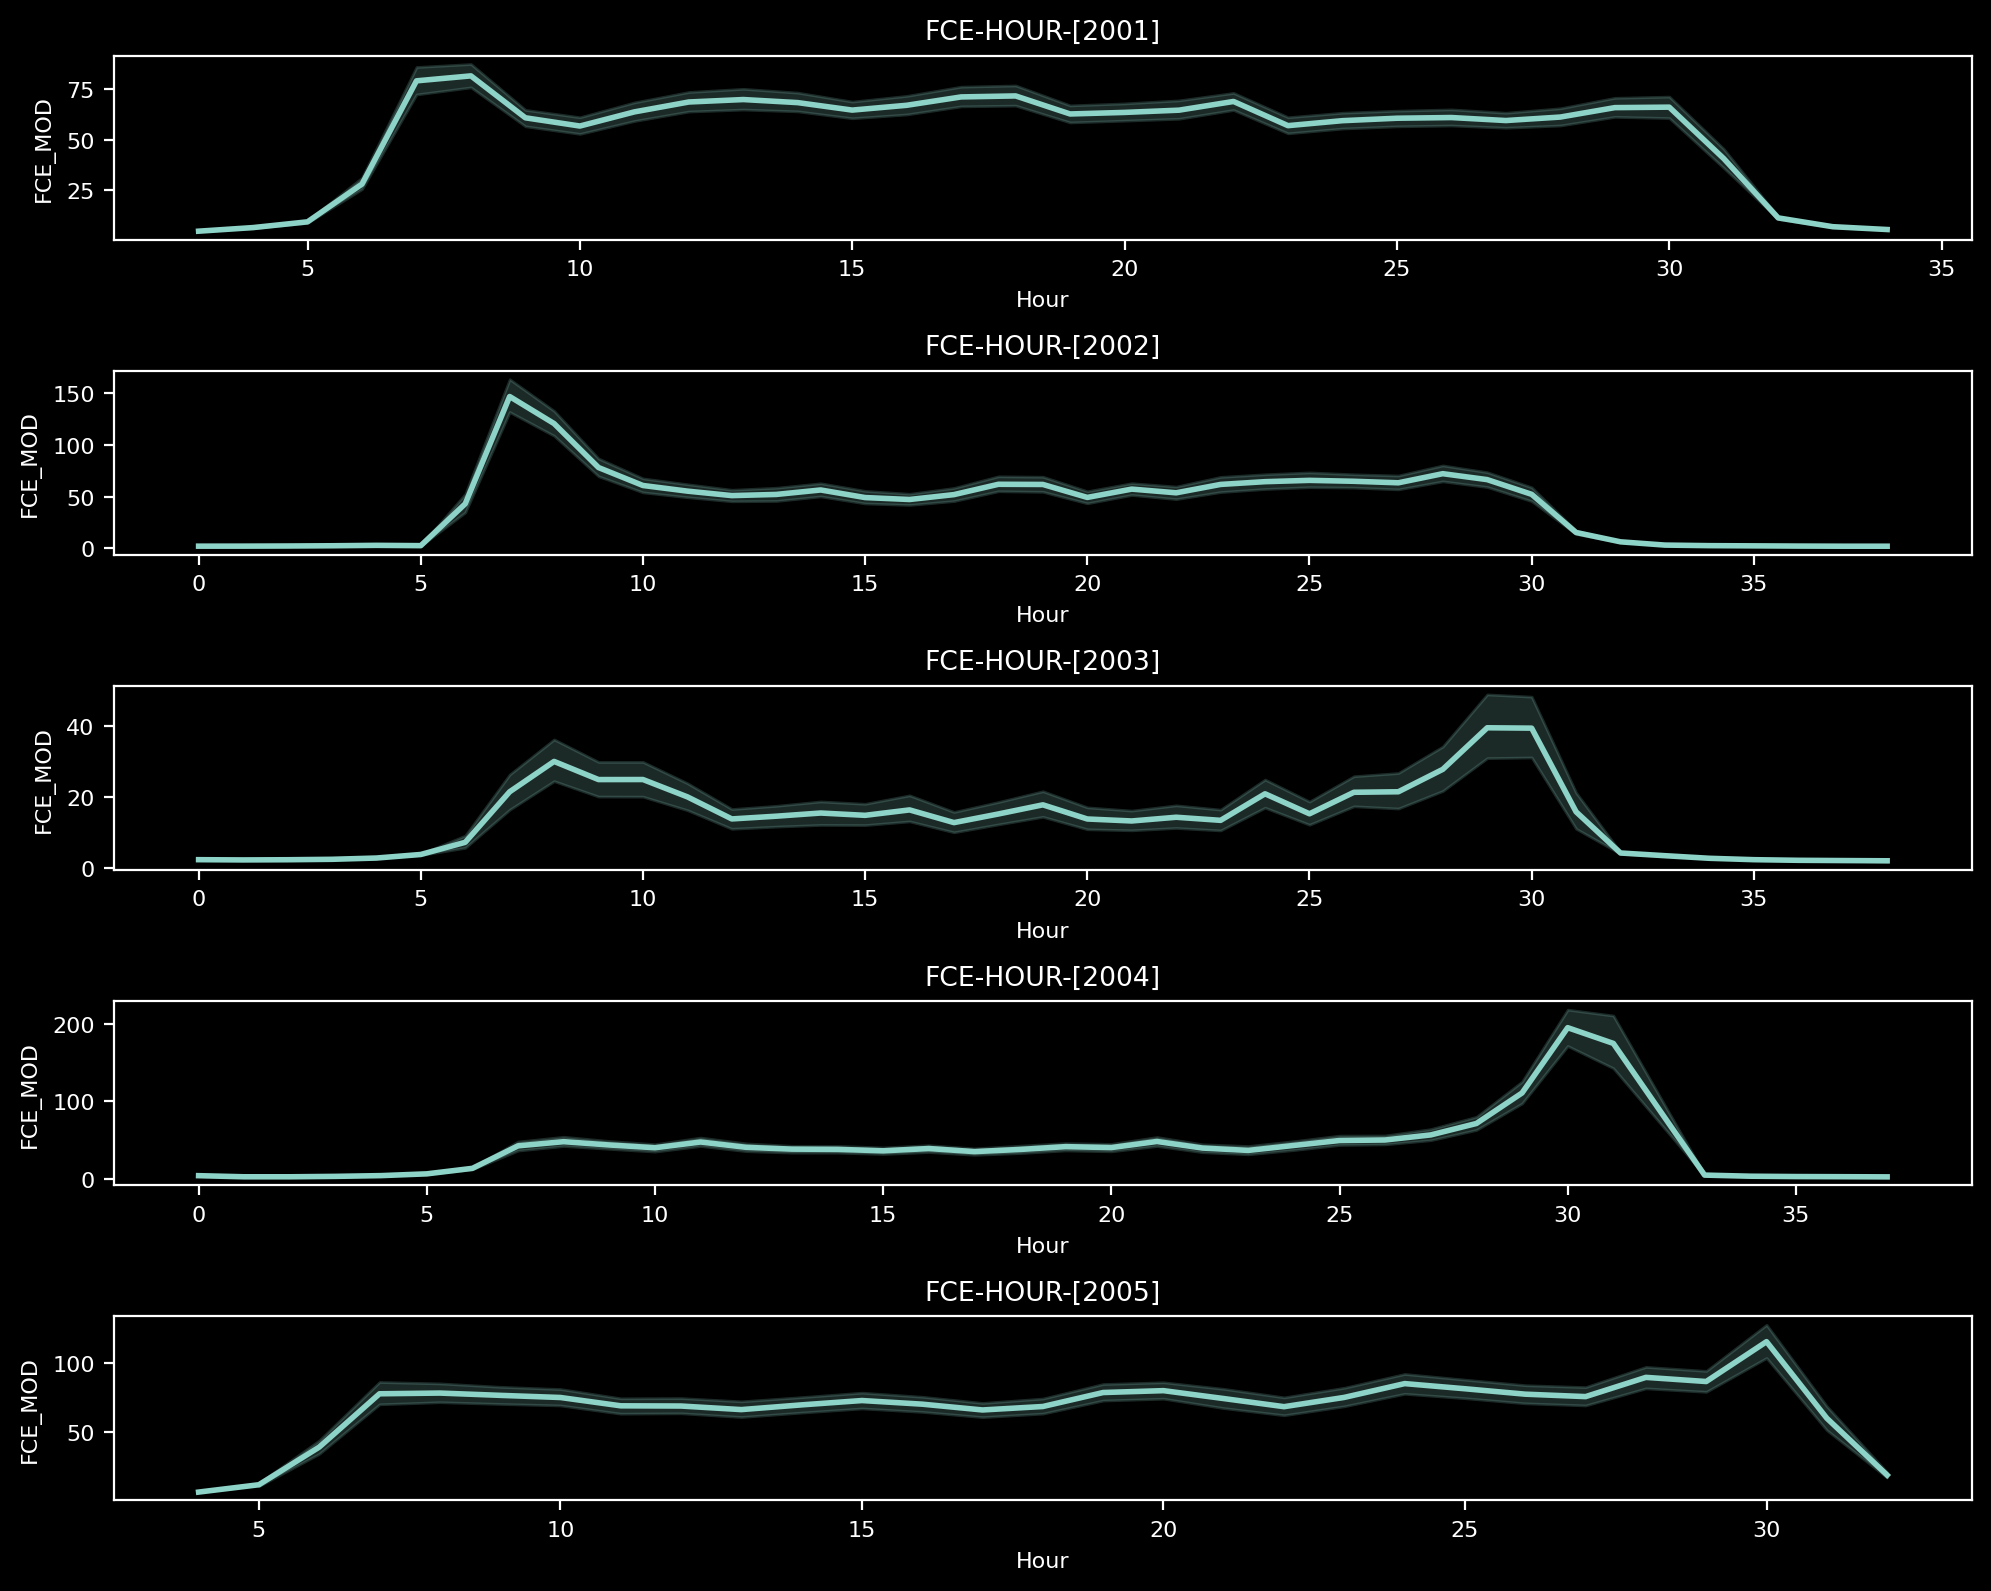

In [88]:
fig_ = plt.figure()
for a_,i_ in enumerate(date_list):
  plt.subplot(5,1,a_+1)
  plt.title(f"FCE-HOUR-[200{a_+1}]")
  sns.lineplot(x=i_["Hour"],
               y=i_["FCE_MOD"])
plt.tight_layout()
plt.show()

## FCE-Distance

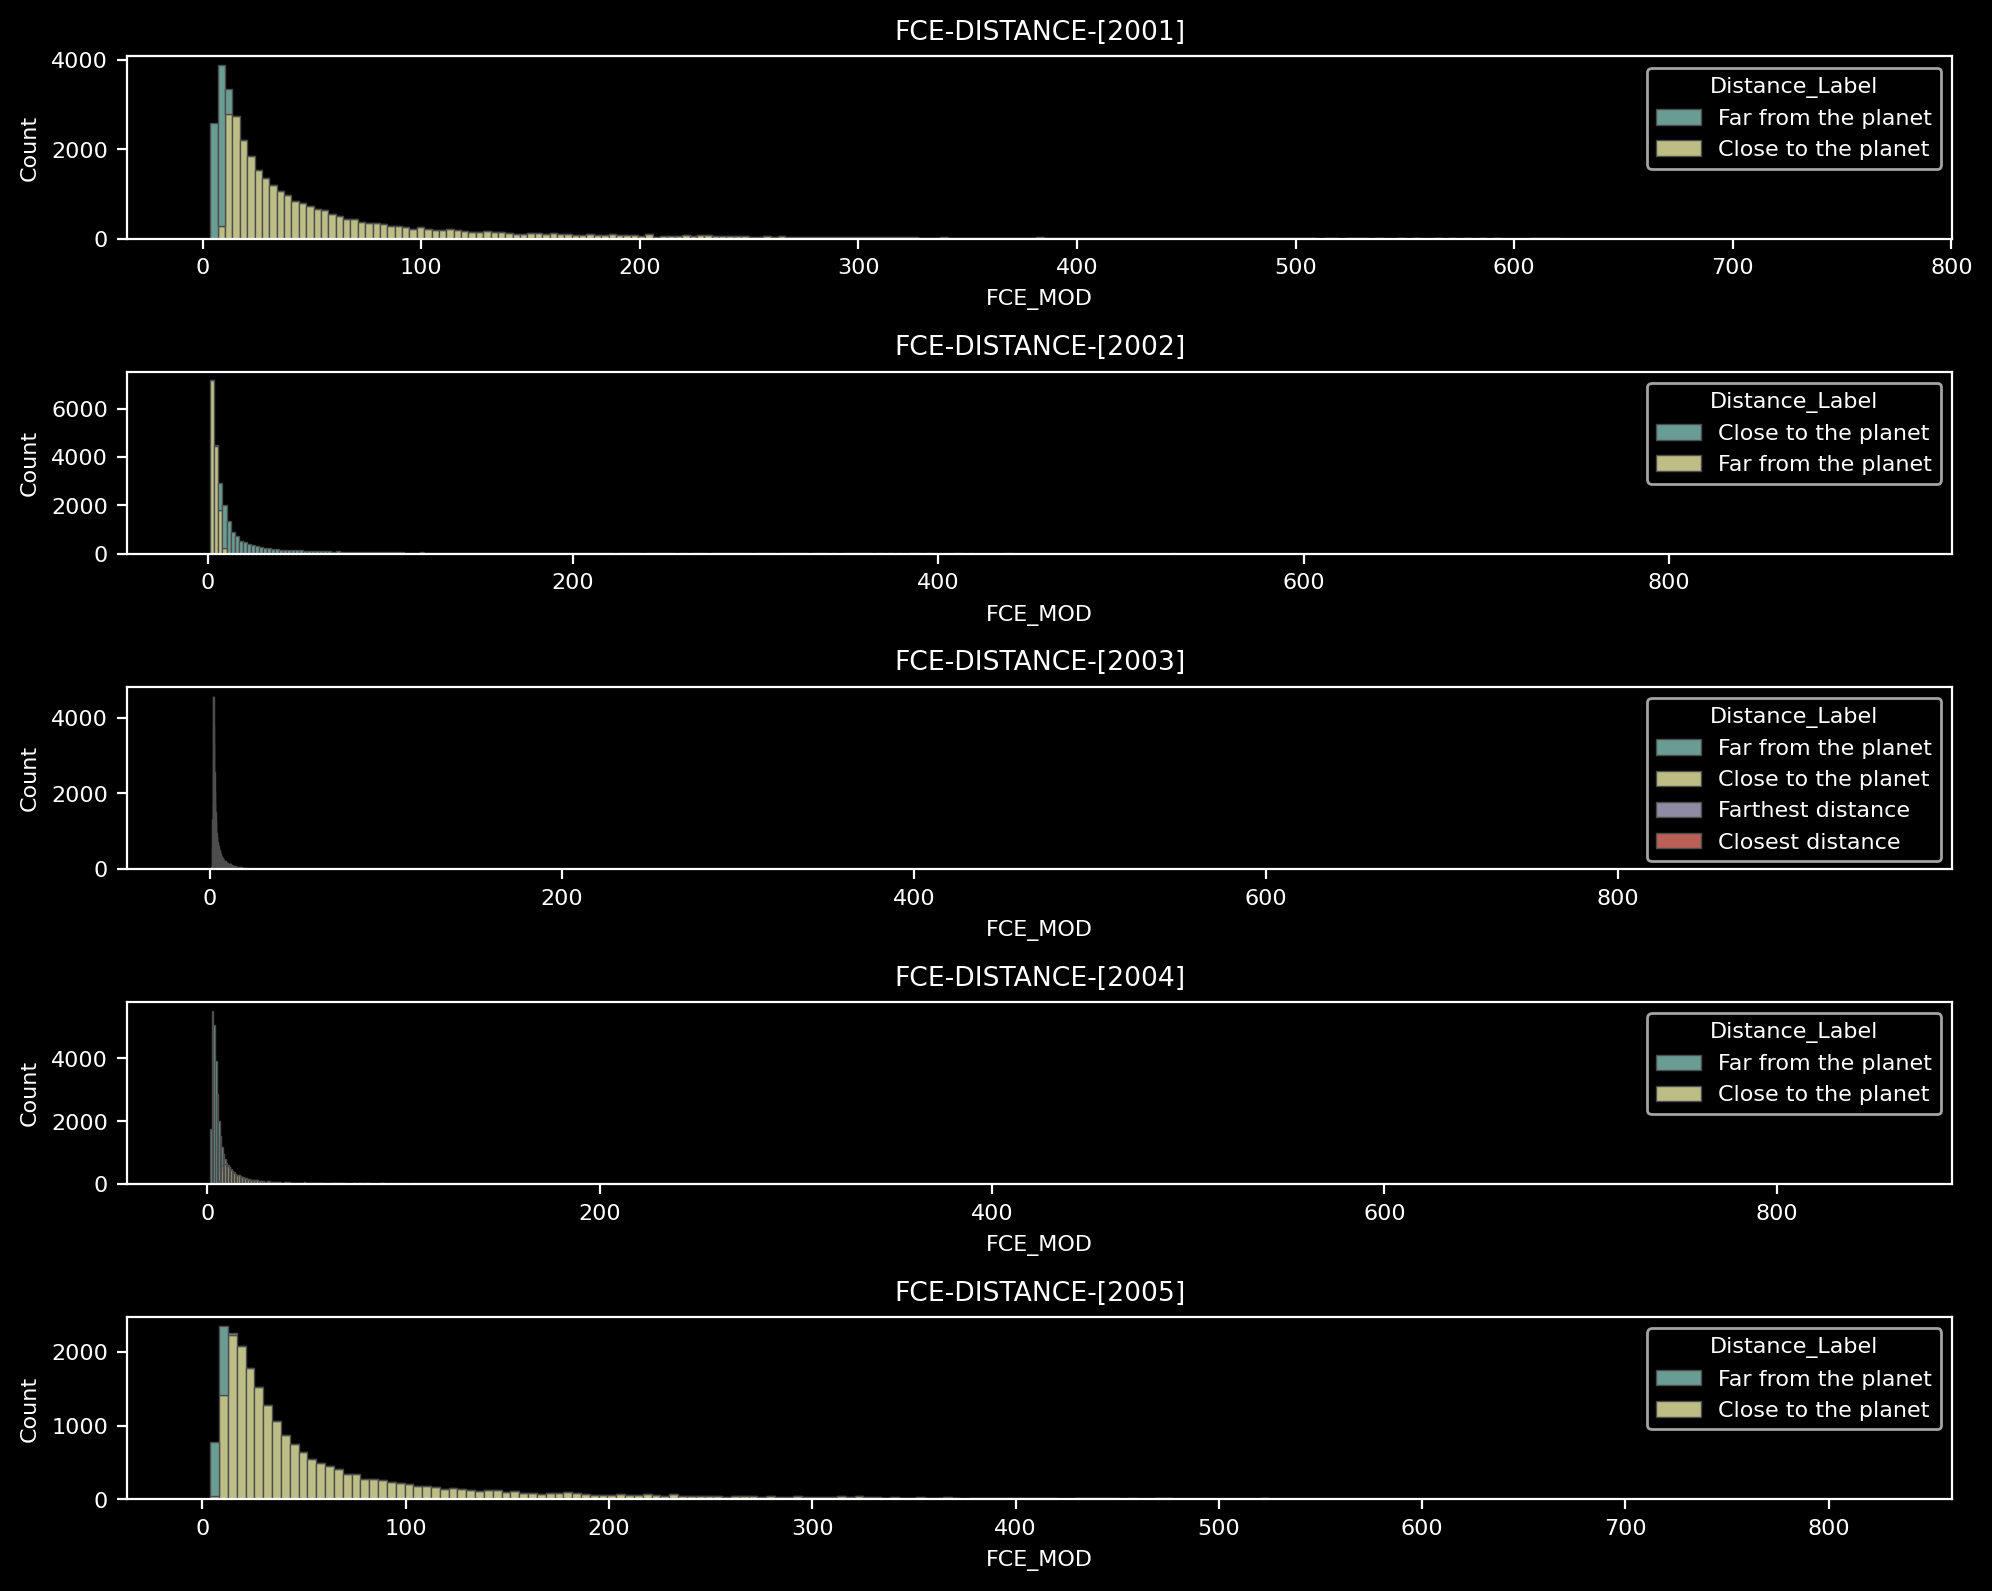

In [89]:
fig_ = plt.figure()
for a_,i_ in enumerate(date_list):
  plt.subplot(5,1,a_+1)
  plt.title(f"FCE-DISTANCE-[200{a_+1}]")
  sns.histplot(x=i_["FCE_MOD"],
               hue=i_["Distance_Label"],
               multiple="stack",
               edgecolor=".3",
               linewidth=.5)
plt.tight_layout()
plt.show()

## Density-Radial Distance

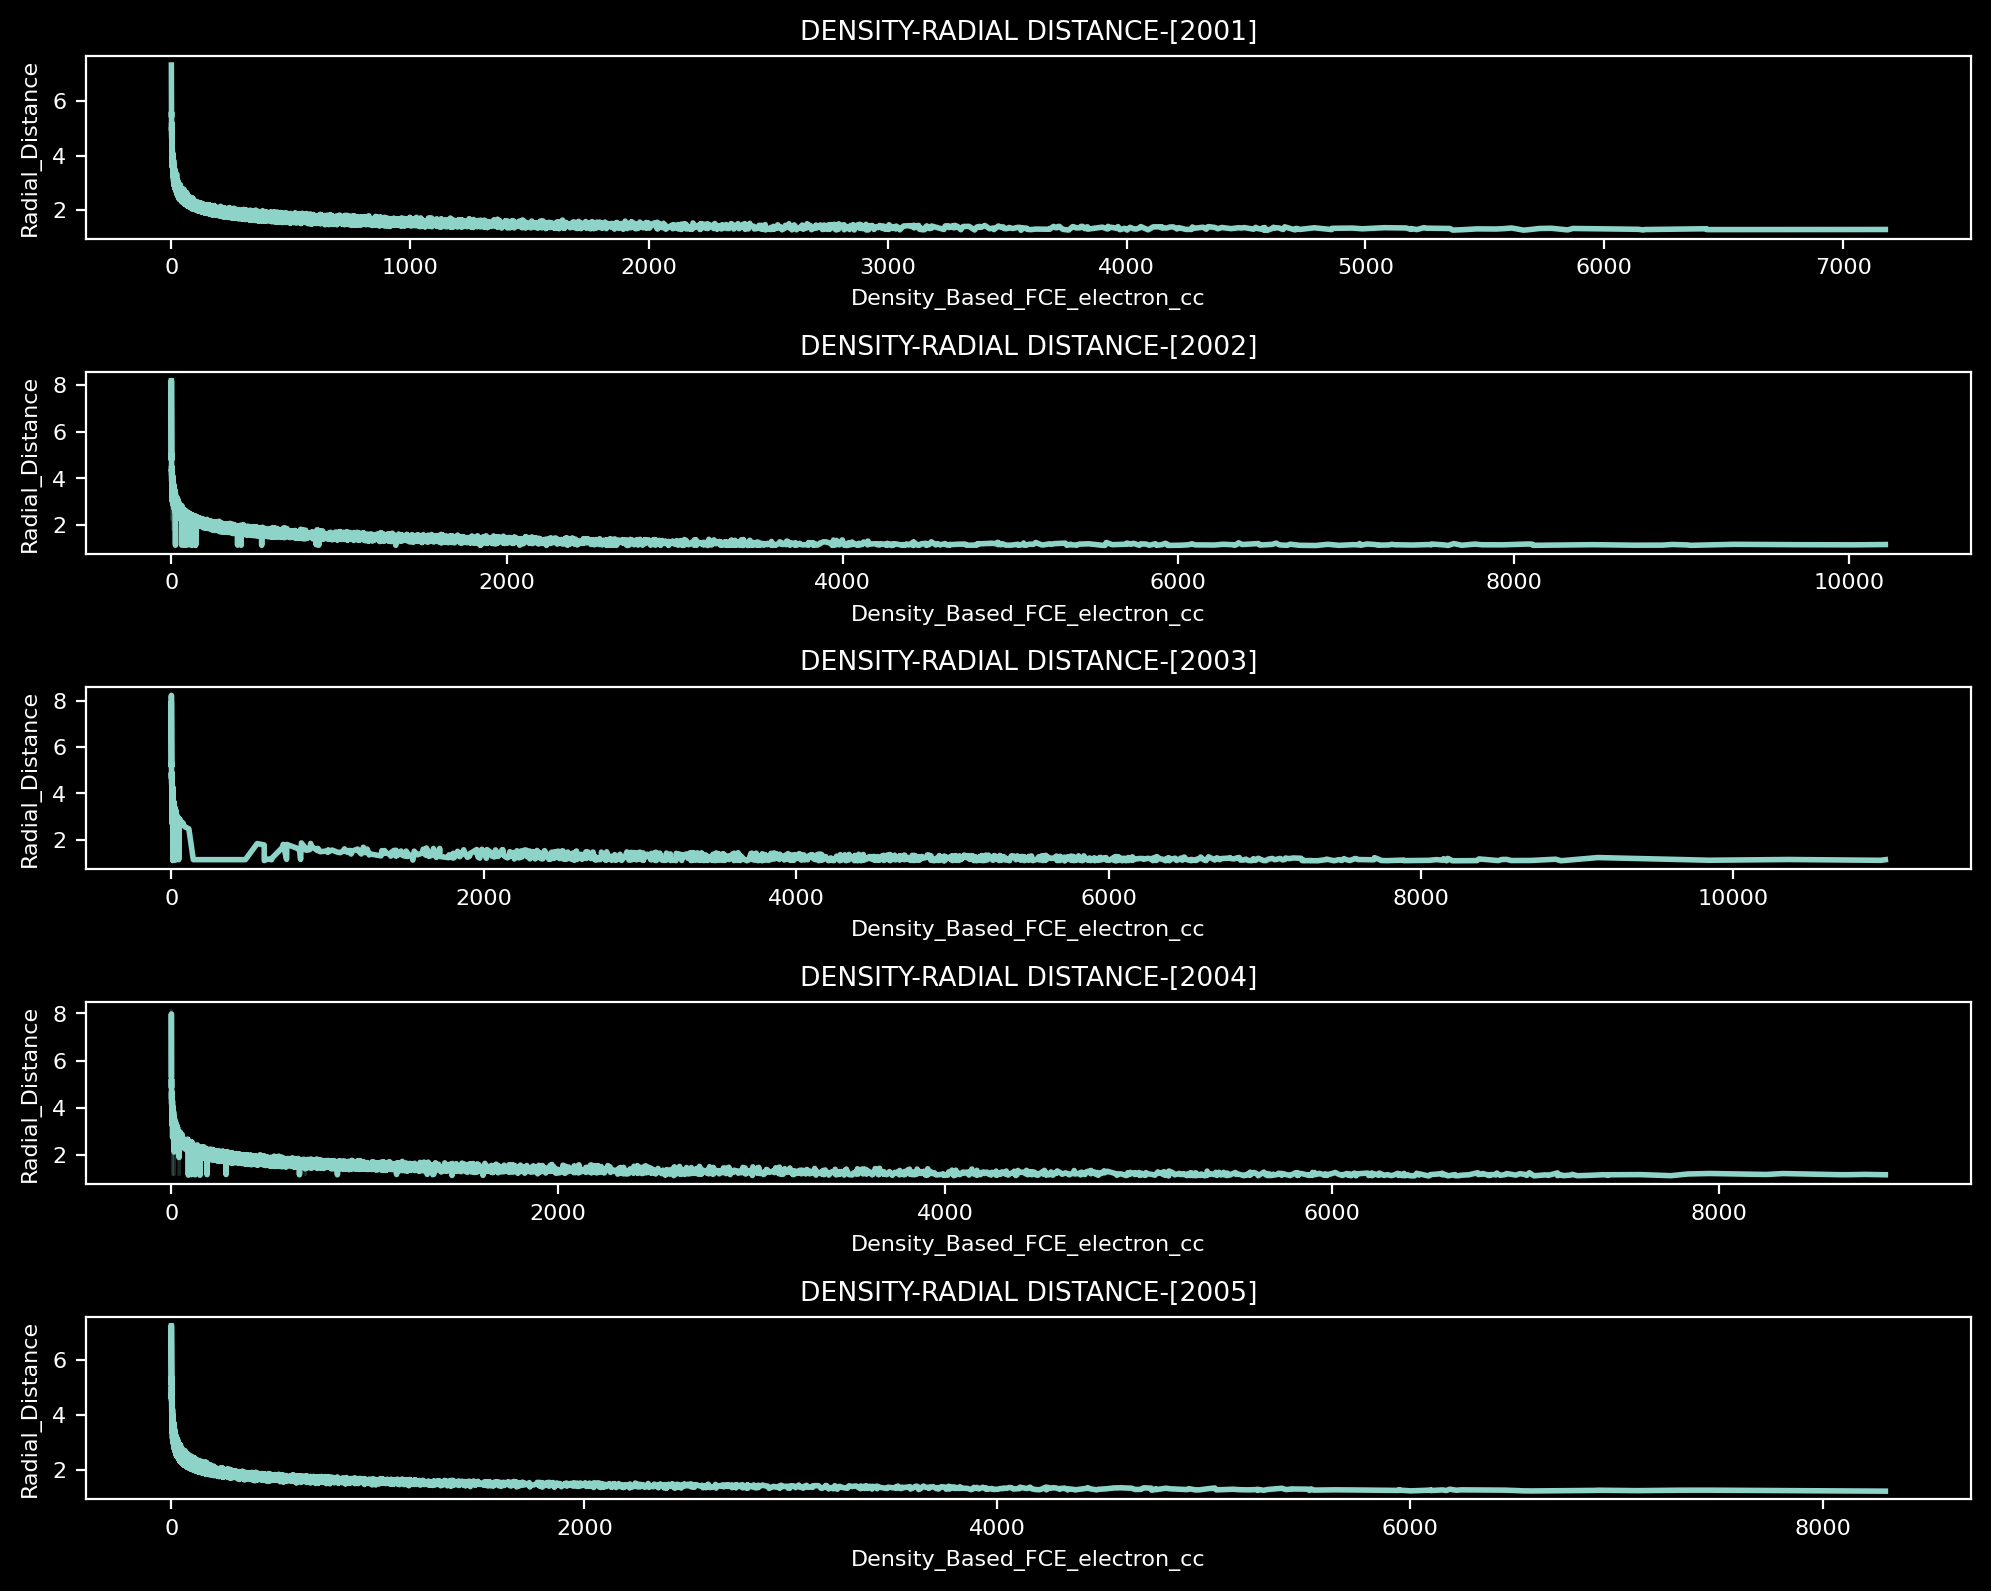

In [90]:
fig_ = plt.figure()
for a_,i_ in enumerate(date_list):
  plt.subplot(5,1,a_+1)
  plt.title(f"DENSITY-RADIAL DISTANCE-[200{a_+1}]")
  sns.lineplot(x=i_["Density_Based_FCE_electron_cc"],
               y=i_["Radial_Distance"])
plt.tight_layout()
plt.show()

# Heat Histogram - Frequency & Range

In [91]:
class HeatHistogram(object):
  def __init__(self,dataframe:DATA)->CLASSINIT:
    self.dt = dataframe
  def __str__(self)->str:
    return "Heat Histogram - Process"
  def __call__(self)->NULL:
    return None
  def __getstate__(self)->ERROR:
    ErrorModule(TypeError,typemessage).Raise()
  def __repr__(self)->DOCUMENTATION:
    return HeatHistogram.__doc__
  def TransfromArray(self,var_data:DATA or list)->RESULT:
    return np.array(var_data)
  def GetGraph(self,var_one:str,var_two:str,title:str,isSave:bool=True)->PROCESS:
    fig_ = plt.figure()
    if not isSave:
      x_ = self.TransfromArray(self.dt[str(var_one)])
      y_ = self.TransfromArray(self.dt[str(var_two)])
      heat_,xedge_,yedge_ = np.histogram2d(x_,y_,bins=170)
      #extent_ = [xedge_[0],xedge_[-1],yedge_[0],yedge_[-1]]
      plt.clf()
      plt.imshow(heat_.T,origin="lower",cmap="hot")
      plt.xlabel(str(var_one))
      plt.ylabel(str(var_two))
      plt.title(str(title))
      plt.grid(color="green",linestyle="--",linewidth=0.4)
      plt.tight_layout()
      plt.show()
    else:
      date_range = range(self.dt["Day_of_year"].min(),self.dt["Day_of_year"].max()+1)
      for date_ in date_range:
        pth_ = f"/content/heatdistancefolder/day_{str(date_)}.jpg"
        dt_ = self.dt[self.dt["Day_of_year"] == date_].reset_index(drop=True)
        x_ = self.TransfromArray(dt_[str(var_one)])
        y_ = self.TransfromArray(dt_[str(var_two)])
        heat_,xedge_,yedge_ = np.histogram2d(x_,y_,bins=100)
        plt.clf()
        plt.imshow(heat_.T,origin="lower",cmap="hot")
        plt.xlabel(str(var_one))
        plt.ylabel(str(var_two))
        plt.title(str(title)+f" Day: {str(date_)}")
        plt.grid(color="green",linestyle="--",linewidth=0.4)
        plt.tight_layout()
        plt.savefig(pth_)
        plt.close(fig_)
        print(f"[SAVED] - FILE: DAY {str(date_)}")

## Date 2001 - Example

In [92]:
try:
  import shutil
  shutil.rmtree("/content/heatdistancefolder")
except:
  pass

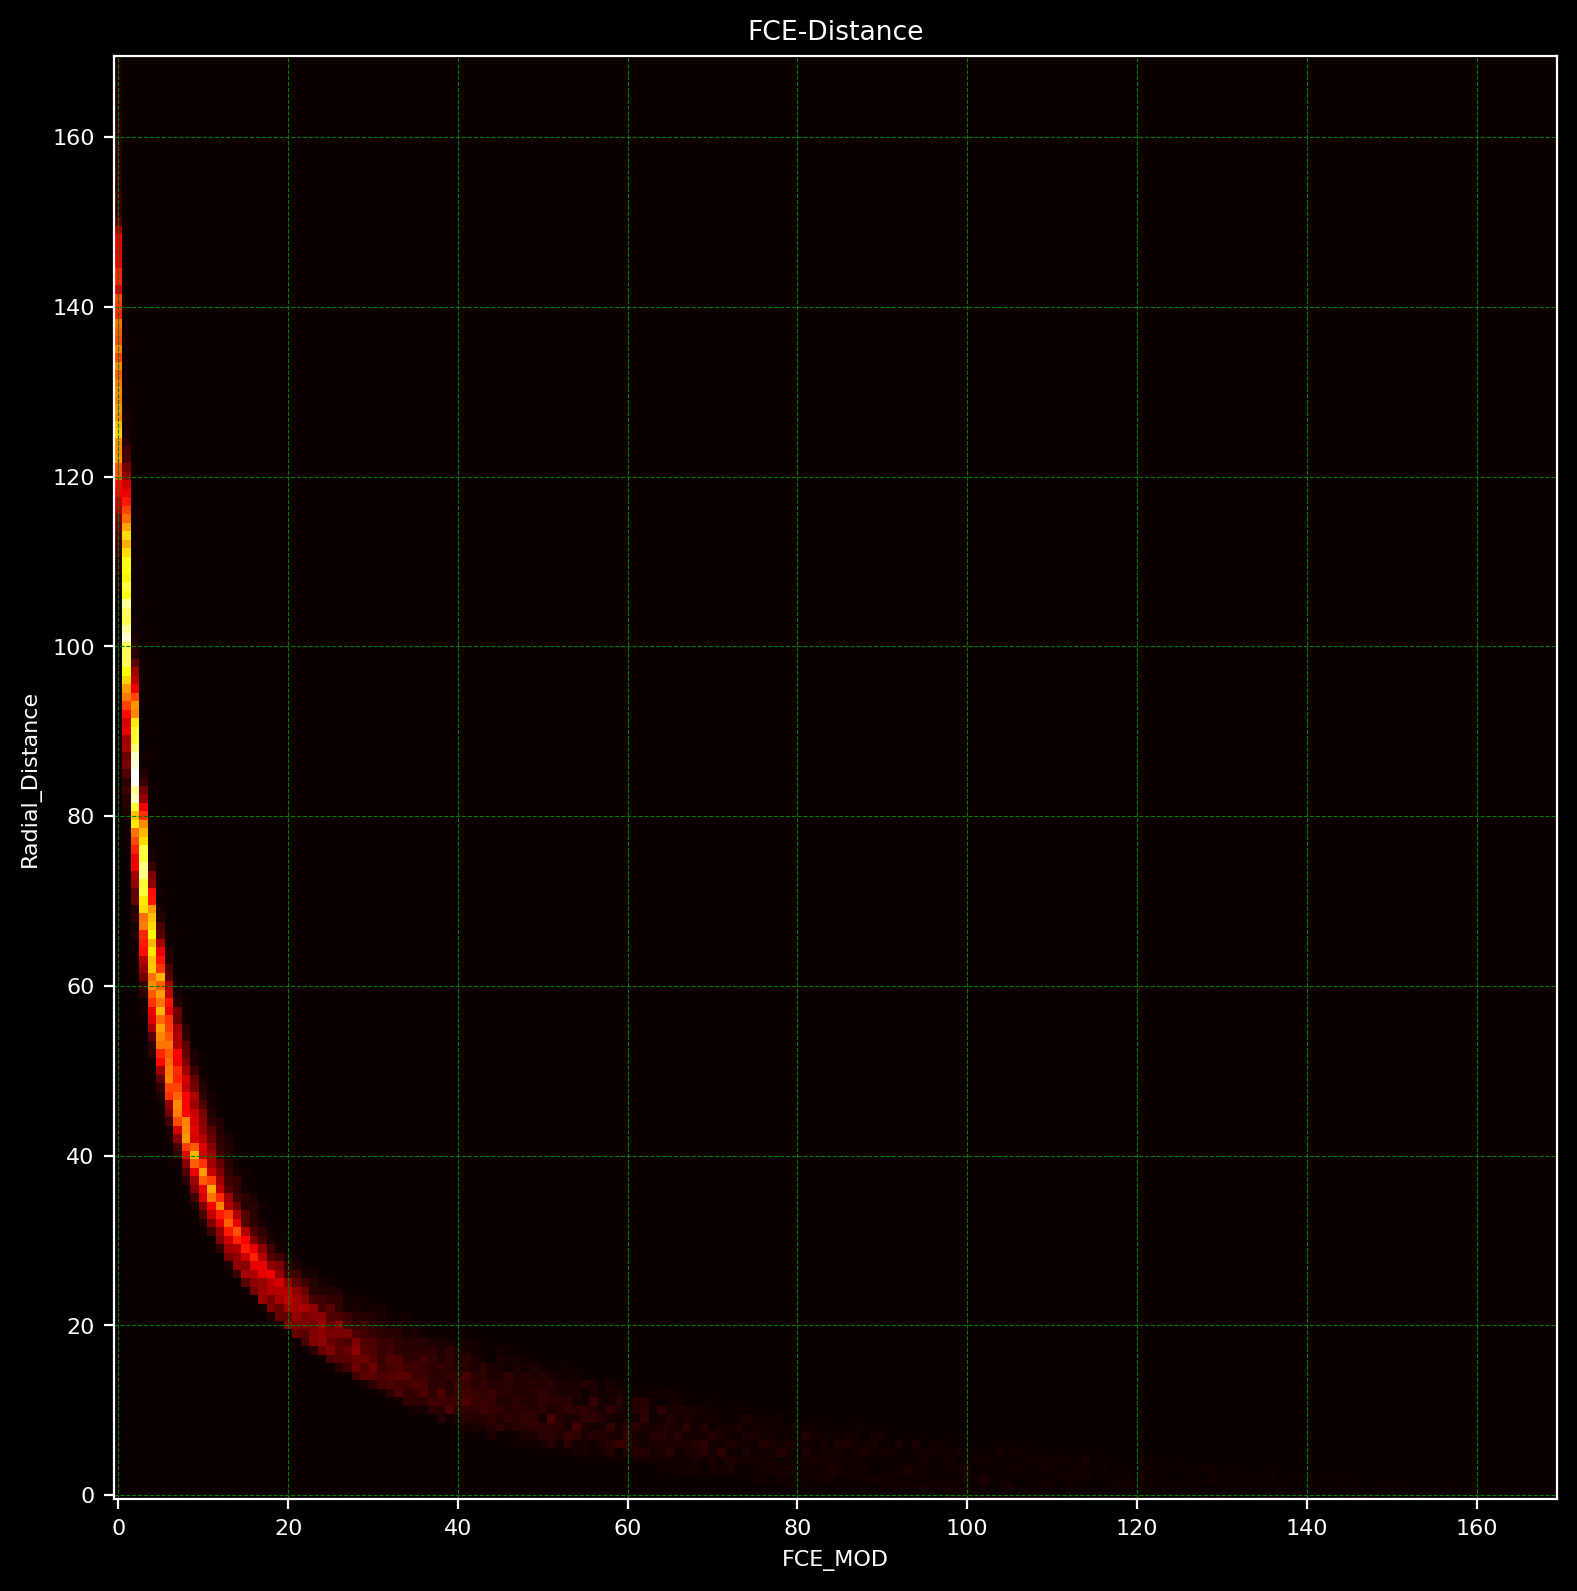

In [93]:
HeatHistogram(dt_2001).GetGraph(var_one="FCE_MOD",
                                var_two="Radial_Distance",
                                title="FCE-Distance",
                                isSave=False)

## Date 2001 - Graph-Video Example

In [94]:
createDirectory("heatdistancefolder")

In [95]:
%%capture
HeatHistogram(dt_2001).GetGraph(var_one="FCE_MOD",
                                var_two="Radial_Distance",
                                title="FCE-Distance-2001",
                                isSave=True)

> Please remove the comment token to view the sequential arrangement of the recorded observations.

In [ ]:
paths_ = os.listdir("/content/heatdistancefolder")
sources_ = [os.path.join("/content/heatdistancefolder",xpath_) for xpath_ in paths_]
sorted_list = sorted(sources_,key=sortedList)
animationres_ = ReadImageForAnimation(sorted_list)
#HTML(animationres_.to_html5_video())